# **Data Mining Project** 
# Task 2: Clustering Analysis by pyclustering techniques
Pistolesi Veronica, Poli Francesca

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Libraries

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from pyclustering.cluster import cluster_visualizer_multidim;
from pyclustering.cluster.cure import cure;

from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

from pyclustering.cluster.gmeans import gmeans
from pyclustering.cluster.encoder import type_encoding, cluster_encoder

### Loading users_profile

In [ ]:
users_profile = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile_clustering.csv', lineterminator='\n')

In [ ]:
users_profile

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
0,45825,187157.0,1201.0,868.0,793.0,2643.0,21325.0,34.0,723.522858,1.419478,79.342039,1.812974,11.120054,109.637321,3900,0.608718
1,11770,1158520.0,969.0,766.0,345.0,1357.0,296689.0,19.0,11508.209770,1.078419,573.720435,1.221178,0.000000,85.026719,3893,0.519137
2,39158,92396.0,391.0,77.0,318.0,2113.0,13121.0,8.0,546.629170,0.490437,43.277519,1.169776,6.843951,80.780317,3885,0.551866
3,18035,317861.0,209.0,488.0,848.0,1475.0,105138.0,7.0,3359.356296,0.392886,157.694596,1.393654,0.000000,84.281111,3884,0.519310
4,22496,138486.0,1714.0,185.0,234.0,2662.0,16181.0,32.0,462.741573,1.166943,40.803260,0.896682,10.333883,95.166473,3870,0.887855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,19061,7.0,85.0,372.0,1006.0,821.0,1.0,3.0,0.043355,0.154787,0.024751,0.591606,11.548946,46.490945,896,4.148438
11504,96,8860.0,161.0,21.0,1.0,77.0,6181.0,18.0,611.718156,2.666807,82.761468,0.908257,0.000000,84.586538,894,0.121924
11505,107,2458.0,9.0,22.0,47.0,34.0,976.0,1.0,103.166369,0.256601,19.425197,0.811024,3.958058,82.080645,894,0.142058
11506,6,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.000000,0.372678,0.166667,0.500000,0.000000,26.666667,893,0.006719


In [ ]:
users_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   statuses_count      11508 non-null  int64  
 1   retweet_count       11508 non-null  float64
 2   favorite_count      11508 non-null  float64
 3   num_hashtags        11508 non-null  float64
 4   num_urls            11508 non-null  float64
 5   num_mentions        11508 non-null  float64
 6   max_retweet_count   11508 non-null  float64
 7   max_favorite_count  11508 non-null  float64
 8   std_retweet_count   11508 non-null  float64
 9   std_favorite_count  11508 non-null  float64
 10  popularity          11508 non-null  float64
 11  tweet_richness      11508 non-null  float64
 12  text_entropy        11508 non-null  float64
 13  avg_textlen         11508 non-null  float64
 14  days_on_tw          11508 non-null  int64  
 15  activity_richness   11508 non-null  float64
dtypes: f

### Check for correlations

In [ ]:
users_profile.corr()

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
statuses_count,1.000000,0.165005,0.012030,0.307346,0.324522,0.562791,0.260234,0.058355,0.157174,-0.019404,0.046735,0.130808,0.390239,0.008527,0.306761,0.441564
retweet_count,0.165005,1.000000,0.067799,0.153684,0.043044,0.316225,0.524070,0.048682,0.667045,0.028207,0.448862,0.071211,0.194193,-0.019312,0.019498,0.287950
favorite_count,0.012030,0.067799,1.000000,0.055285,0.038395,0.049466,0.019821,0.288178,0.049974,0.466686,0.123324,0.059043,0.015674,0.088749,0.055650,0.030397
num_hashtags,0.307346,0.153684,0.055285,1.000000,0.330799,0.495764,0.258190,0.067219,0.161224,0.001766,0.051397,0.306916,0.335132,0.255868,0.268445,0.382203
num_urls,0.324522,0.043044,0.038395,0.330799,1.000000,0.281933,0.118013,0.095041,0.038344,-0.004031,-0.004221,0.185009,0.289516,0.263621,0.314916,0.521873
num_mentions,0.562791,0.316225,0.049466,0.495764,0.281933,1.000000,0.466660,0.073451,0.304692,-0.016033,0.112579,0.284764,0.525943,0.065373,0.283215,0.663045
max_retweet_count,0.260234,0.524070,0.019821,0.258190,0.118013,0.466660,1.000000,0.079551,0.768317,0.047868,0.323226,0.143023,0.297703,-0.016815,0.175121,0.413420
max_favorite_count,0.058355,0.048682,0.288178,0.067219,0.095041,0.073451,0.079551,1.000000,0.229281,0.646514,0.309205,0.049502,0.063574,0.168527,0.099156,0.112104
std_retweet_count,0.157174,0.667045,0.049974,0.161224,0.038344,0.304692,0.768317,0.229281,1.000000,0.375111,0.761421,0.119150,0.184251,0.091734,0.108707,0.261621
std_favorite_count,-0.019404,0.028207,0.466686,0.001766,-0.004031,-0.016033,0.047868,0.646514,0.375111,1.000000,0.667487,0.052472,-0.032822,0.230110,0.076952,-0.037039


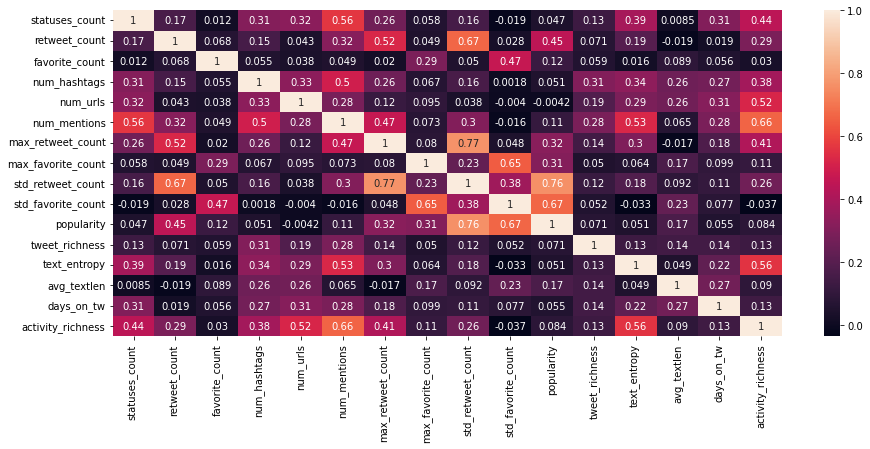

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))         
sns.heatmap(users_profile.corr(), annot=True)
plt.show()

These indicators’ correlations are below the set threshold value (0.8), indicating a weak association.

## Clustering Preprocessing - Normalization  
A good practice in clustering to avoid the bias given by the range of the different attribute is normalization.  
The most common adopted normalizations are: Z-Score and Min-Max.
In our project, we performed z-score normalization of the dataset, which standardizes features such that the mean of all of the values is 0 and the standard deviation is 1.

In [ ]:
scaler = StandardScaler()
scaler.fit(users_profile.values)

StandardScaler()

In [ ]:
users_profile.head().values

array([[4.58250000e+04, 1.87157000e+05, 1.20100000e+03, 8.68000000e+02,
        7.93000000e+02, 2.64300000e+03, 2.13250000e+04, 3.40000000e+01,
        7.23522858e+02, 1.41947839e+00, 7.93420388e+01, 1.81297388e+00,
        1.11200542e+01, 1.09637321e+02, 3.90000000e+03, 6.08717949e-01],
       [1.17700000e+04, 1.15852000e+06, 9.69000000e+02, 7.66000000e+02,
        3.45000000e+02, 1.35700000e+03, 2.96689000e+05, 1.90000000e+01,
        1.15082098e+04, 1.07841900e+00, 5.73720435e+02, 1.22117763e+00,
        0.00000000e+00, 8.50267194e+01, 3.89300000e+03, 5.19136912e-01],
       [3.91580000e+04, 9.23960000e+04, 3.91000000e+02, 7.70000000e+01,
        3.18000000e+02, 2.11300000e+03, 1.31210000e+04, 8.00000000e+00,
        5.46629170e+02, 4.90437268e-01, 4.32775187e+01, 1.16977612e+00,
        6.84395059e+00, 8.07803172e+01, 3.88500000e+03, 5.51866152e-01],
       [1.80350000e+04, 3.17861000e+05, 2.09000000e+02, 4.88000000e+02,
        8.48000000e+02, 1.47500000e+03, 1.05138000e+05, 7.000

In [ ]:
X = scaler.transform(users_profile.values)

In [ ]:
X[:5]

array([[ 2.35154422, -0.10599965, -0.0037701 ,  1.38849296,  1.34145739,
         2.11021572, -0.15883668, -0.14889354, -0.18145245, -0.11860932,
        -0.12099222,  1.00483459,  2.12158848,  2.37021204,  3.76411345,
         0.14152155],
       [ 0.36234992,  0.22016231, -0.01532425,  1.18303827,  0.35681892,
         0.8403493 ,  2.65084441, -0.1610402 ,  1.80143057, -0.12135574,
         0.11473806,  0.48922026, -0.72093363,  0.8873474 ,  3.75144203,
         0.01345811],
       [ 1.96211658, -0.13781828, -0.04411004, -0.20478799,  0.29747687,
         1.58686486, -0.24254633, -0.16994775, -0.2139763 , -0.12609052,
        -0.13818856,  0.44443566,  1.02852554,  0.63148856,  3.7369604 ,
         0.06024724],
       [ 0.72829625, -0.06211217, -0.05317408,  0.62307354,  1.46233934,
         0.95686893,  0.69635064, -0.17075753,  0.30317444, -0.12687606,
        -0.08363203,  0.6394937 , -0.72093363,  0.84242216,  3.73515019,
         0.01370554],
       [ 0.98886873, -0.12234228,  0

# CURE

In [ ]:
input_data = list(X)

# Allocate clusters.
cure_instance2 = cure(input_data, 2);
cure_instance2.process();
clusters2 = cure_instance2.get_clusters();

cure_instance3 = cure(input_data, 3);
cure_instance3.process();
clusters3 = cure_instance3.get_clusters();

cure_instance4 = cure(input_data, 4);
cure_instance4.process();
clusters4 = cure_instance4.get_clusters();

cure_instance5 = cure(input_data, 5);
cure_instance5.process();
clusters5 = cure_instance5.get_clusters();

cure_instance6 = cure(input_data, 6);
cure_instance6.process();
clusters6 = cure_instance6.get_clusters();

In [ ]:
#len(clusters3)

In [ ]:
# Prepare cluster labels
cluster_labels = []

cluster_labels2 = np.zeros([11508], dtype=int)    # 0,1
for x in np.nditer(np.asarray(clusters2[1])):
   cluster_labels2[x] = 1
cluster_labels.append(cluster_labels2)

cluster_labels3 = np.zeros([11508], dtype=int)    # 0,1,2
for x in np.nditer(np.asarray(clusters3[1])):
   cluster_labels3[x] = 1
for x in np.nditer(np.asarray(clusters3[2])):
   cluster_labels3[x] = 2
cluster_labels.append(cluster_labels3)

cluster_labels4 = np.zeros([11508], dtype=int)    # 0,1,2,3
for x in np.nditer(np.asarray(clusters4[1])):
   cluster_labels4[x] = 1
for x in np.nditer(np.asarray(clusters4[2])):
   cluster_labels4[x] = 2
for x in np.nditer(np.asarray(clusters4[3])):
   cluster_labels4[x] = 3
cluster_labels.append(cluster_labels4)

cluster_labels5 = np.zeros([11508], dtype=int)    # 0,1,2,3,4
for x in np.nditer(np.asarray(clusters5[1])):
   cluster_labels5[x] = 1
for x in np.nditer(np.asarray(clusters5[2])):
   cluster_labels5[x] = 2
for x in np.nditer(np.asarray(clusters5[3])):
   cluster_labels5[x] = 3
for x in np.nditer(np.asarray(clusters5[4])):
   cluster_labels5[x] = 4
cluster_labels.append(cluster_labels5)

cluster_labels6 = np.zeros([11508], dtype=int)    # 0,1,2,3,4,5
for x in np.nditer(np.asarray(clusters6[1])):
   cluster_labels6[x] = 1
for x in np.nditer(np.asarray(clusters6[2])):
   cluster_labels6[x] = 2
for x in np.nditer(np.asarray(clusters6[3])):
   cluster_labels6[x] = 3
for x in np.nditer(np.asarray(clusters6[4])):
   cluster_labels6[x] = 4
for x in np.nditer(np.asarray(clusters6[5])):
   cluster_labels6[x] = 5
cluster_labels.append(cluster_labels6)



In [ ]:
# Visualize allocated clusters.                     # bad visualization due to the number of features 
#visualizer = cluster_visualizer_multidim();
#visualizer.append_clusters(clusters, input_data);
#visualizer.show();

## Clusters characterization with respect to categorical features

In [ ]:
users_profile_all = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile.csv', lineterminator='\n')

In [ ]:
users_profile_all.head()

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,hour_entropy,favcount_entropy,retcount_entropy,repcount_entropy,has_entropy,url_entropy,men_entropy,avg_textlen,days_on_tw,activity_richness
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.0,0.0,1201.0,868.0,...,0.0,8.831943,6.080426,0.0,9.183814,9.578214,10.607494,109.637321,3900,0.608718
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.0,0.0,969.0,766.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,85.026719,3893,0.519137
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.0,0.0,391.0,77.0,...,0.0,3.921117,2.375534,0.0,4.836434,5.114369,6.387527,80.780317,3885,0.551866
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.0,0.0,209.0,488.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,84.281111,3884,0.519310
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.0,0.0,1714.0,185.0,...,0.0,8.277790,2.354578,0.0,8.421512,8.222893,9.556485,95.166473,3870,0.887855


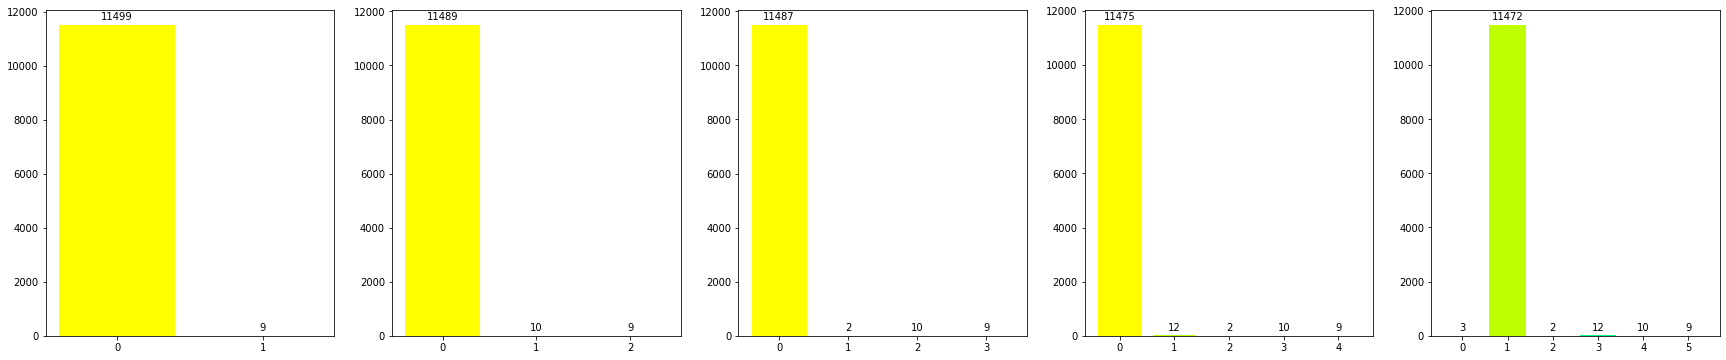

In [ ]:
fig, ax = plt.subplots(ncols=len(cluster_labels), figsize=(30,6))
for i in range(len(cluster_labels)):
  hist, bins = np.histogram(cluster_labels[i], bins=range(0, len(set(cluster_labels[i])) + 1))
  #plt.stairs(hist, bins)
  clusters = ax[i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[i].bar_label(clusters, padding=3)
plt.show()

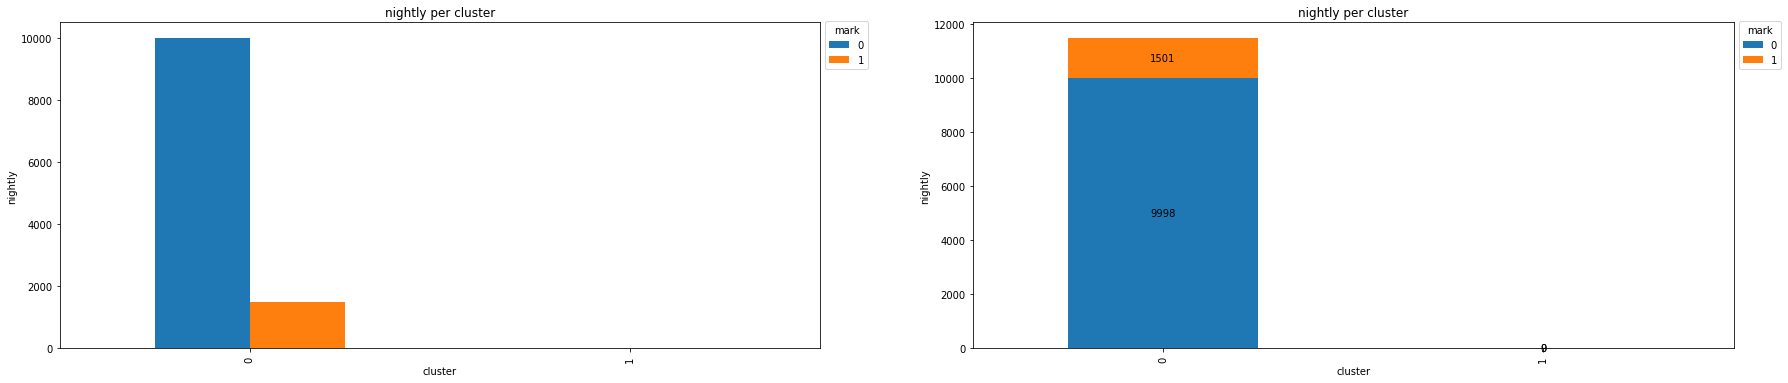

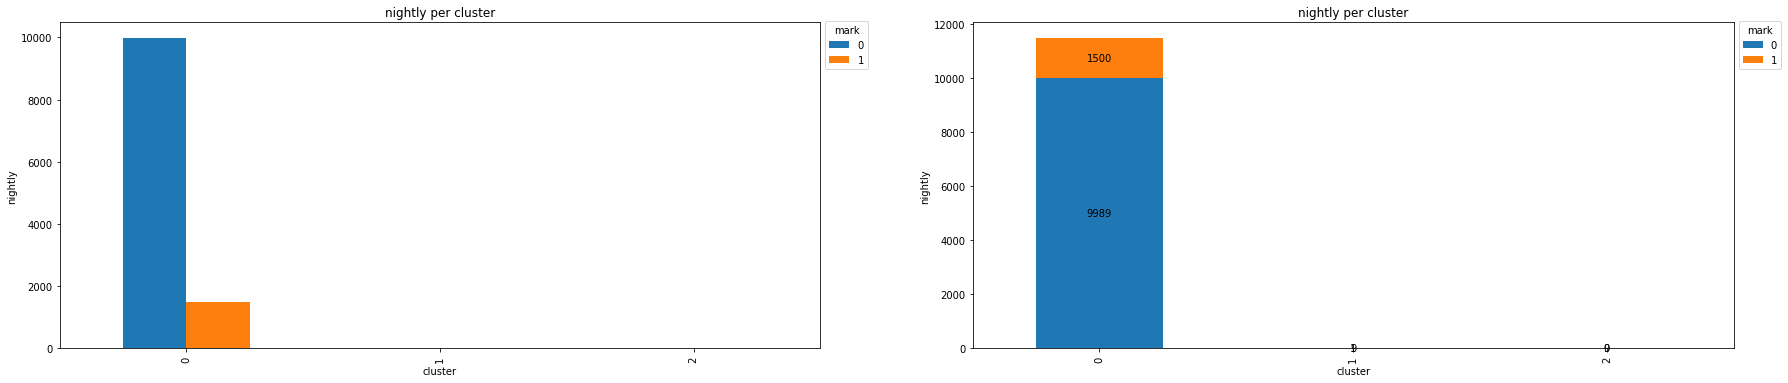

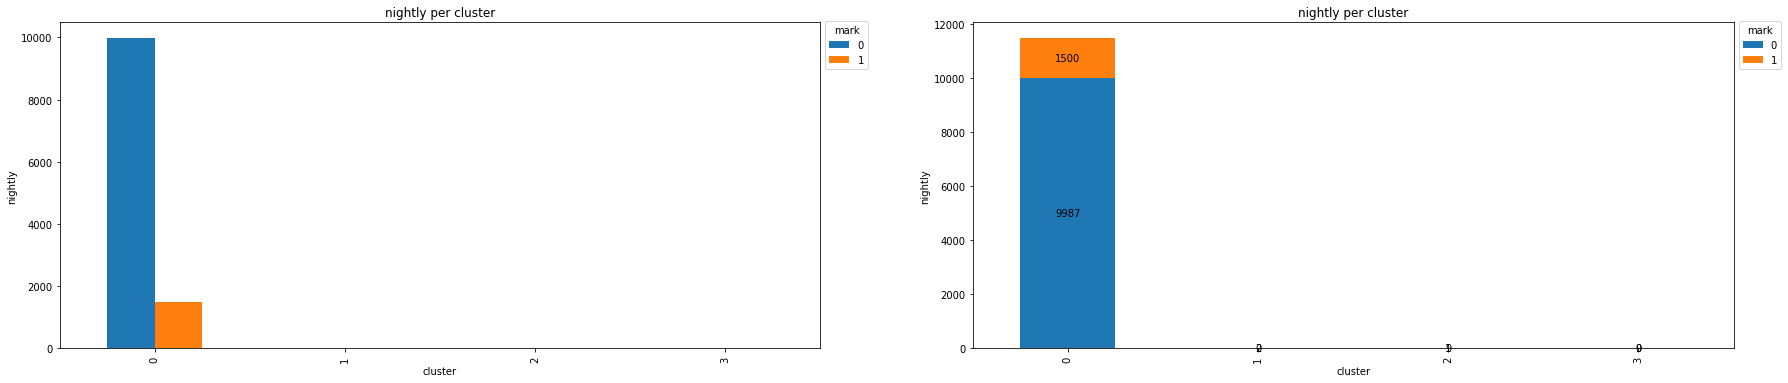

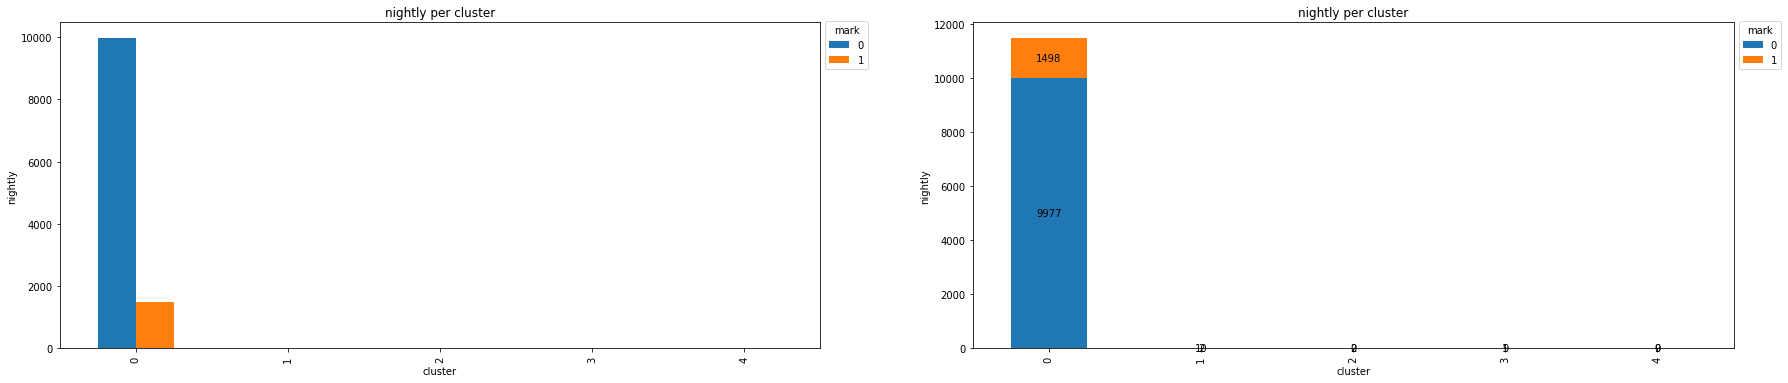

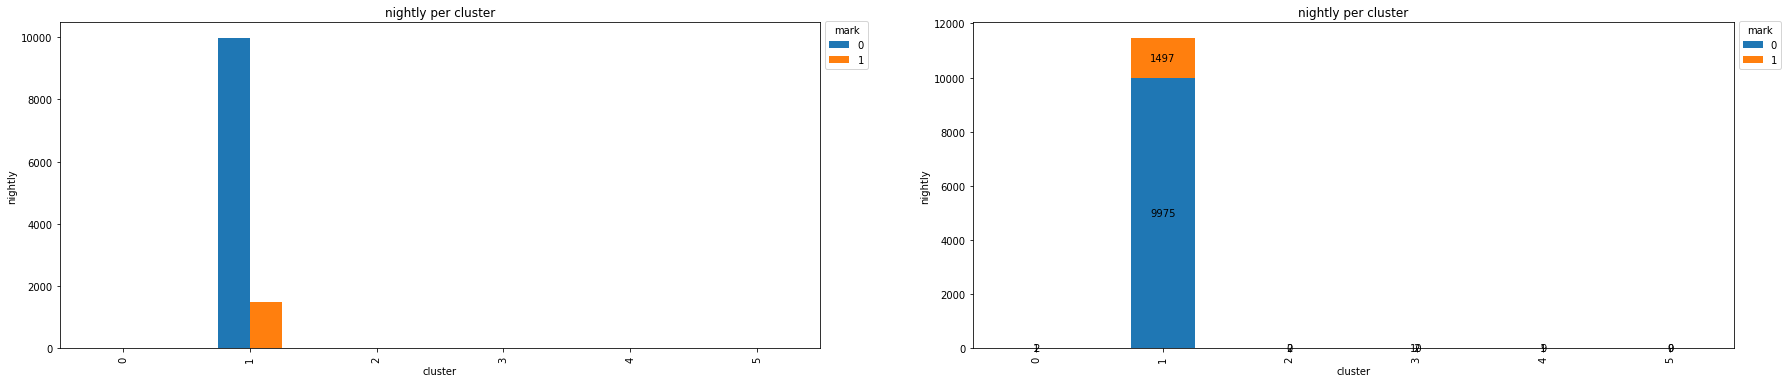

In [ ]:
for i in range(len(cluster_labels)):
  nightly_ct = pd.crosstab(cluster_labels[i],users_profile_all['nightly'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = nightly_ct.plot(kind='bar', stacked=False, title='nightly per cluster', ax=axs[0])
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('nightly')

  ax2 = nightly_ct.plot(kind='bar', stacked=True, title='nightly per cluster', ax=axs[1])
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  # add counts
  for c in ax2.containers:
      # set the bar label
      ax2.bar_label(c, label_type='center')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('nightly')

  plt.show()

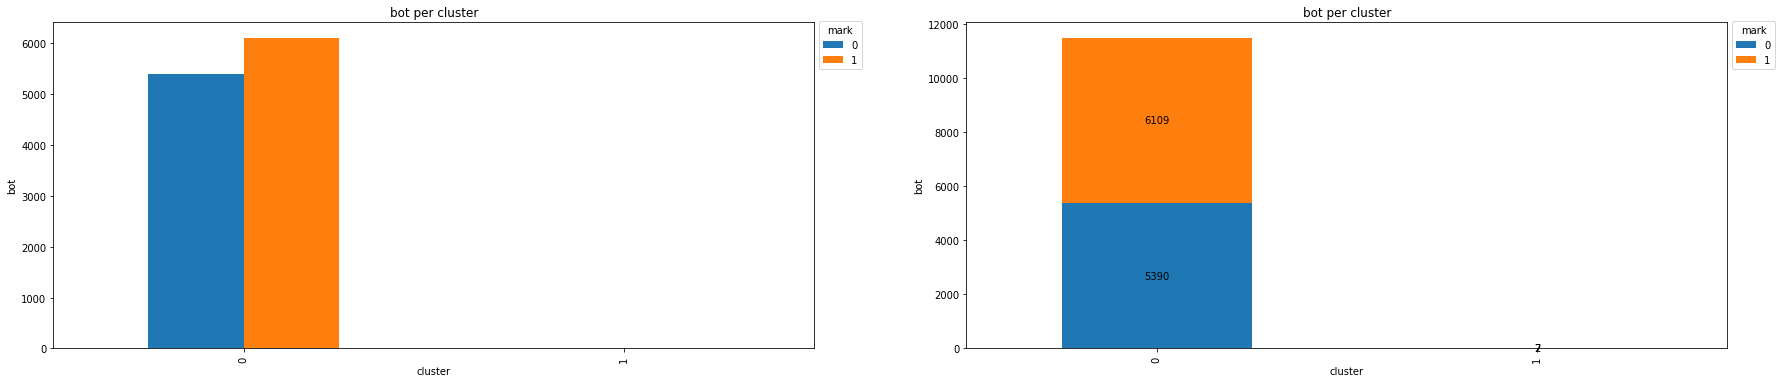

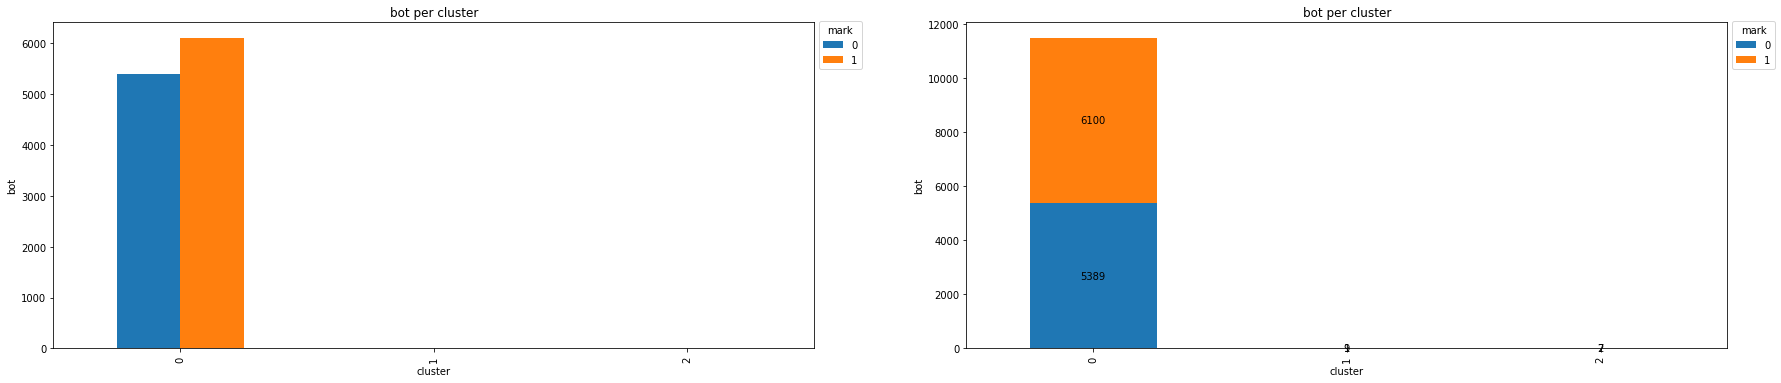

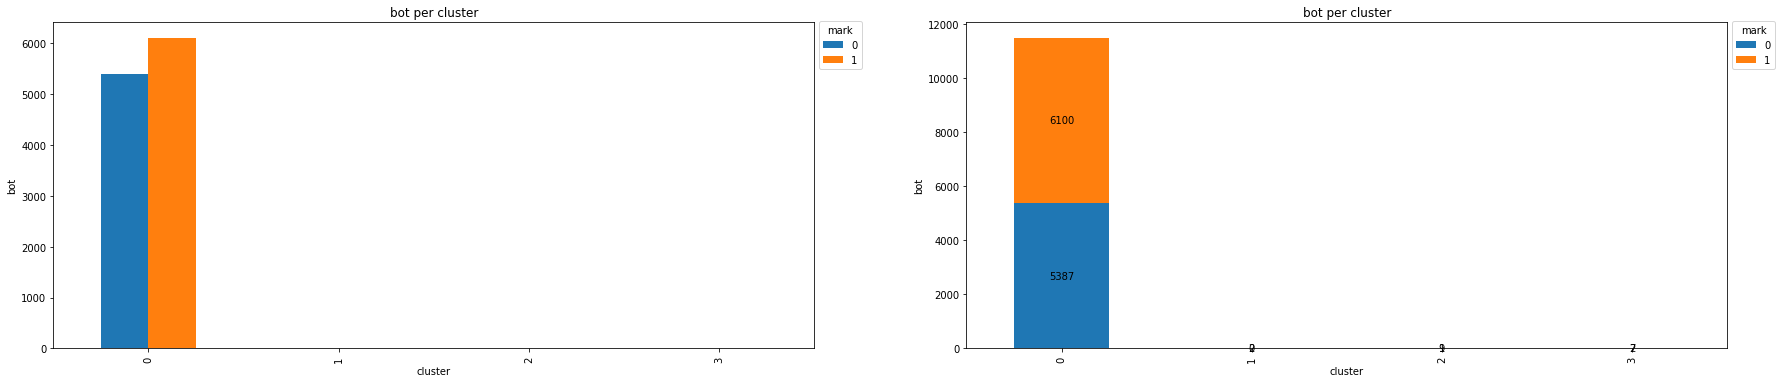

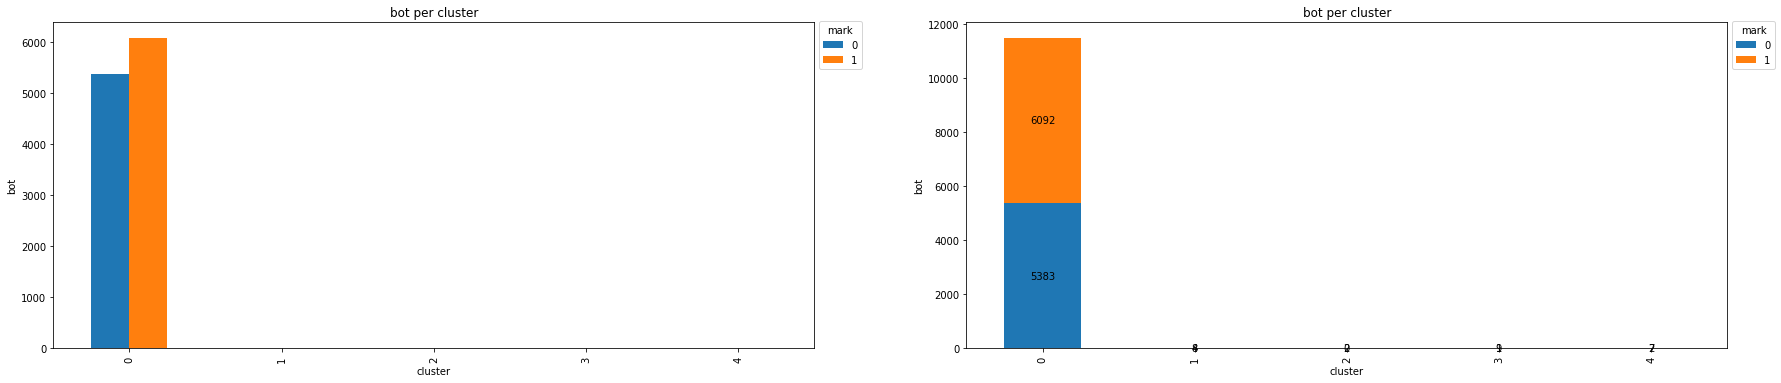

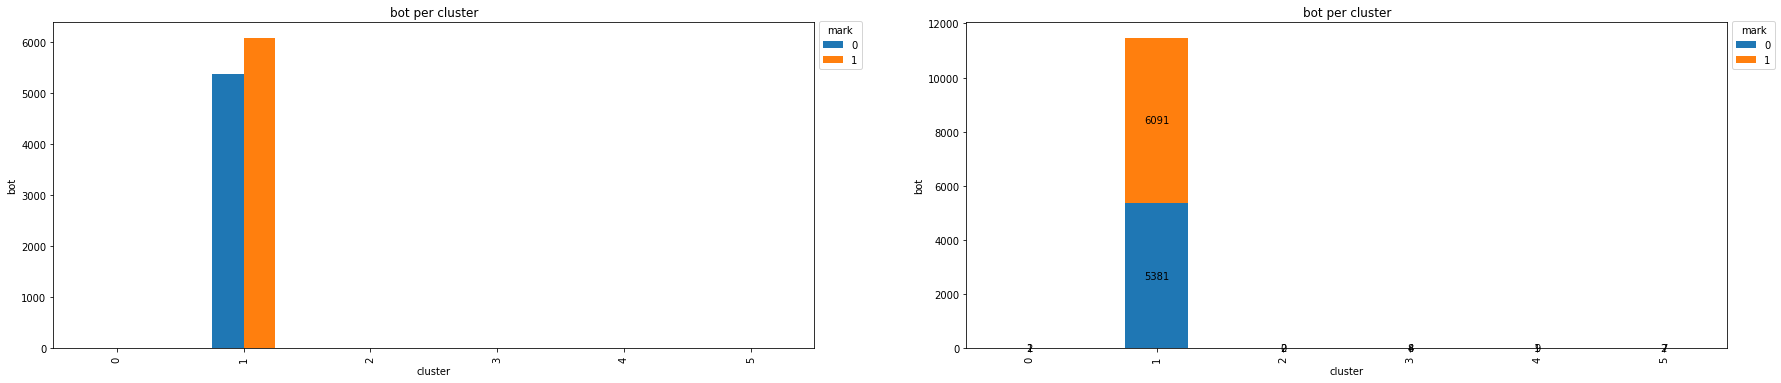

In [ ]:
for i in range(len(cluster_labels)):
  bot_ct = pd.crosstab(cluster_labels[i],users_profile_all['bot'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = bot_ct.plot(kind='bar', stacked=False, title='bot per cluster', ax=axs[0])
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('bot')

  ax2 = bot_ct.plot(kind='bar', stacked=True, title='bot per cluster', ax=axs[1])
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  # add counts
  for c in ax2.containers:
      # set the bar label
      ax2.bar_label(c, label_type='center')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('bot')

  plt.show()

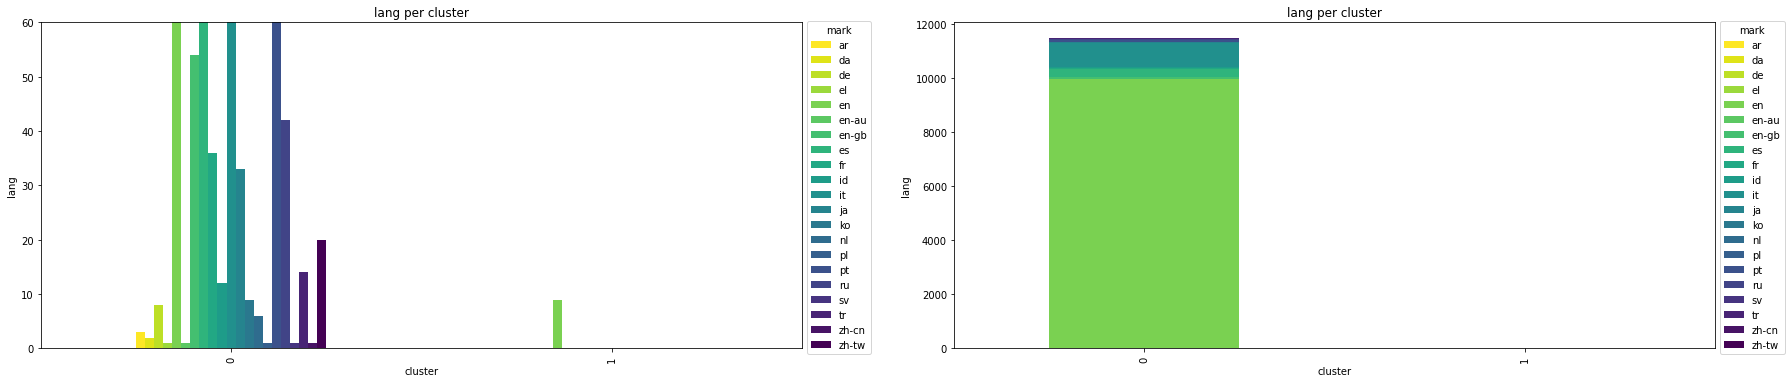

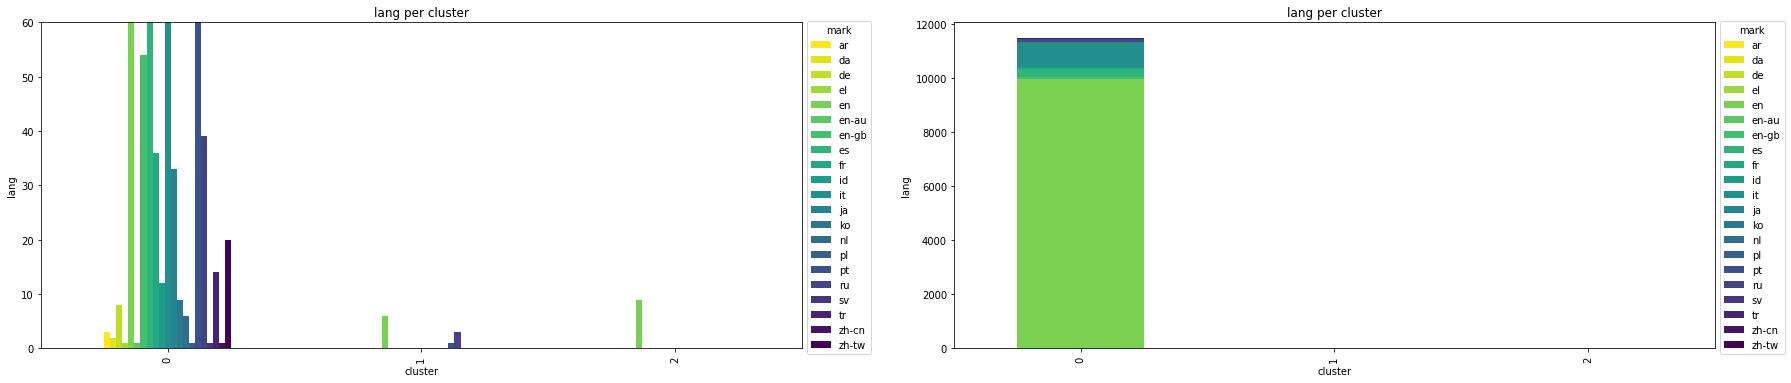

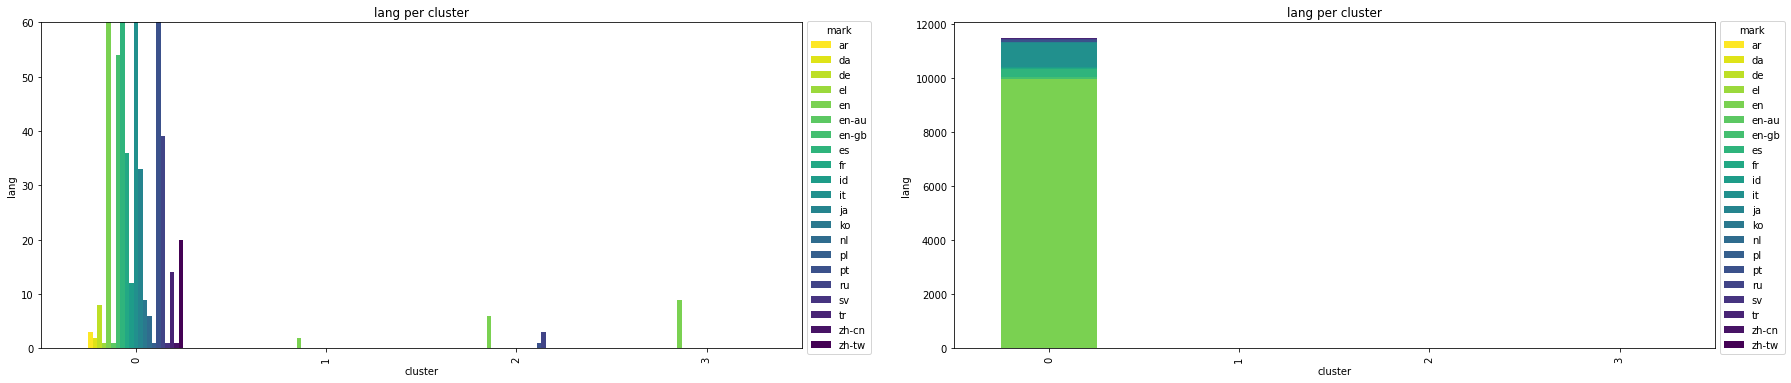

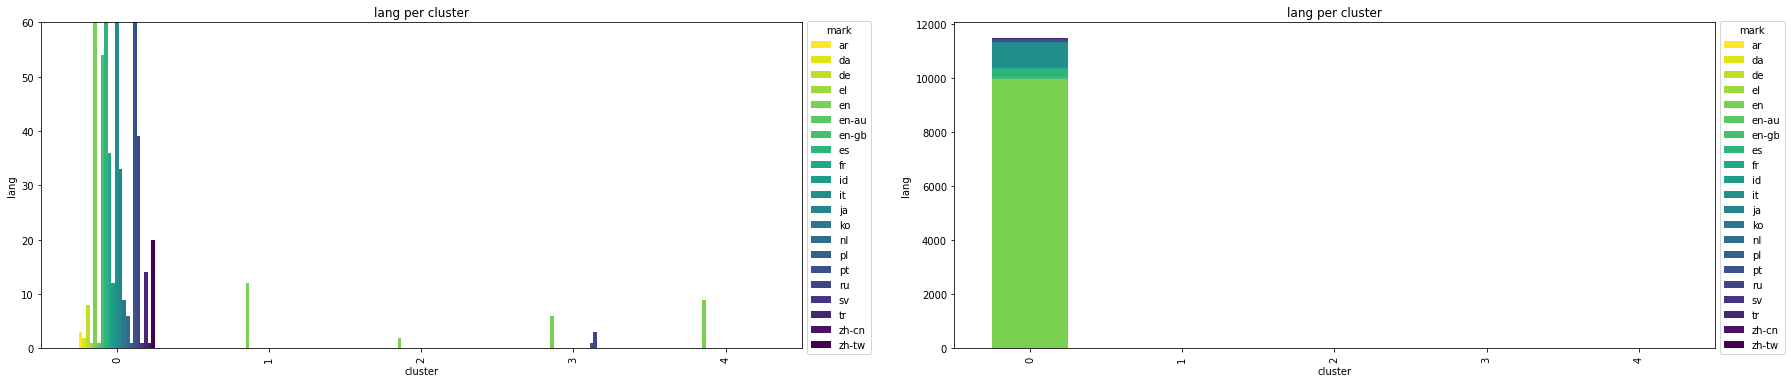

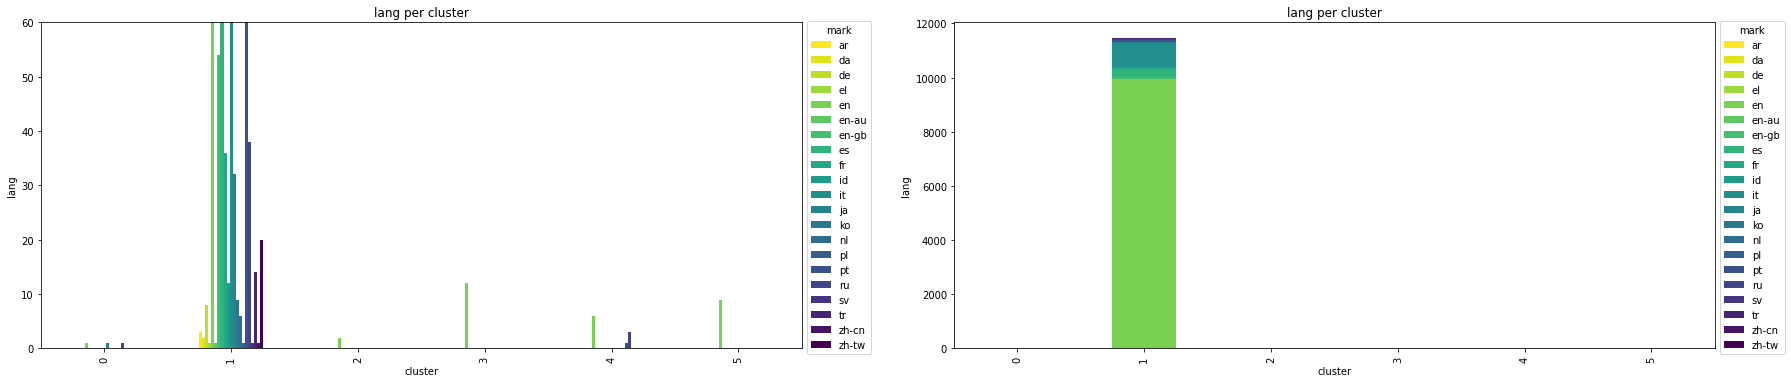

In [ ]:
for i in range(len(cluster_labels)):
  lang_ct = pd.crosstab(cluster_labels[i],users_profile_all['lang'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = lang_ct.plot(kind='bar', stacked=False, title='lang per cluster', ax=axs[0], colormap="viridis_r")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('lang')
  axs[0].set_ylim(0, 60) 

  ax2 = lang_ct.plot(kind='bar', stacked=True, title='lang per cluster', ax=axs[1], colormap="viridis_r")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('lang')

  plt.show()

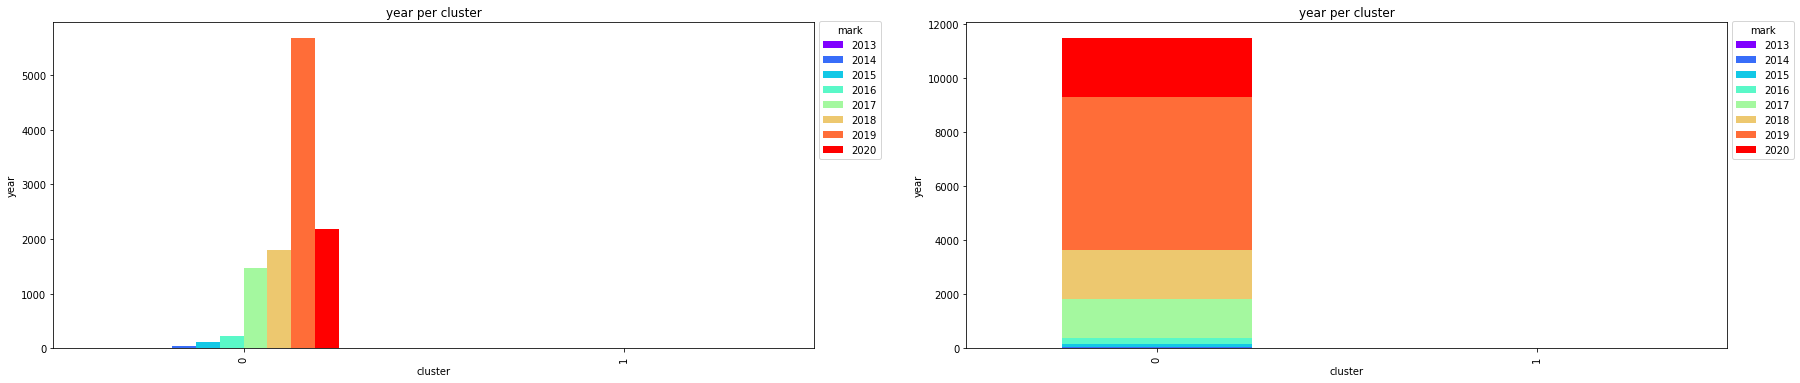

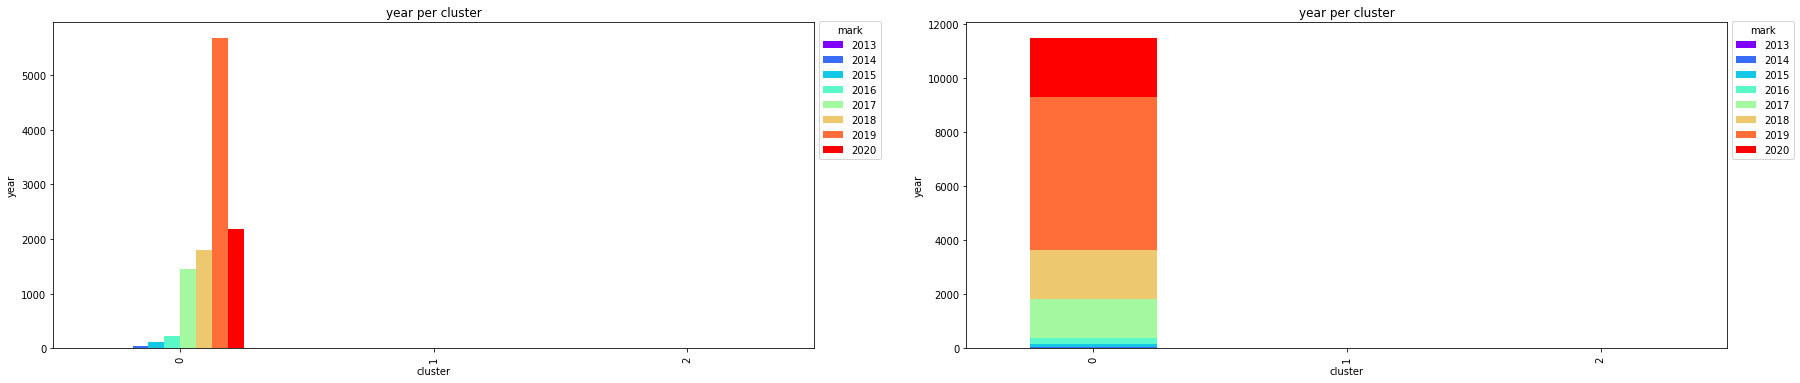

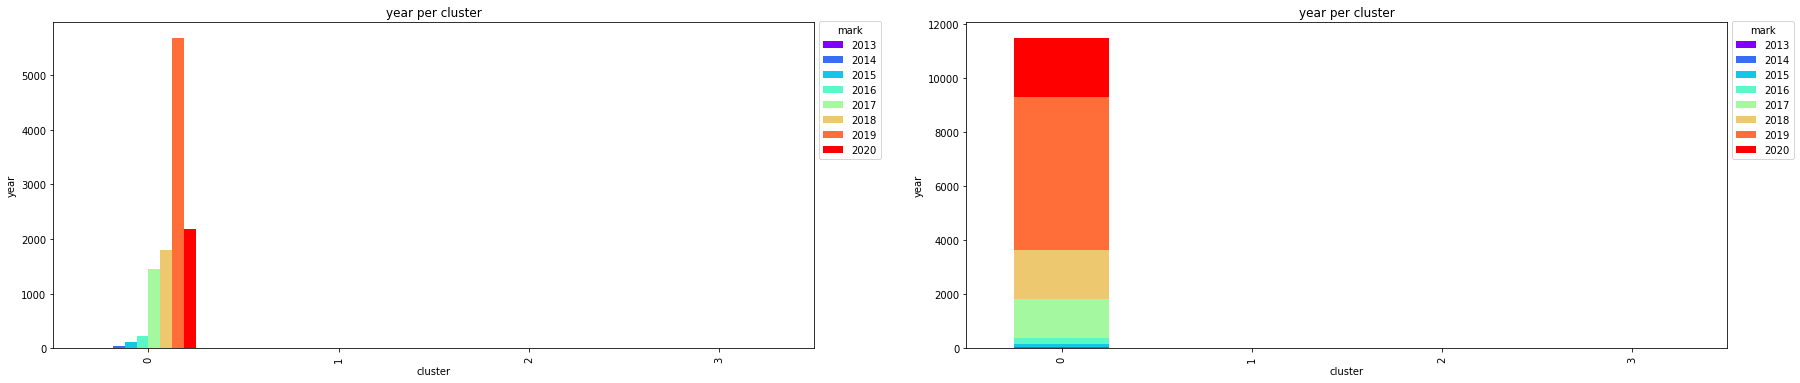

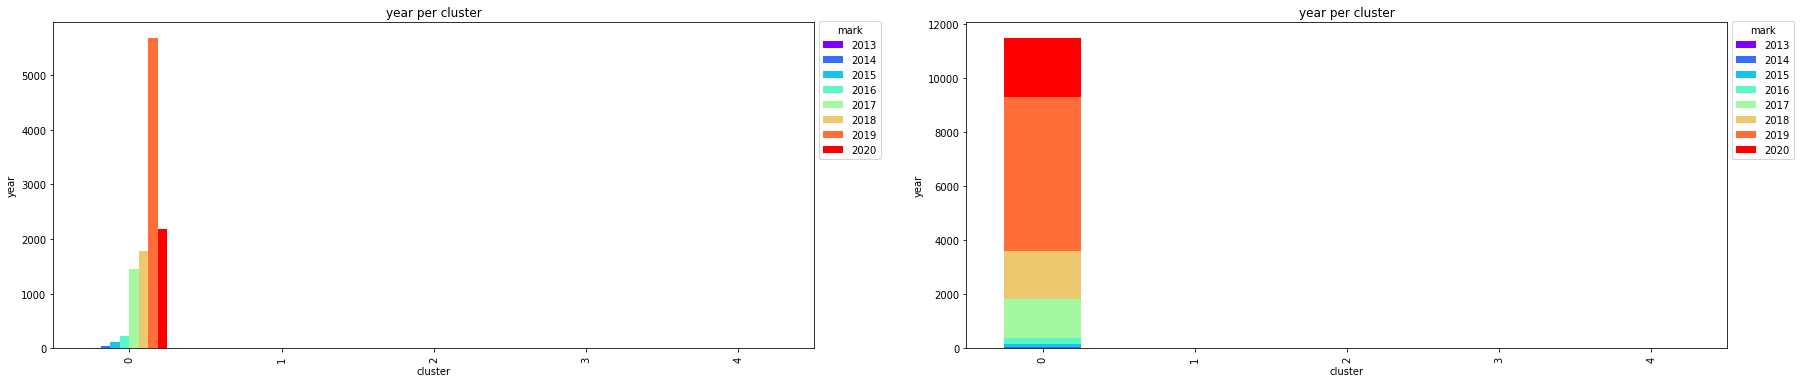

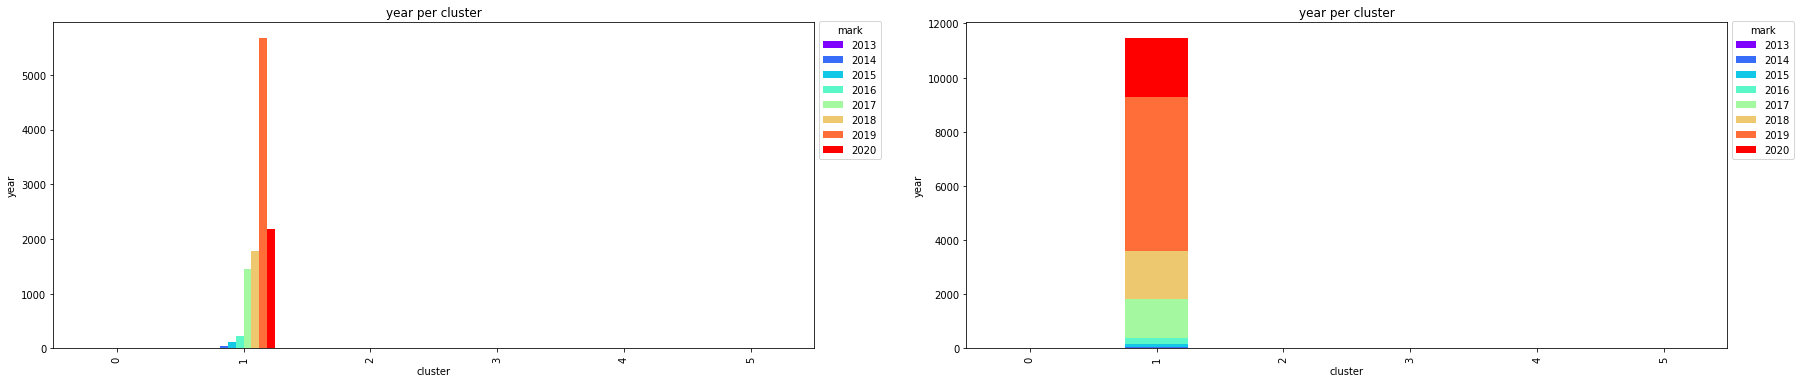

In [ ]:
for i in range(len(cluster_labels)):
  year_ct = pd.crosstab(cluster_labels[i],users_profile_all['most_freq_year'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = year_ct.plot(kind='bar', stacked=False, title='year per cluster', ax=axs[0], colormap="rainbow")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('year')

  ax2 = year_ct.plot(kind='bar', stacked=True, title='year per cluster', ax=axs[1], colormap="rainbow")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('year')

  plt.show()

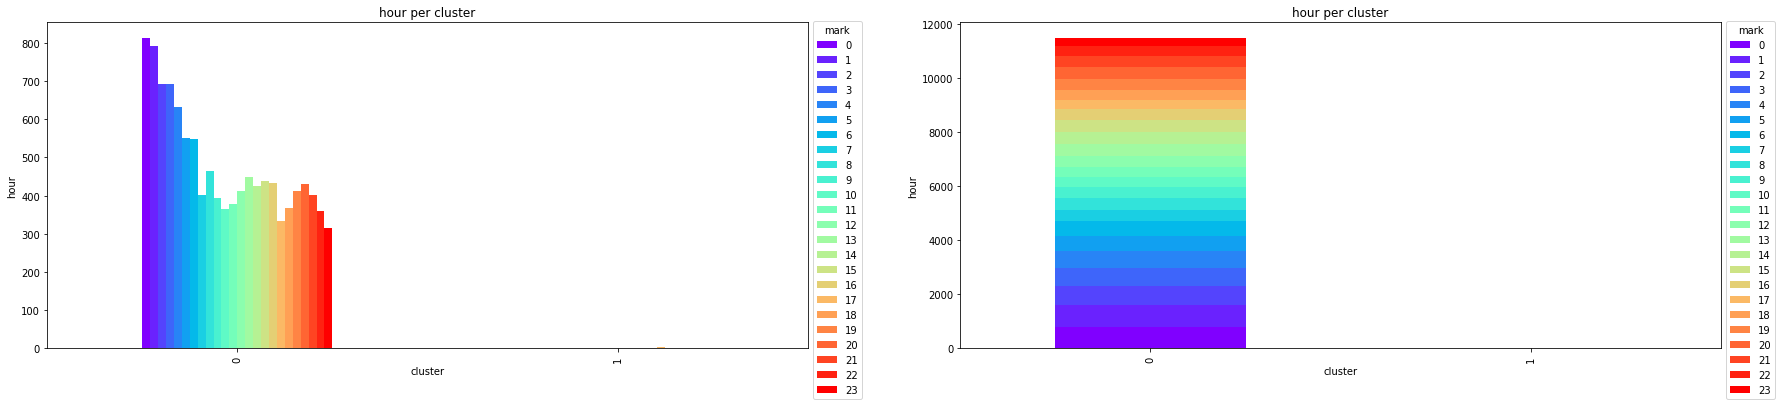

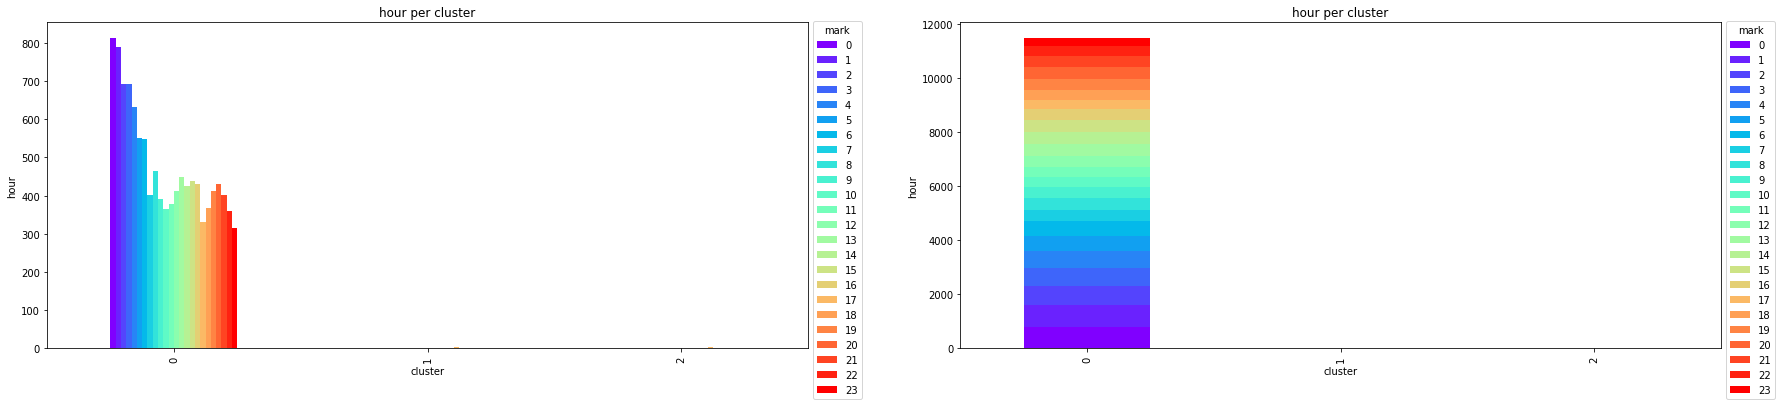

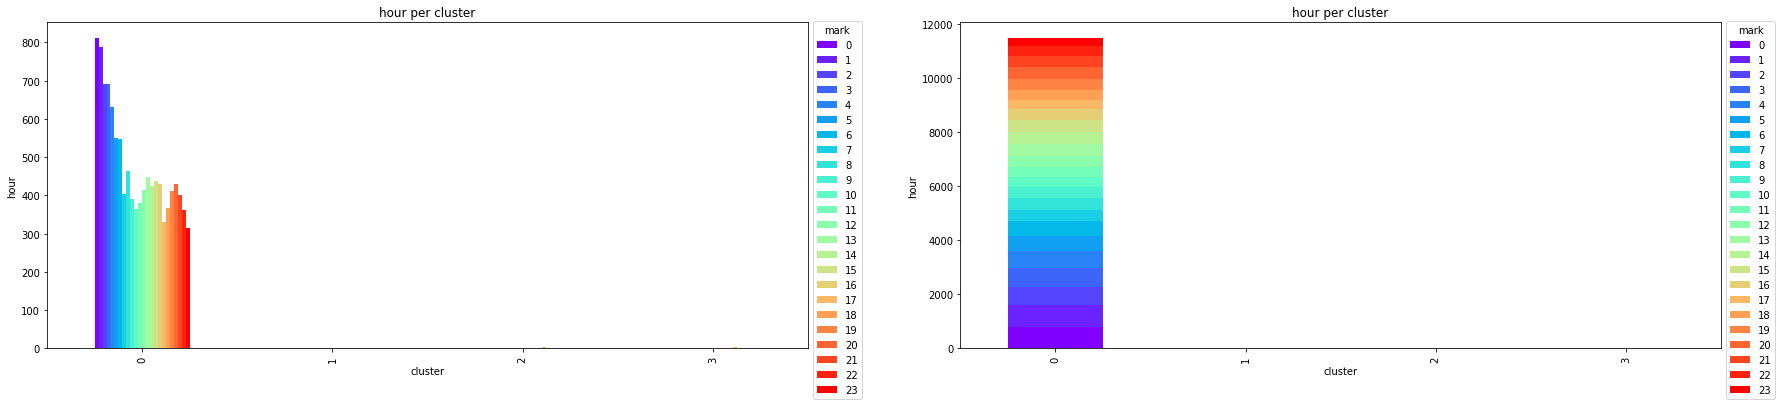

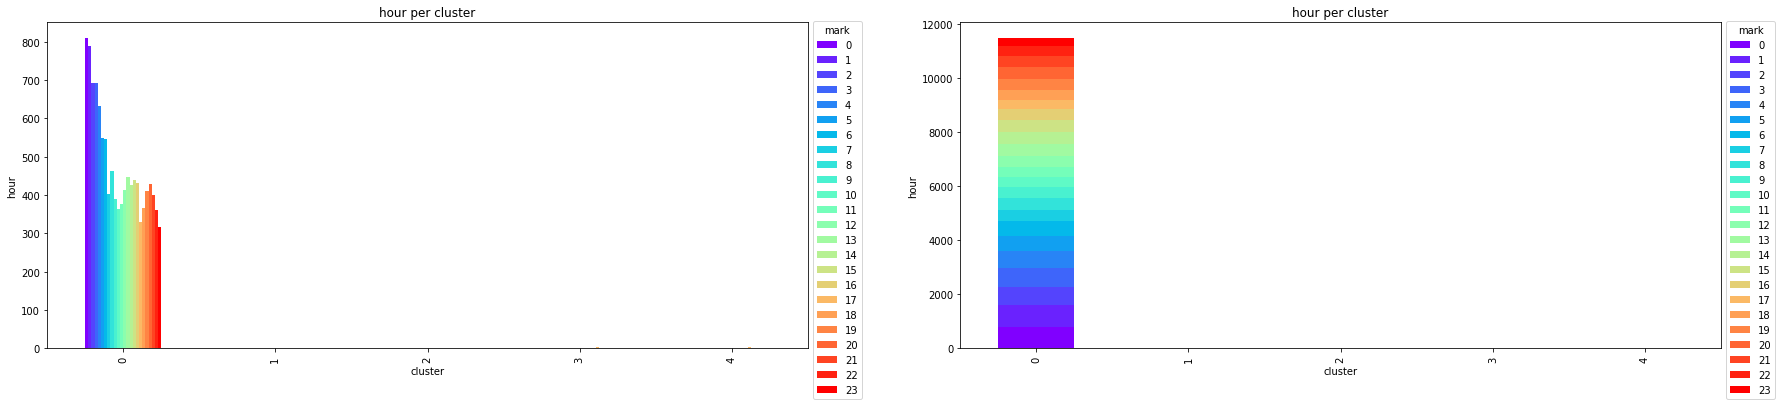

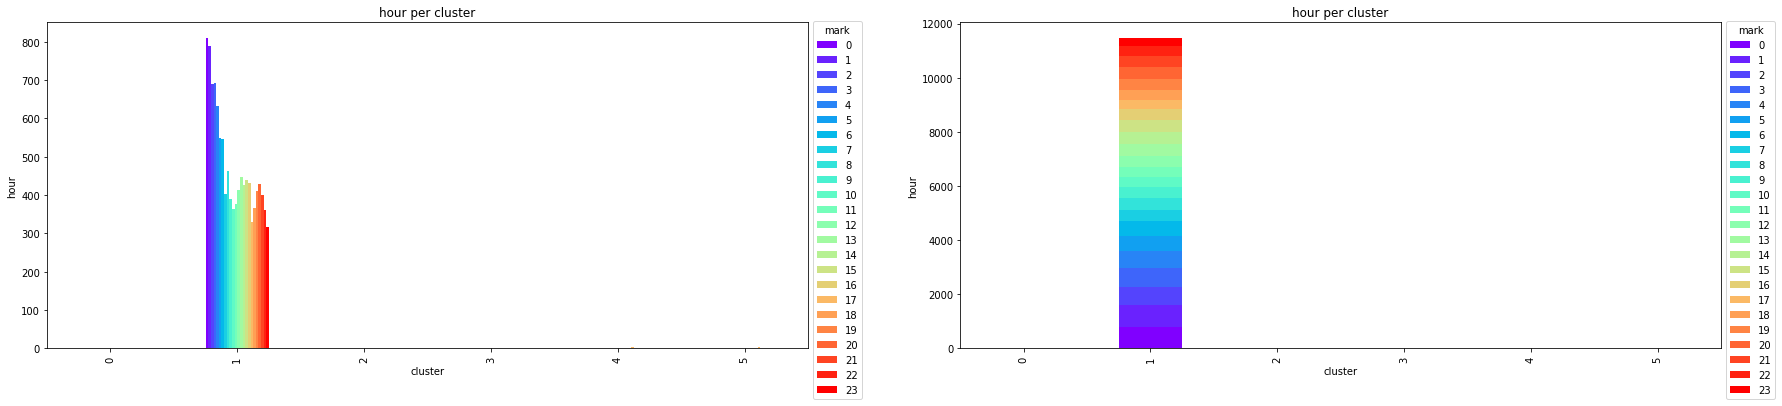

In [ ]:
for i in range(len(cluster_labels)):
  hour_ct = pd.crosstab(cluster_labels[i],users_profile_all['most_freq_hour'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = hour_ct.plot(kind='bar', stacked=False, title='hour per cluster', ax=axs[0], colormap="rainbow")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('hour')

  ax2 = hour_ct.plot(kind='bar', stacked=True, title='hour per cluster', ax=axs[1], colormap="rainbow")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('hour')

  plt.show()

## Clusters characterization with respect to numerical features

In [ ]:
cols = []
for i in range(len(cluster_labels)):
  s = 'label_K='+str(i+2)
  cols.append(s)

In [ ]:
for i in range(len(cluster_labels)):
  users_profile_all[cols[i]]=cluster_labels[i]

In [ ]:
users_profile_all.head()

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,url_entropy,men_entropy,avg_textlen,days_on_tw,activity_richness,label_K=2,label_K=3,label_K=4,label_K=5,label_K=6
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.0,0.0,1201.0,868.0,...,9.578214,10.607494,109.637321,3900,0.608718,0,0,0,0,1
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.0,0.0,969.0,766.0,...,0.000000,0.000000,85.026719,3893,0.519137,0,0,0,0,1
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.0,0.0,391.0,77.0,...,5.114369,6.387527,80.780317,3885,0.551866,0,0,0,0,1
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.0,0.0,209.0,488.0,...,0.000000,0.000000,84.281111,3884,0.519310,0,0,0,0,1
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.0,0.0,1714.0,185.0,...,8.222893,9.556485,95.166473,3870,0.887855,0,0,0,0,1


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).mean()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,,
0,5570.224106,4.974417e+05,736.339595,178.082790,182.272545,505.267849,36872.743717,210.213497,1705.789660,14.674679,326.921336,0.657895,2.821634,70.267184,1820.039482,0.509794
1,898.444444,7.401423e+06,691678.555556,927.666667,666.444444,1408.333333,61312.111111,10000.000000,7630.527796,1899.558309,8213.838731,2.933720,1.141612,111.864264,2553.888889,0.418700


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,,
0,5575.043868,4.971608e+05,727.299243,178.229698,182.428758,505.701018,36772.968230,201.692488,1650.144983,12.418075,278.610690,0.657319,2.824090,70.189792,1819.471930,0.510232
1,32.800000,8.201724e+05,11122.800000,9.300000,2.800000,7.600000,151504.800000,10000.000000,65635.959665,2607.287403,55831.022461,1.320406,0.000000,159.183072,2472.100000,0.006184
2,898.444444,7.401423e+06,691678.555556,927.666667,666.444444,1408.333333,61312.111111,10000.000000,7630.527796,1899.558309,8213.838731,2.933720,1.141612,111.864264,2553.888889,0.418700


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,,
0,5575.963437,4.964739e+05,727.422129,178.256638,182.456081,505.771655,36700.907809,201.725255,1632.922757,12.420067,272.945682,0.657231,2.823895,70.188666,1819.435362,0.510311
1,293.500000,4.442488e+06,21.500000,23.500000,25.500000,100.000000,450652.000000,13.500000,100565.996965,0.973184,32815.581978,1.160051,3.941437,76.657937,2029.500000,0.060355
2,32.800000,8.201724e+05,11122.800000,9.300000,2.800000,7.600000,151504.800000,10000.000000,65635.959665,2607.287403,55831.022461,1.320406,0.000000,159.183072,2472.100000,0.006184
3,898.444444,7.401423e+06,691678.555556,927.666667,666.444444,1408.333333,61312.111111,10000.000000,7630.527796,1899.558309,8213.838731,2.933720,1.141612,111.864264,2553.888889,0.418700


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,,
0,5581.762527,4.969900e+05,728.177516,177.968540,182.353987,506.125229,36738.102919,201.93098,1634.367957,12.432220,273.143349,0.628810,2.824885,70.195584,1819.448453,0.510824
1,30.583333,2.951750e+03,5.083333,453.750000,280.083333,167.666667,1133.083333,5.00000,250.950281,0.799348,83.926738,27.835424,1.877156,63.573330,1806.916667,0.019627
2,293.500000,4.442488e+06,21.500000,23.500000,25.500000,100.000000,450652.000000,13.50000,100565.996965,0.973184,32815.581978,1.160051,3.941437,76.657937,2029.500000,0.060355
3,32.800000,8.201724e+05,11122.800000,9.300000,2.800000,7.600000,151504.800000,10000.00000,65635.959665,2607.287403,55831.022461,1.320406,0.000000,159.183072,2472.100000,0.006184
4,898.444444,7.401423e+06,691678.555556,927.666667,666.444444,1408.333333,61312.111111,10000.00000,7630.527796,1899.558309,8213.838731,2.933720,1.141612,111.864264,2553.888889,0.418700


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,,
0,33153.333333,2.067000e+03,91.333333,11984.666667,2058.666667,1027.666667,1034.333333,2.000000,21.175220,0.166665,0.842568,4.593485,10.658713,104.723693,2159.000000,1.738671
1,5574.552388,4.971194e+05,728.344055,174.881015,181.863319,505.988842,36747.439679,201.983264,1634.789817,12.435427,273.214557,0.627773,2.822836,70.186554,1819.359658,0.510503
2,293.500000,4.442488e+06,21.500000,23.500000,25.500000,100.000000,450652.000000,13.500000,100565.996965,0.973184,32815.581978,1.160051,3.941437,76.657937,2029.500000,0.060355
3,30.583333,2.951750e+03,5.083333,453.750000,280.083333,167.666667,1133.083333,5.000000,250.950281,0.799348,83.926738,27.835424,1.877156,63.573330,1806.916667,0.019627
4,32.800000,8.201724e+05,11122.800000,9.300000,2.800000,7.600000,151504.800000,10000.000000,65635.959665,2607.287403,55831.022461,1.320406,0.000000,159.183072,2472.100000,0.006184
5,898.444444,7.401423e+06,691678.555556,927.666667,666.444444,1408.333333,61312.111111,10000.000000,7630.527796,1899.558309,8213.838731,2.933720,1.141612,111.864264,2553.888889,0.418700


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).std()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,,
0,17126.936106,2.972424e+06,3646.044505,496.122646,454.920580,1012.720715,98045.504814,1204.725356,5438.697167,111.938156,2086.368020,1.146480,3.912414,16.562926,552.195652,0.699783
1,521.143241,2.564940e+06,155603.564075,396.870256,291.824909,565.071456,6523.089901,0.000000,752.251154,425.573488,910.294529,0.110188,3.424835,2.638412,372.306475,0.209455


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,,
0,17133.609177,2.973700e+06,3633.647454,496.313525,455.087703,1013.054898,98029.793361,1170.097358,5103.204218,80.895710,1280.095854,1.146808,3.913230,16.356145,552.054066,0.699929
1,3.938415,1.315816e+05,3161.681894,1.567021,0.918937,1.429841,19.469634,0.000000,1473.829531,423.996614,6594.454218,0.106844,0.000000,14.195290,255.988476,0.001508
2,521.143241,2.564940e+06,155603.564075,396.870256,291.824909,565.071456,6523.089901,0.000000,752.251154,425.573488,910.294529,0.110188,3.424835,2.638412,372.306475,0.209455


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,,
0,17134.958716,2.973220e+06,3633.951851,496.352532,455.122514,1013.128476,97883.898468,1170.196578,4933.358276,80.902612,1205.249329,1.146886,3.913197,16.357136,551.998604,0.699965
1,362.745779,4.391120e+06,24.748737,3.535534,31.819805,104.651804,69788.610876,17.677670,7734.313707,0.937153,4713.706311,0.270540,5.574033,8.890465,1106.622113,0.043393
2,3.938415,1.315816e+05,3161.681894,1.567021,0.918937,1.429841,19.469634,0.000000,1473.829531,423.996614,6594.454218,0.106844,0.000000,14.195290,255.988476,0.001508
3,521.143241,2.564940e+06,155603.564075,396.870256,291.824909,565.071456,6523.089901,0.000000,752.251154,425.573488,910.294529,0.110188,3.424835,2.638412,372.306475,0.209455


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,,
0,17142.977630,2.974732e+06,3635.776478,496.307647,455.140310,1013.527601,97928.281382,1170.790962,4935.704904,80.944004,1205.844958,0.664913,3.914682,16.361485,552.274929,0.700151
1,12.844938,7.820485e+03,13.747452,482.032840,445.714841,388.789107,2356.951246,13.463756,554.938299,2.209164,218.323768,10.278849,1.898254,9.780604,118.087378,0.007461
2,362.745779,4.391120e+06,24.748737,3.535534,31.819805,104.651804,69788.610876,17.677670,7734.313707,0.937153,4713.706311,0.270540,5.574033,8.890465,1106.622113,0.043393
3,3.938415,1.315816e+05,3161.681894,1.567021,0.918937,1.429841,19.469634,0.000000,1473.829531,423.996614,6594.454218,0.106844,0.000000,14.195290,255.988476,0.001508
4,521.143241,2.564940e+06,155603.564075,396.870256,291.824909,565.071456,6523.089901,0.000000,752.251154,425.573488,910.294529,0.110188,3.424835,2.638412,372.306475,0.209455


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,,
0,29744.762772,3.429563e+03,49.863146,3683.464719,1772.342047,1098.870481,1788.054063,0.000000,36.394711,0.056340,1.216432,1.376774,0.374913,25.793735,851.761117,0.771307
1,17134.918083,2.975110e+06,3636.237229,455.580842,453.583768,1013.521170,97939.380810,1170.939585,4936.281298,80.954345,1205.994588,0.661651,3.913140,16.350545,552.205317,0.699887
2,362.745779,4.391120e+06,24.748737,3.535534,31.819805,104.651804,69788.610876,17.677670,7734.313707,0.937153,4713.706311,0.270540,5.574033,8.890465,1106.622113,0.043393
3,12.844938,7.820485e+03,13.747452,482.032840,445.714841,388.789107,2356.951246,13.463756,554.938299,2.209164,218.323768,10.278849,1.898254,9.780604,118.087378,0.007461
4,3.938415,1.315816e+05,3161.681894,1.567021,0.918937,1.429841,19.469634,0.000000,1473.829531,423.996614,6594.454218,0.106844,0.000000,14.195290,255.988476,0.001508
5,521.143241,2.564940e+06,155603.564075,396.870256,291.824909,565.071456,6523.089901,0.000000,752.251154,425.573488,910.294529,0.110188,3.424835,2.638412,372.306475,0.209455


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).max()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,,
0,200000,99360670.0,221102.0,16228.0,4335.0,13664.0,500000.0,10000.0,106034.982635,3722.299247,69042.40000,41.833333,11.821278,245.000000,3900,4.148438
1,1576,10474874.0,822127.0,1515.0,1052.0,2143.0,69142.0,10000.0,9054.949051,2418.401650,9651.71129,3.043548,10.274506,116.341812,3068,0.690593


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,,
0,200000,99360670.0,221102.0,16228.0,4335.0,13664.0,500000.0,10000.0,106034.982635,1997.739832,36148.675676,41.833333,11.821278,245.000000,3900,4.148438
1,41,1034580.0,20121.0,12.0,5.0,10.0,151542.0,10000.0,69510.395858,3722.299247,69042.400000,1.500000,0.000000,189.000000,2868,0.008707
2,1576,10474874.0,822127.0,1515.0,1052.0,2143.0,69142.0,10000.0,9054.949051,2418.401650,9651.711290,3.043548,10.274506,116.341812,3068,0.690593


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,,
0,200000,99360670.0,221102.0,16228.0,4335.0,13664.0,500000.0,10000.0,63204.336440,1997.739832,26717.125571,41.833333,11.821278,245.000000,3900,4.148438
1,550,7547478.0,39.0,26.0,48.0,174.0,500000.0,26.0,106034.982635,1.635852,36148.675676,1.351351,7.882873,82.944444,2812,0.091038
2,41,1034580.0,20121.0,12.0,5.0,10.0,151542.0,10000.0,69510.395858,3722.299247,69042.400000,1.500000,0.000000,189.000000,2868,0.008707
3,1576,10474874.0,822127.0,1515.0,1052.0,2143.0,69142.0,10000.0,9054.949051,2418.401650,9651.711290,3.043548,10.274506,116.341812,3068,0.690593


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,,
0,200000,99360670.0,221102.0,16228.0,4335.0,13664.0,500000.0,10000.0,63204.336440,1997.739832,26717.125571,10.440860,11.821278,245.000000,3900,4.148438
1,57,27275.0,48.0,1013.0,1001.0,1000.0,7322.0,47.0,1865.658108,7.720823,759.027778,41.833333,5.342545,78.657143,1921,0.034375
2,550,7547478.0,39.0,26.0,48.0,174.0,500000.0,26.0,106034.982635,1.635852,36148.675676,1.351351,7.882873,82.944444,2812,0.091038
3,41,1034580.0,20121.0,12.0,5.0,10.0,151542.0,10000.0,69510.395858,3722.299247,69042.400000,1.500000,0.000000,189.000000,2868,0.008707
4,1576,10474874.0,822127.0,1515.0,1052.0,2143.0,69142.0,10000.0,9054.949051,2418.401650,9651.711290,3.043548,10.274506,116.341812,3068,0.690593


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,,
0,67458,6026.0,135.0,16228.0,3495.0,2295.0,3099.0,2.0,63.199973,0.202755,2.245511,6.139245,11.016436,122.666667,3092,2.622628
1,200000,99360670.0,221102.0,7750.0,4335.0,13664.0,500000.0,10000.0,63204.336440,1997.739832,26717.125571,10.440860,11.821278,245.000000,3900,4.148438
2,550,7547478.0,39.0,26.0,48.0,174.0,500000.0,26.0,106034.982635,1.635852,36148.675676,1.351351,7.882873,82.944444,2812,0.091038
3,57,27275.0,48.0,1013.0,1001.0,1000.0,7322.0,47.0,1865.658108,7.720823,759.027778,41.833333,5.342545,78.657143,1921,0.034375
4,41,1034580.0,20121.0,12.0,5.0,10.0,151542.0,10000.0,69510.395858,3722.299247,69042.400000,1.500000,0.000000,189.000000,2868,0.008707
5,1576,10474874.0,822127.0,1515.0,1052.0,2143.0,69142.0,10000.0,9054.949051,2418.401650,9651.711290,3.043548,10.274506,116.341812,3068,0.690593


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).min()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,,
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
1,24,4822308.0,371197.0,540.0,363.0,750.0,46559.0,10000.0,6900.52577,997.037438,6873.451838,2.712182,0.0,108.440111,2069,0.216816


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,,
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
1,28,674398.0,10103.0,7.0,2.0,6.0,151492.0,10000.0,64439.14092,2177.851049,48132.352941,1.117647,0.0,141.166667,2100,0.004533
2,24,4822308.0,371197.0,540.0,363.0,750.0,46559.0,10000.0,6900.52577,997.037438,6873.451838,2.712182,0.0,108.440111,2069,0.216816


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,,
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
1,37,1337497.0,4.0,21.0,3.0,26.0,401304.0,1.0,95097.011295,0.310517,29482.488281,0.968750,0.0,70.371429,1247,0.029671
2,28,674398.0,10103.0,7.0,2.0,6.0,151492.0,10000.0,64439.140920,2177.851049,48132.352941,1.117647,0.0,141.166667,2100,0.004533
3,24,4822308.0,371197.0,540.0,363.0,750.0,46559.0,10000.0,6900.525770,997.037438,6873.451838,2.712182,0.0,108.440111,2069,0.216816


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,,
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
1,16,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,15.409091,0.0,53.272727,1686,0.010676
2,37,1337497.0,4.0,21.0,3.0,26.0,401304.0,1.0,95097.011295,0.310517,29482.488281,0.968750,0.0,70.371429,1247,0.029671
3,28,674398.0,10103.0,7.0,2.0,6.0,151492.0,10000.0,64439.140920,2177.851049,48132.352941,1.117647,0.0,141.166667,2100,0.004533
4,24,4822308.0,371197.0,540.0,363.0,750.0,46559.0,10000.0,6900.525770,997.037438,6873.451838,2.712182,0.0,108.440111,2069,0.216816


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,,
0,14537,6.0,37.0,9611.0,78.0,340.0,1.0,2.0,0.040064,0.101744,0.081764,3.498928,10.268699,75.164490,1423,1.202458
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,890,0.000319
2,37,1337497.0,4.0,21.0,3.0,26.0,401304.0,1.0,95097.011295,0.310517,29482.488281,0.968750,0.000000,70.371429,1247,0.029671
3,16,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,15.409091,0.000000,53.272727,1686,0.010676
4,28,674398.0,10103.0,7.0,2.0,6.0,151492.0,10000.0,64439.140920,2177.851049,48132.352941,1.117647,0.000000,141.166667,2100,0.004533
5,24,4822308.0,371197.0,540.0,363.0,750.0,46559.0,10000.0,6900.525770,997.037438,6873.451838,2.712182,0.000000,108.440111,2069,0.216816


# kmedoids

In [ ]:
input_data = list(X)

# Initialize initial medoids using K-Means++ algorithm
# Create instance of K-Medoids (PAM) algorithm.
# Run cluster analysis and obtain results.

initial_medoids2 = kmeans_plusplus_initializer(input_data, 2).initialize(return_index=True)
kmedoids_instance2 = kmedoids(input_data, initial_medoids2)
kmedoids_instance2.process()
clusters2 = kmedoids_instance2.get_clusters()
medoids2 = kmedoids_instance2.get_medoids()

initial_medoids3 = kmeans_plusplus_initializer(input_data, 3).initialize(return_index=True)
kmedoids_instance3 = kmedoids(input_data, initial_medoids3)
kmedoids_instance3.process()
clusters3 = kmedoids_instance3.get_clusters()
medoids3 = kmedoids_instance3.get_medoids()

initial_medoids4 = kmeans_plusplus_initializer(input_data, 4).initialize(return_index=True)
kmedoids_instance4 = kmedoids(input_data, initial_medoids4)
kmedoids_instance4.process()
clusters4 = kmedoids_instance4.get_clusters()
medoids4 = kmedoids_instance4.get_medoids()

initial_medoids5 = kmeans_plusplus_initializer(input_data, 5).initialize(return_index=True)
kmedoids_instance5 = kmedoids(input_data, initial_medoids5)
kmedoids_instance5.process()
clusters5 = kmedoids_instance5.get_clusters()
medoids5 = kmedoids_instance5.get_medoids()

initial_medoids6 = kmeans_plusplus_initializer(input_data, 6).initialize(return_index=True)
kmedoids_instance6 = kmedoids(input_data, initial_medoids6)
kmedoids_instance6.process()
clusters6 = kmedoids_instance6.get_clusters()
medoids6 = kmedoids_instance6.get_medoids()

In [ ]:
#medoids2

In [ ]:
# Prepare cluster labels
cluster_labels = []

cluster_labels2 = np.zeros([11508], dtype=int)    # 0,1
for x in np.nditer(np.asarray(clusters2[1])):
   cluster_labels2[x] = 1
cluster_labels.append(cluster_labels2)

cluster_labels3 = np.zeros([11508], dtype=int)    # 0,1,2
for x in np.nditer(np.asarray(clusters3[1])):
   cluster_labels3[x] = 1
for x in np.nditer(np.asarray(clusters3[2])):
   cluster_labels3[x] = 2
cluster_labels.append(cluster_labels3)

cluster_labels4 = np.zeros([11508], dtype=int)    # 0,1,2,3
for x in np.nditer(np.asarray(clusters4[1])):
   cluster_labels4[x] = 1
for x in np.nditer(np.asarray(clusters4[2])):
   cluster_labels4[x] = 2
for x in np.nditer(np.asarray(clusters4[3])):
   cluster_labels4[x] = 3
cluster_labels.append(cluster_labels4)

cluster_labels5 = np.zeros([11508], dtype=int)    # 0,1,2,3,4
for x in np.nditer(np.asarray(clusters5[1])):
   cluster_labels5[x] = 1
for x in np.nditer(np.asarray(clusters5[2])):
   cluster_labels5[x] = 2
for x in np.nditer(np.asarray(clusters5[3])):
   cluster_labels5[x] = 3
for x in np.nditer(np.asarray(clusters5[4])):
   cluster_labels5[x] = 4
cluster_labels.append(cluster_labels5)

cluster_labels6 = np.zeros([11508], dtype=int)    # 0,1,2,3,4,5
for x in np.nditer(np.asarray(clusters6[1])):
   cluster_labels6[x] = 1
for x in np.nditer(np.asarray(clusters6[2])):
   cluster_labels6[x] = 2
for x in np.nditer(np.asarray(clusters6[3])):
   cluster_labels6[x] = 3
for x in np.nditer(np.asarray(clusters6[4])):
   cluster_labels6[x] = 4
for x in np.nditer(np.asarray(clusters6[5])):
   cluster_labels6[x] = 5
cluster_labels.append(cluster_labels6)



In [ ]:
# Display clustering results.    (cause full ram due to the number of features)
#visualizer = cluster_visualizer_multidim()
#visualizer.append_clusters(clusters, input_data)
#visualizer.append_cluster(initial_medoids2, input_data, markersize=12, marker='*', color='gray')
#visualizer.append_cluster(medoids2, input_data, markersize=14, marker='*', color='black')
#visualizer.show()

## Clusters characterization with respect to categorical features

In [ ]:
users_profile_all = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile.csv', lineterminator='\n')

In [ ]:
users_profile_all.head()

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,hour_entropy,favcount_entropy,retcount_entropy,repcount_entropy,has_entropy,url_entropy,men_entropy,avg_textlen,days_on_tw,activity_richness
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.0,0.0,1201.0,868.0,...,0.0,8.831943,6.080426,0.0,9.183814,9.578214,10.607494,109.637321,3900,0.608718
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.0,0.0,969.0,766.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,85.026719,3893,0.519137
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.0,0.0,391.0,77.0,...,0.0,3.921117,2.375534,0.0,4.836434,5.114369,6.387527,80.780317,3885,0.551866
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.0,0.0,209.0,488.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,84.281111,3884,0.519310
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.0,0.0,1714.0,185.0,...,0.0,8.277790,2.354578,0.0,8.421512,8.222893,9.556485,95.166473,3870,0.887855


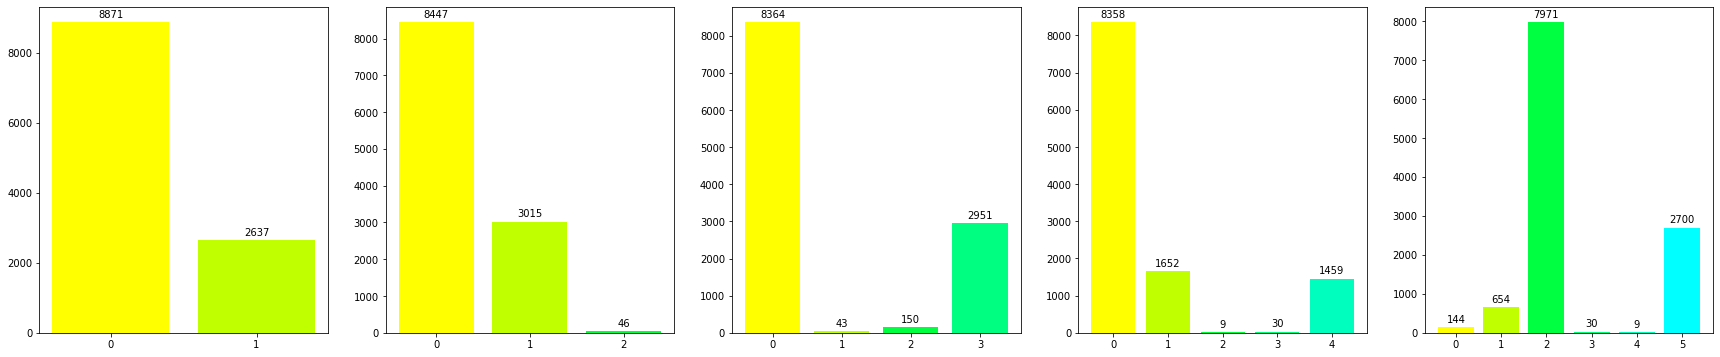

In [ ]:
fig, ax = plt.subplots(ncols=len(cluster_labels), figsize=(30,6))
for i in range(len(cluster_labels)):
  hist, bins = np.histogram(cluster_labels[i], bins=range(0, len(set(cluster_labels[i])) + 1))
  #plt.stairs(hist, bins)
  clusters = ax[i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[i].bar_label(clusters, padding=3)
plt.show()

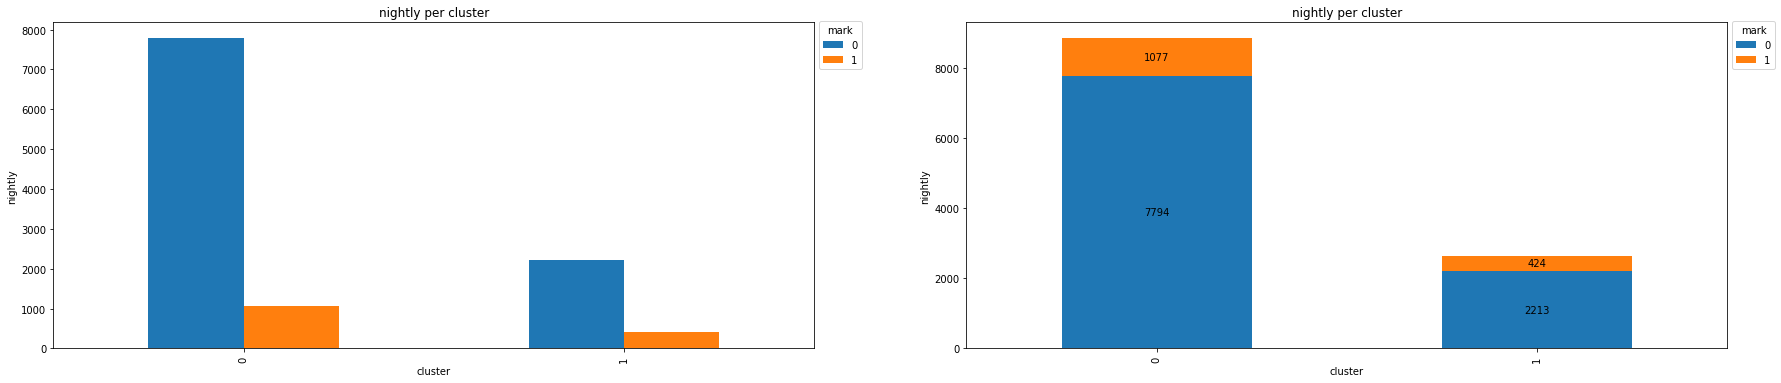

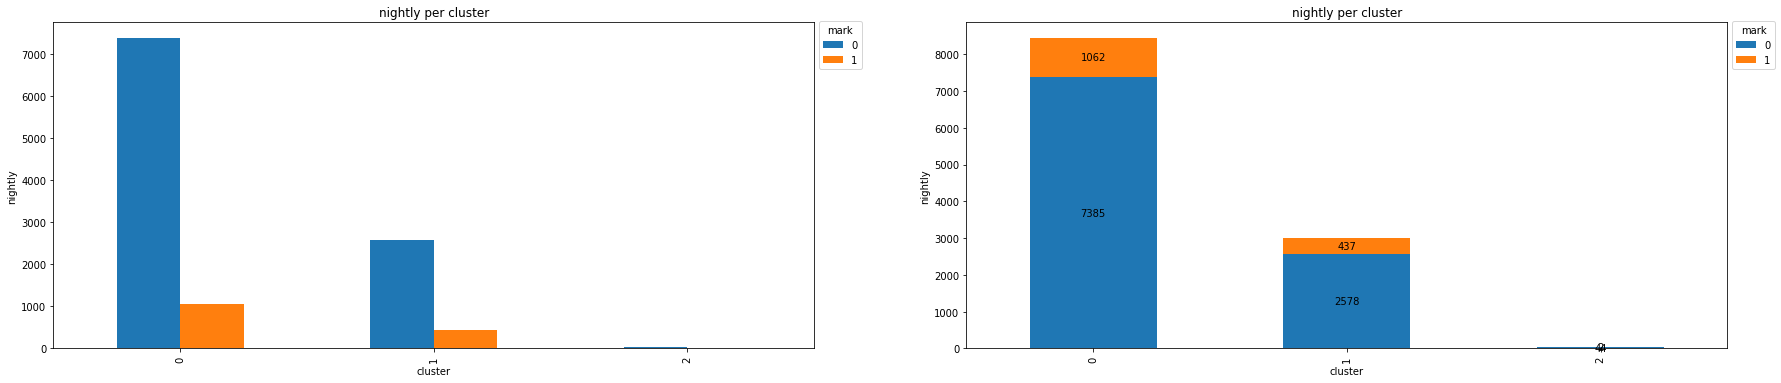

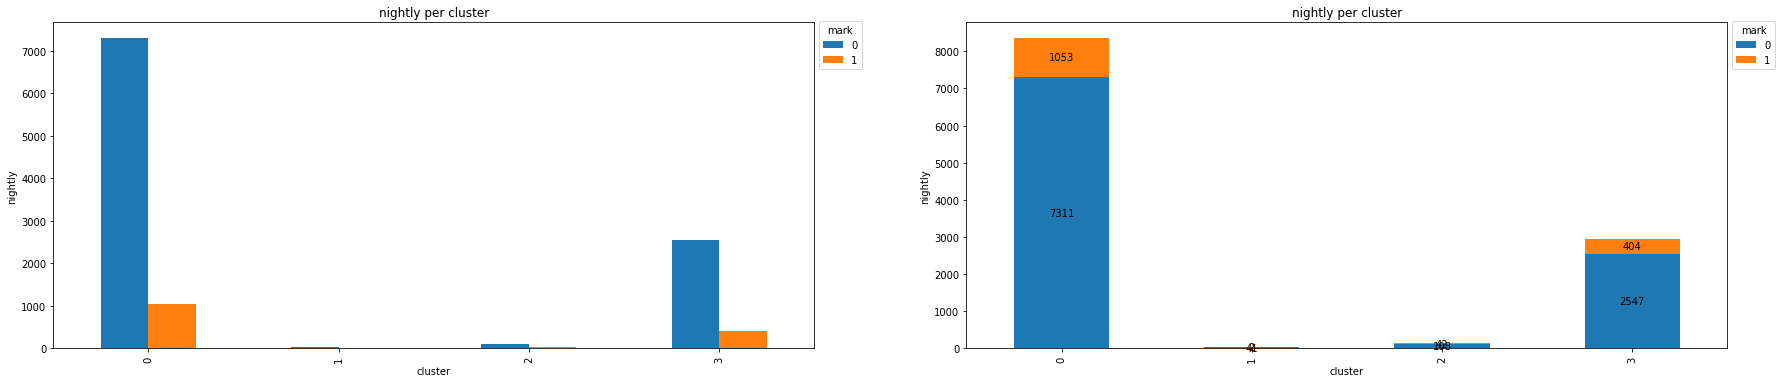

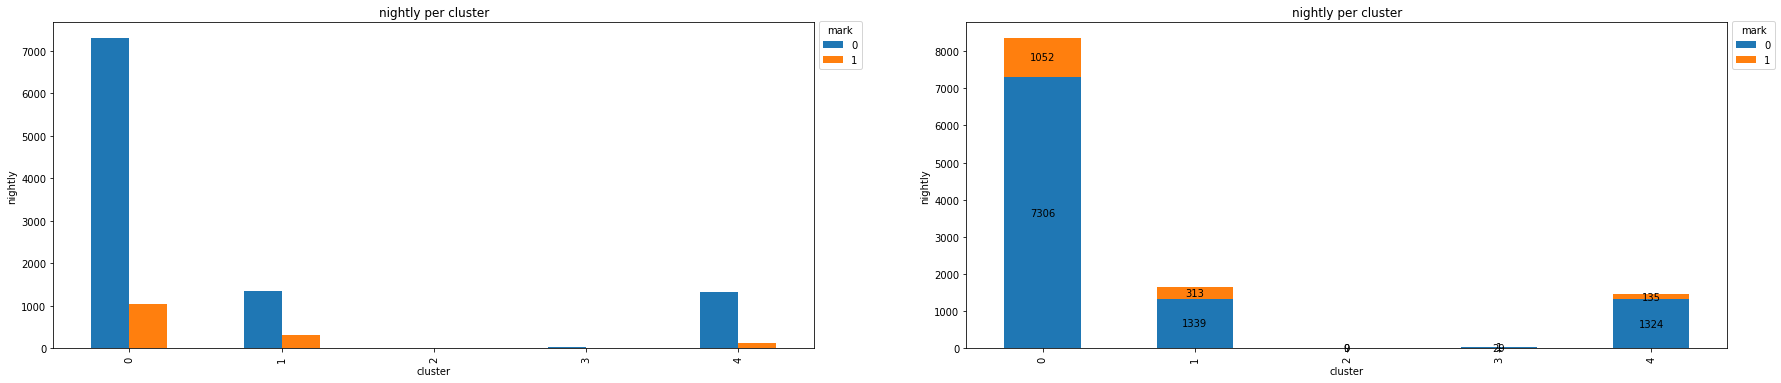

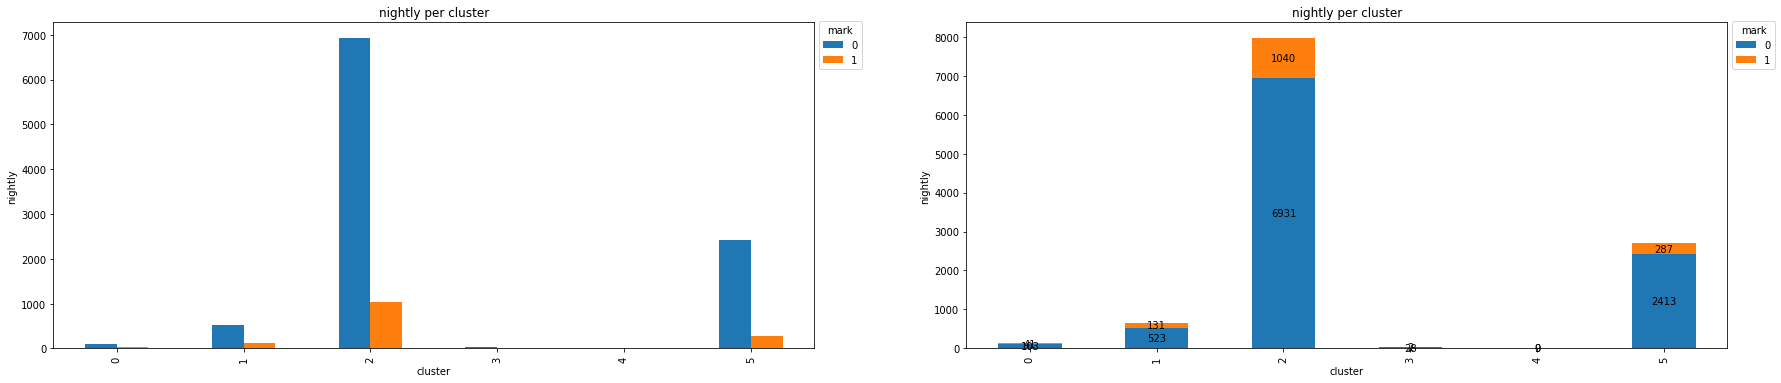

In [ ]:
for i in range(len(cluster_labels)):
  nightly_ct = pd.crosstab(cluster_labels[i],users_profile_all['nightly'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = nightly_ct.plot(kind='bar', stacked=False, title='nightly per cluster', ax=axs[0])
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('nightly')

  ax2 = nightly_ct.plot(kind='bar', stacked=True, title='nightly per cluster', ax=axs[1])
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  # add counts
  for c in ax2.containers:
      # set the bar label
      ax2.bar_label(c, label_type='center')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('nightly')

  plt.show()

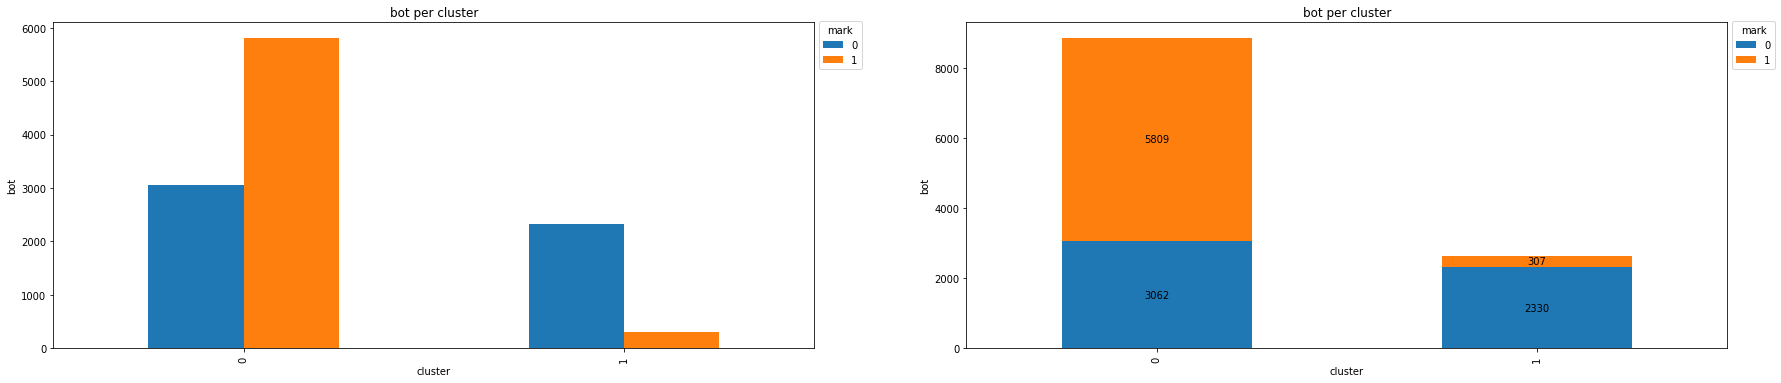

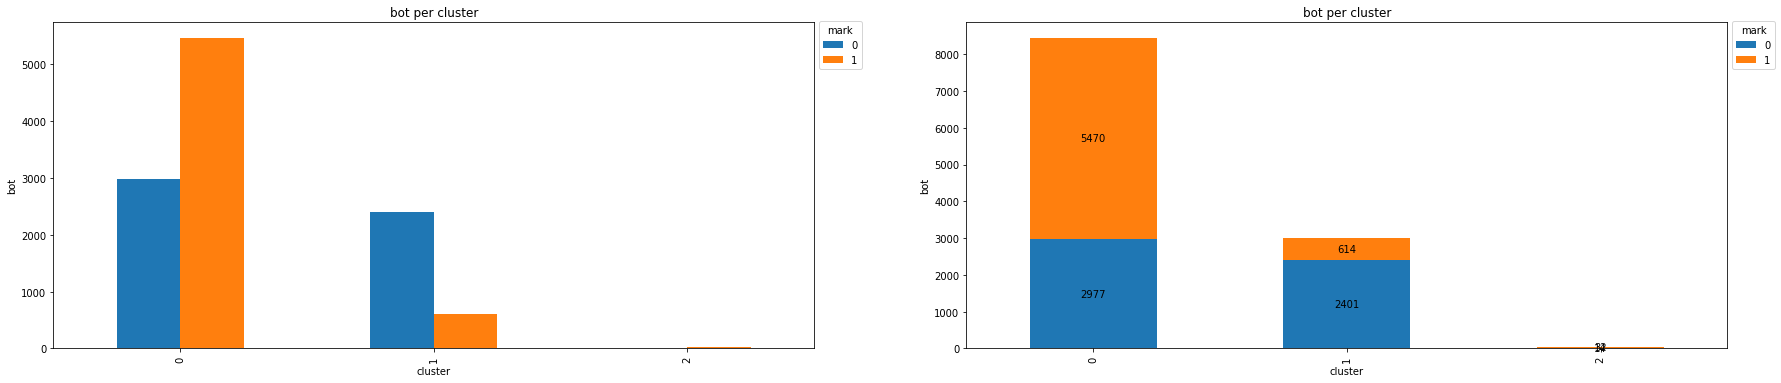

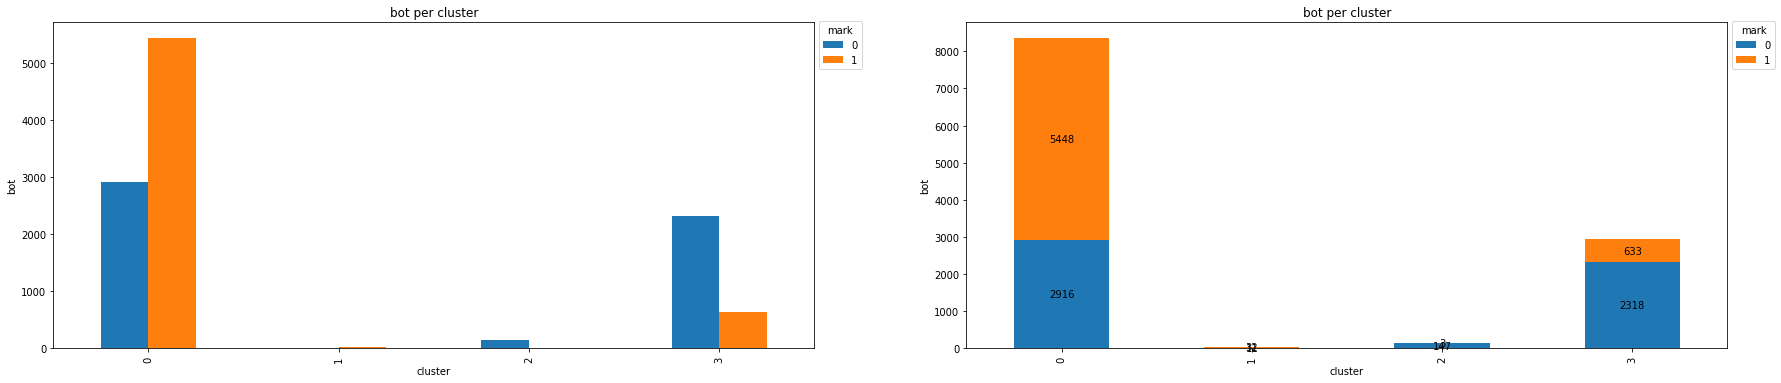

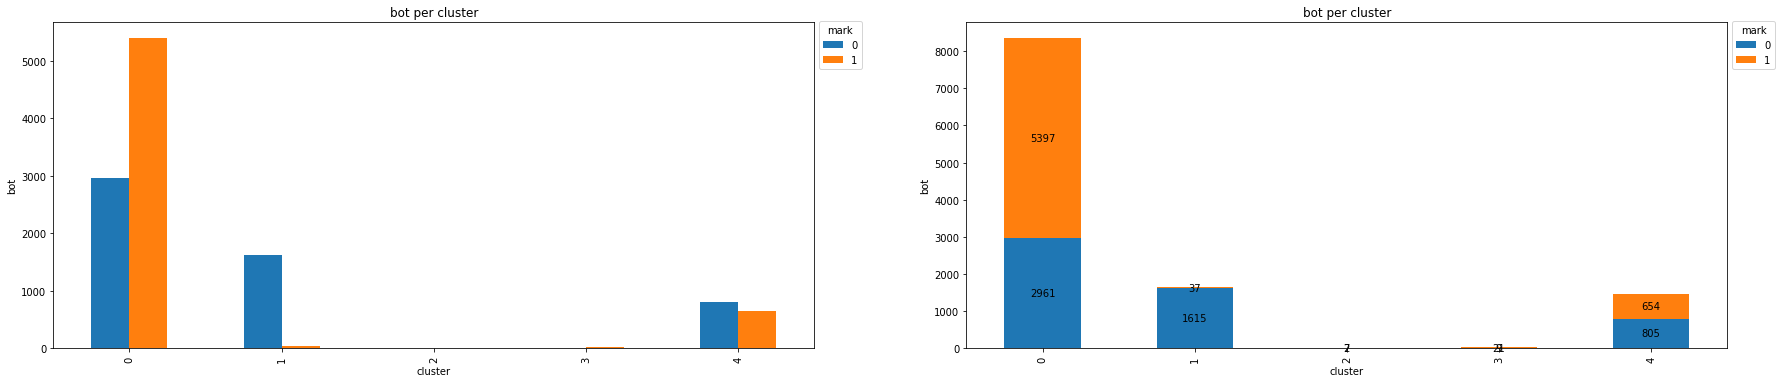

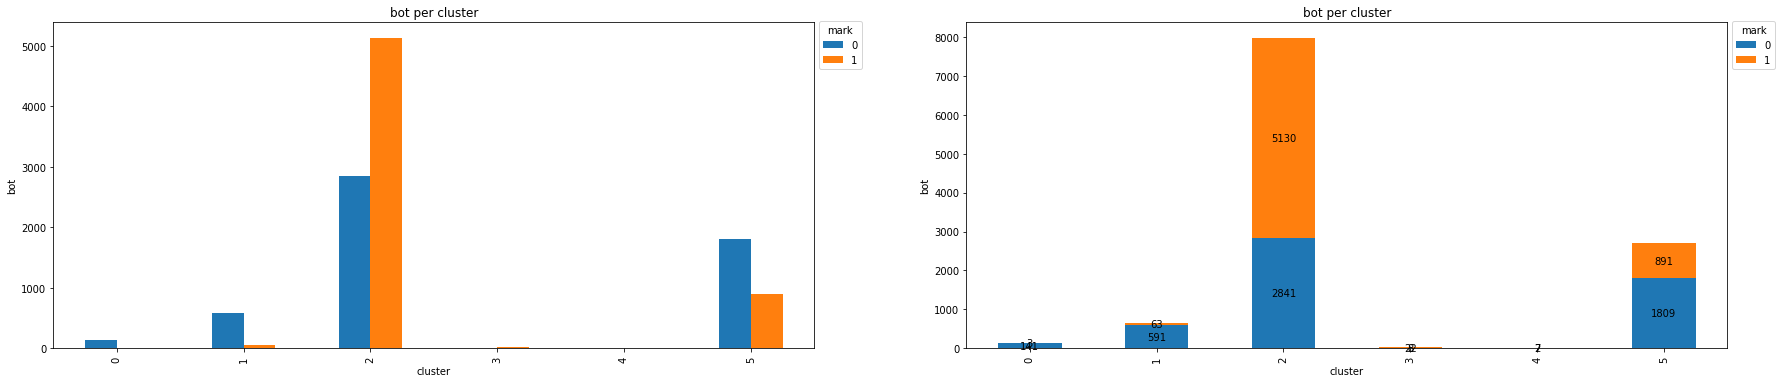

In [ ]:
for i in range(len(cluster_labels)):
  bot_ct = pd.crosstab(cluster_labels[i],users_profile_all['bot'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = bot_ct.plot(kind='bar', stacked=False, title='bot per cluster', ax=axs[0])
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('bot')

  ax2 = bot_ct.plot(kind='bar', stacked=True, title='bot per cluster', ax=axs[1])
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  # add counts
  for c in ax2.containers:
      # set the bar label
      ax2.bar_label(c, label_type='center')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('bot')

  plt.show()

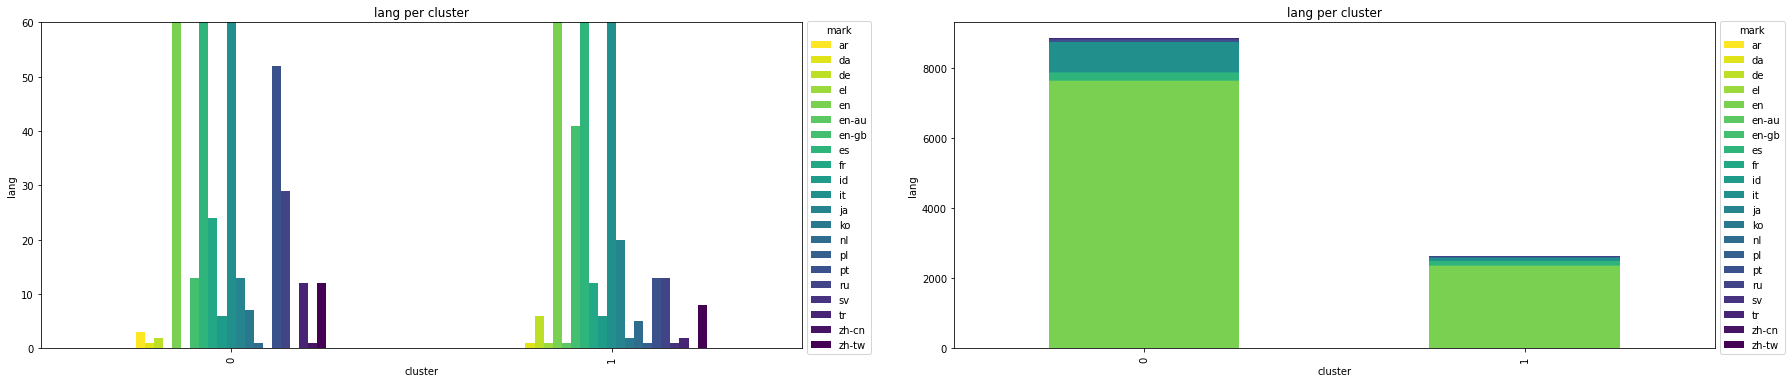

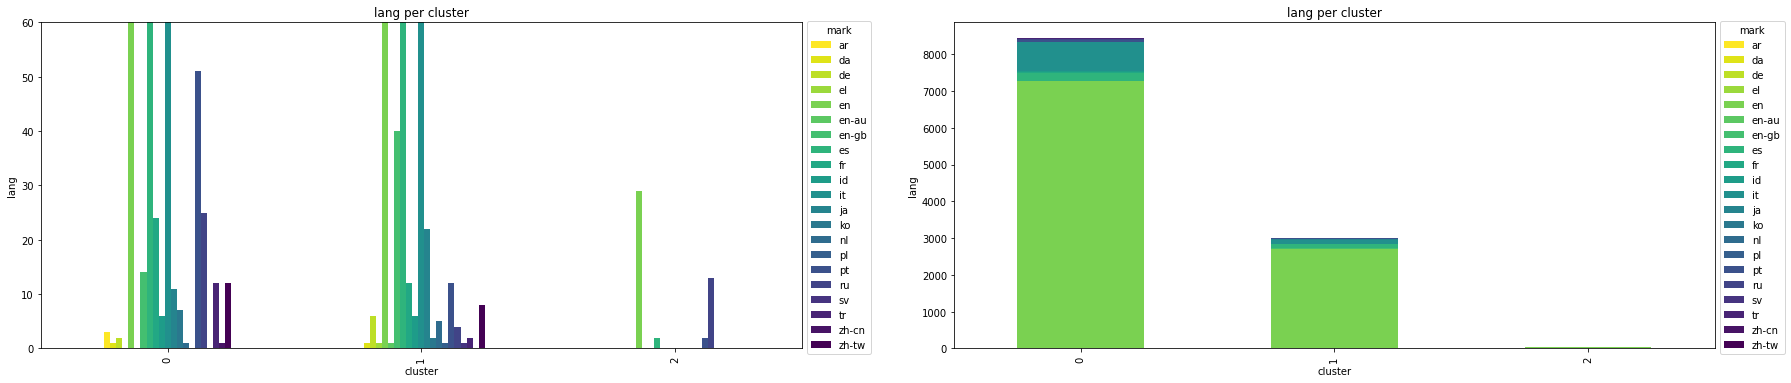

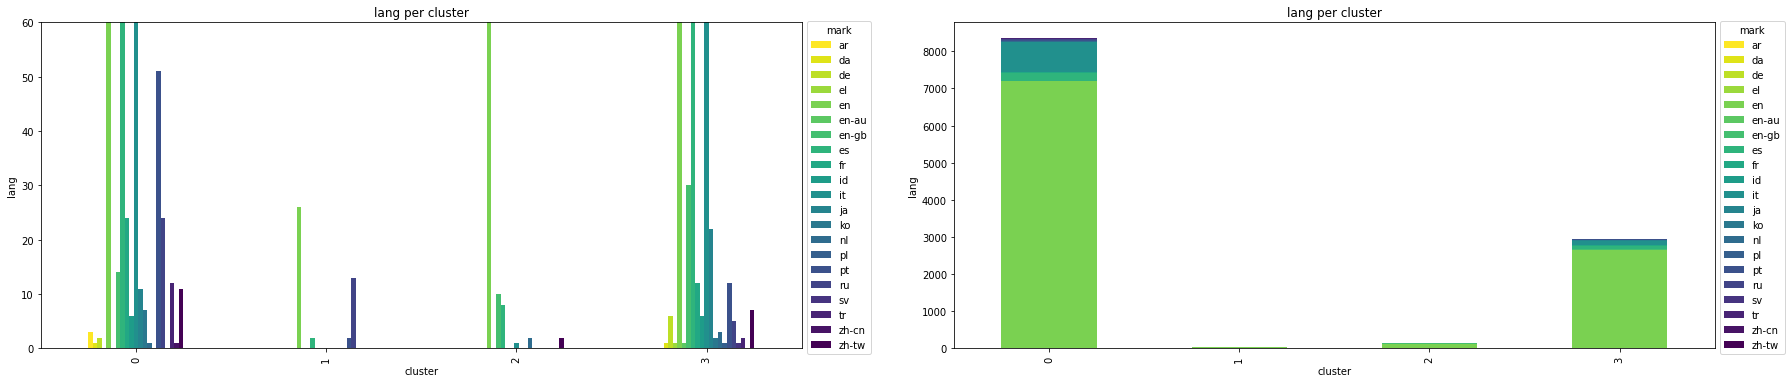

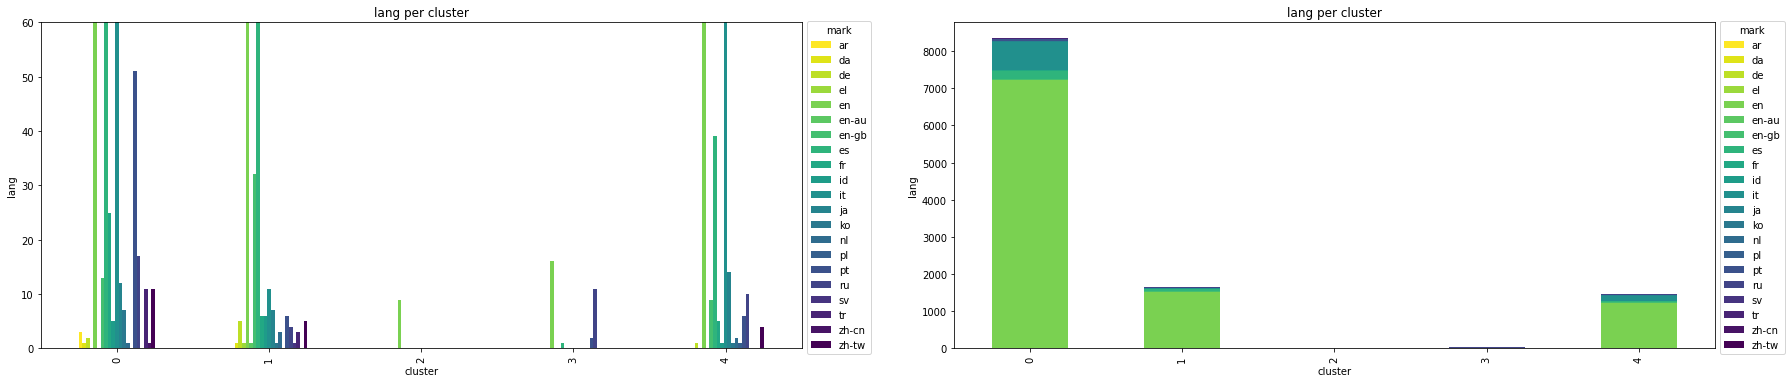

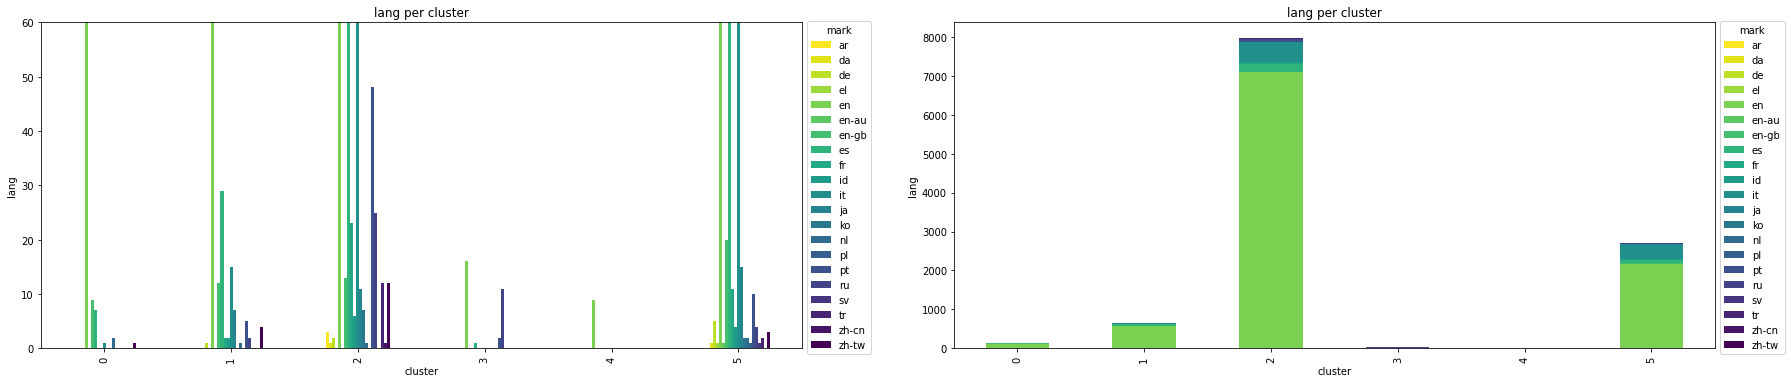

In [ ]:
for i in range(len(cluster_labels)):
  lang_ct = pd.crosstab(cluster_labels[i],users_profile_all['lang'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = lang_ct.plot(kind='bar', stacked=False, title='lang per cluster', ax=axs[0], colormap="viridis_r")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('lang')
  axs[0].set_ylim(0, 60) 

  ax2 = lang_ct.plot(kind='bar', stacked=True, title='lang per cluster', ax=axs[1], colormap="viridis_r")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('lang')

  plt.show()

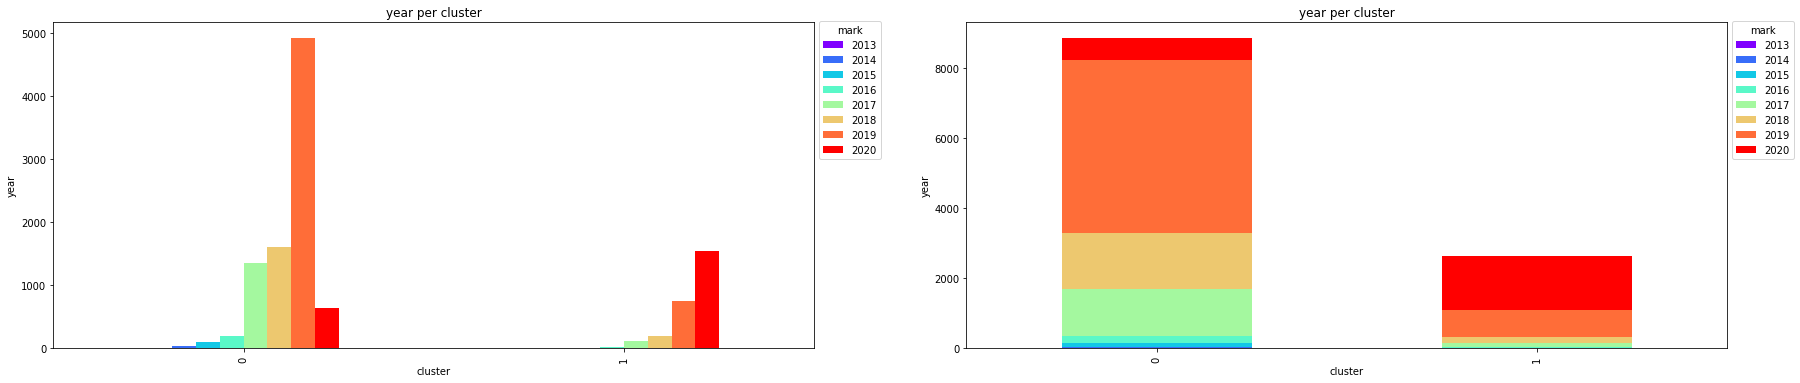

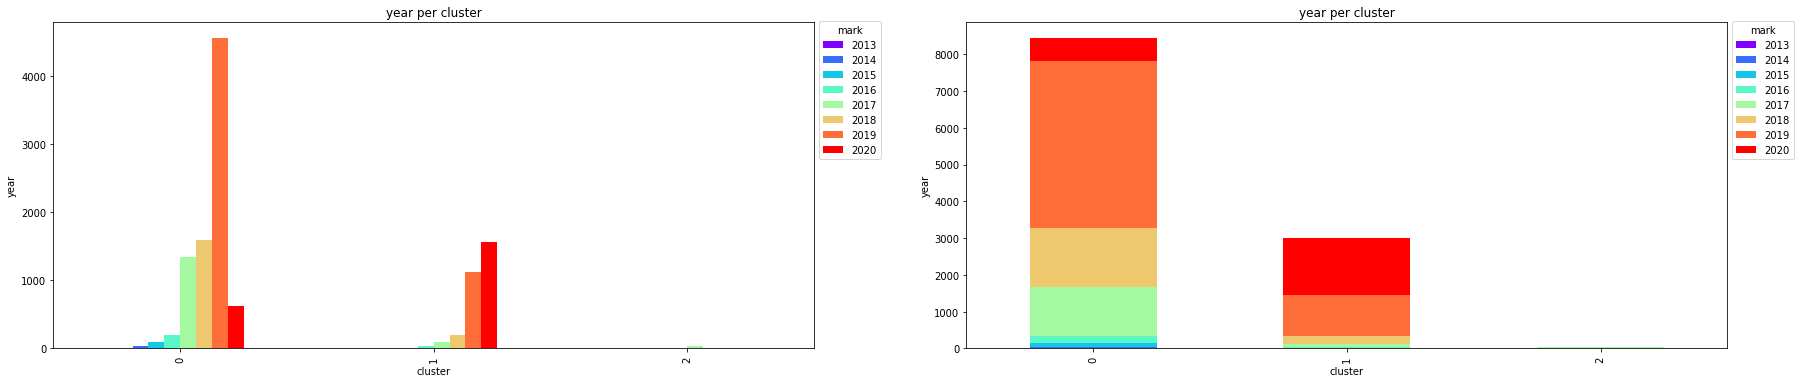

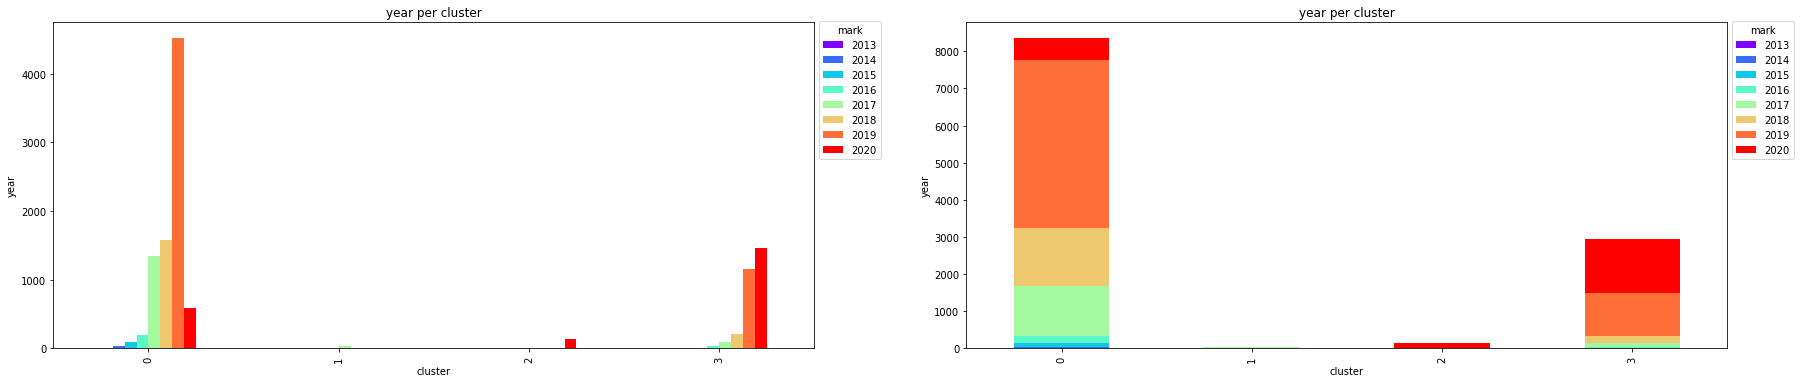

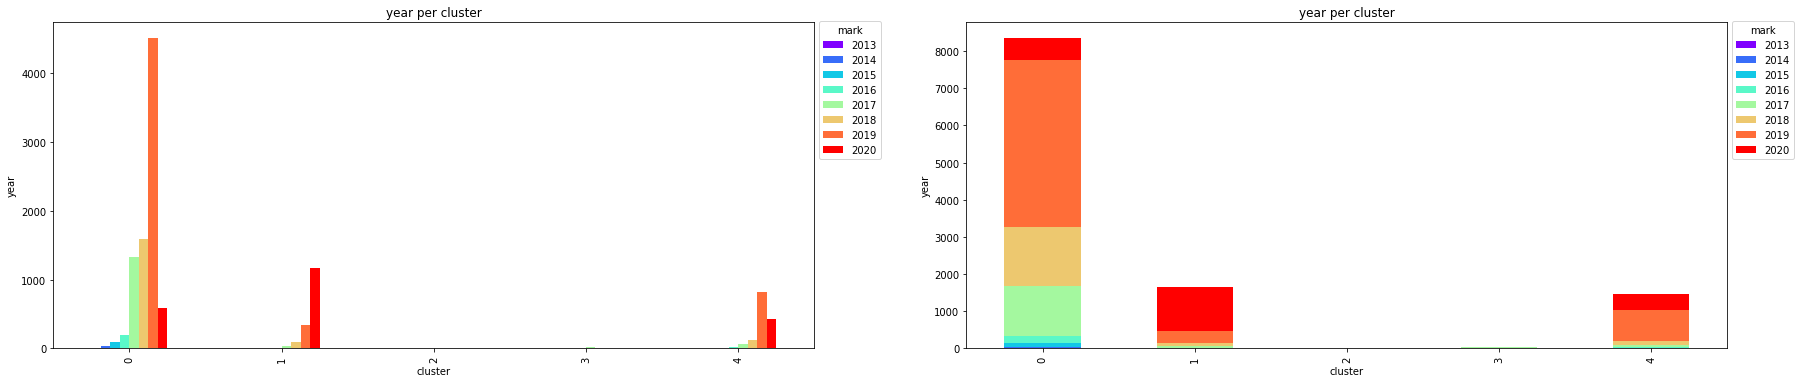

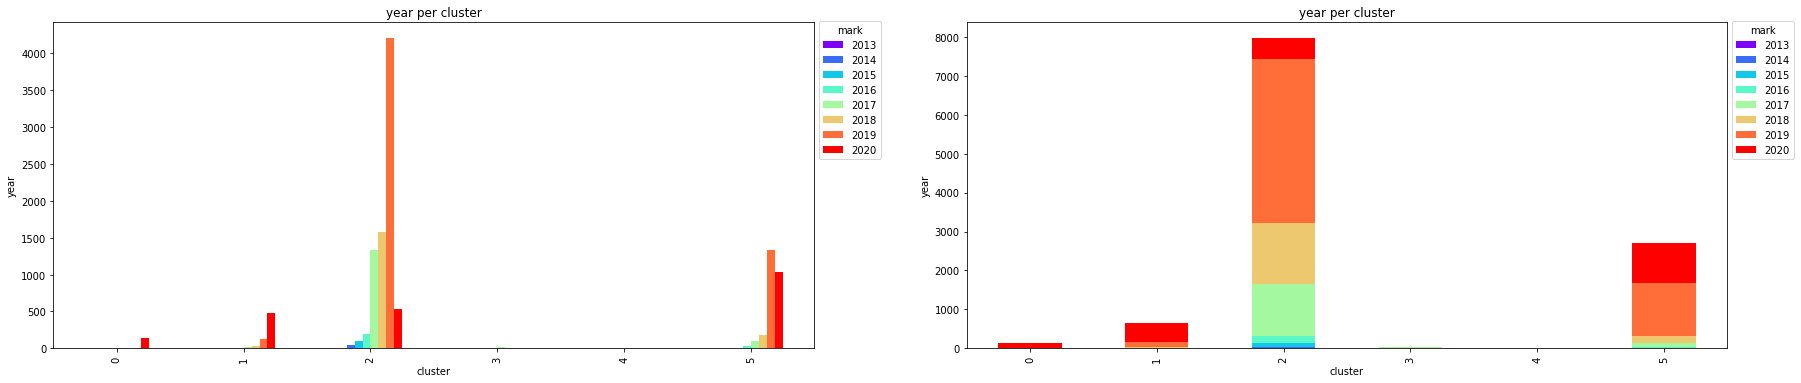

In [ ]:
for i in range(len(cluster_labels)):
  year_ct = pd.crosstab(cluster_labels[i],users_profile_all['most_freq_year'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = year_ct.plot(kind='bar', stacked=False, title='year per cluster', ax=axs[0], colormap="rainbow")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('year')

  ax2 = year_ct.plot(kind='bar', stacked=True, title='year per cluster', ax=axs[1], colormap="rainbow")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('year')

  plt.show()

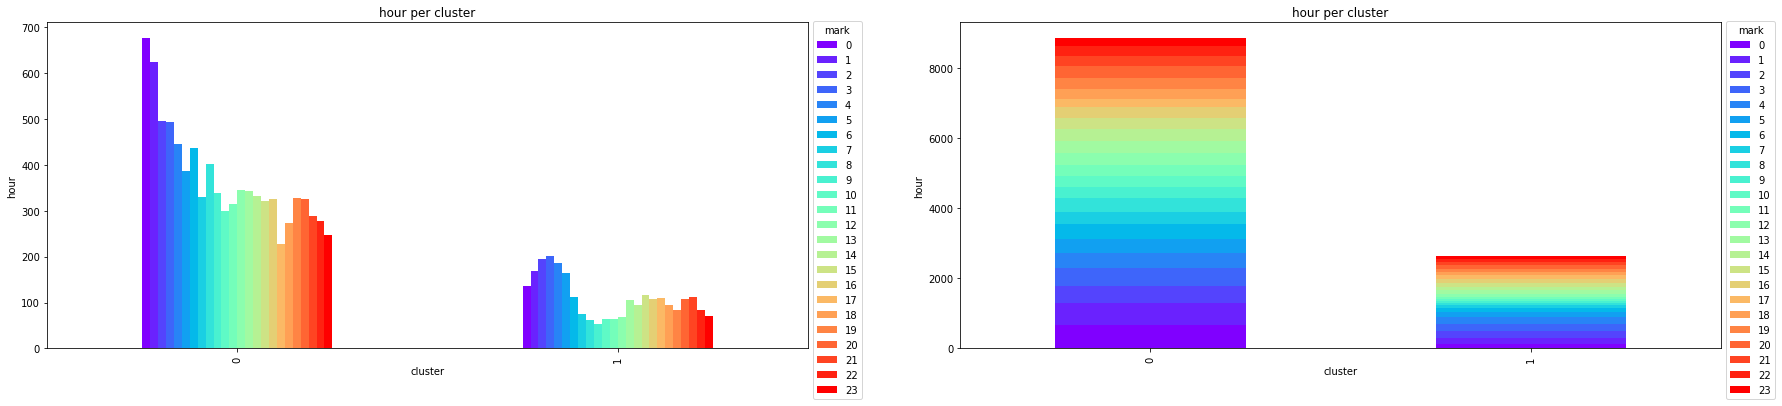

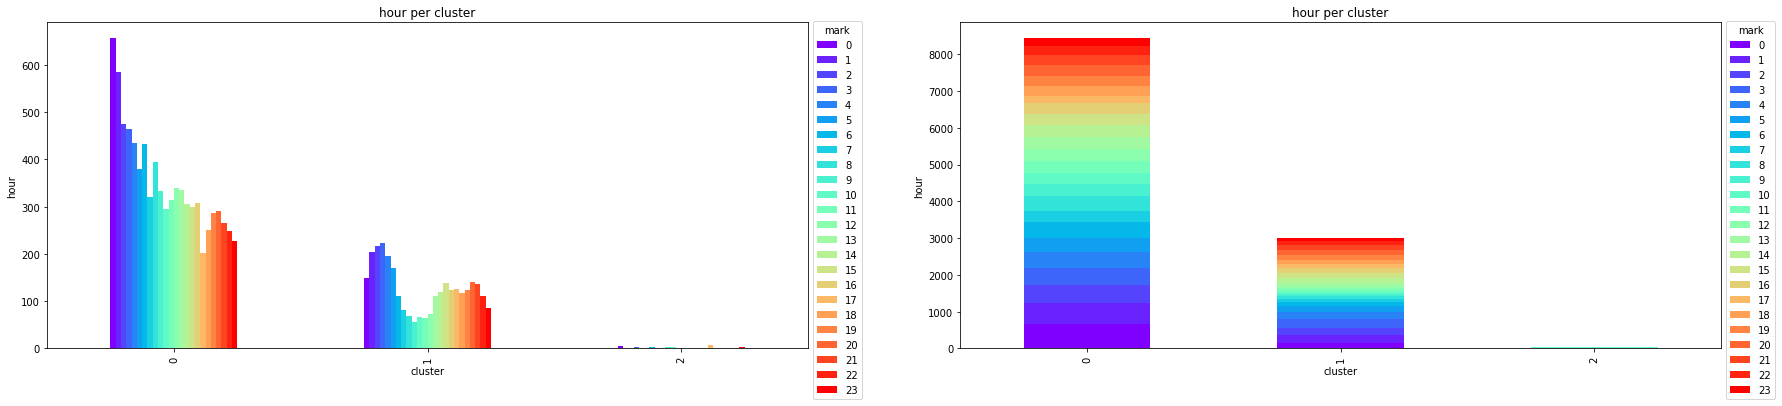

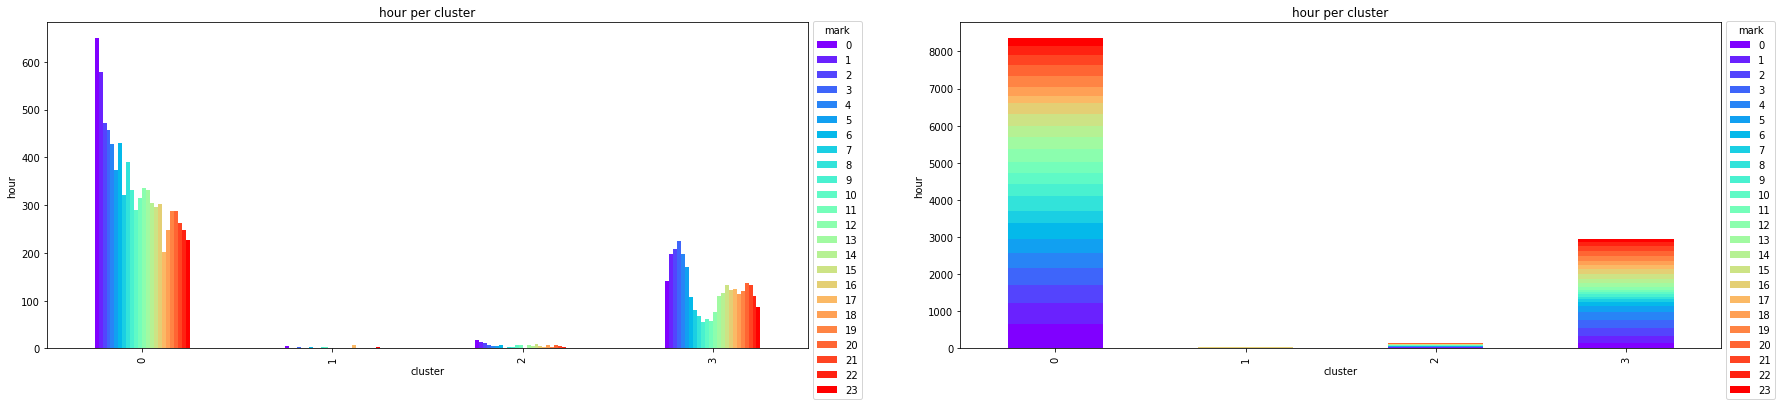

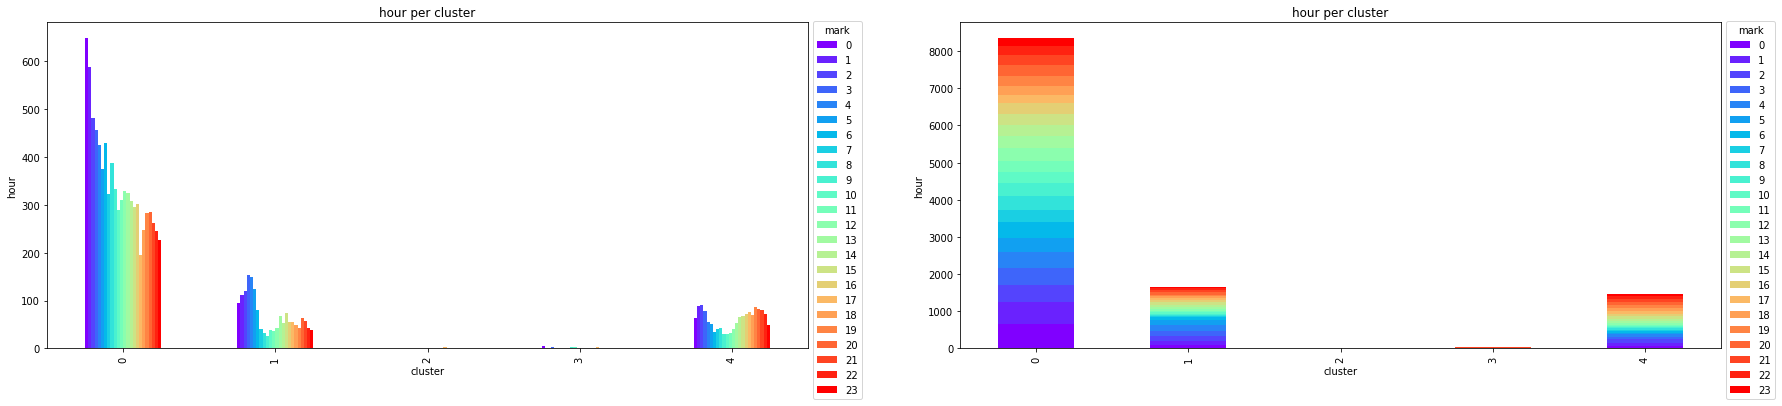

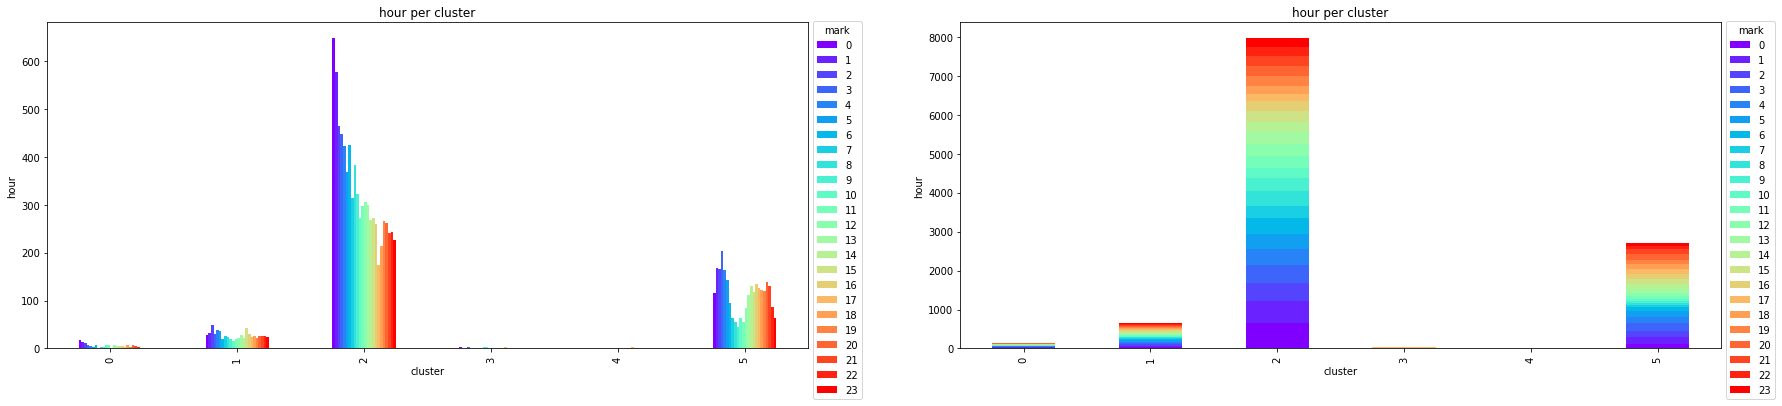

In [ ]:
for i in range(len(cluster_labels)):
  hour_ct = pd.crosstab(cluster_labels[i],users_profile_all['most_freq_hour'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = hour_ct.plot(kind='bar', stacked=False, title='hour per cluster', ax=axs[0], colormap="rainbow")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('hour')

  ax2 = hour_ct.plot(kind='bar', stacked=True, title='hour per cluster', ax=axs[1], colormap="rainbow")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('hour')

  plt.show()

## Clusters characterization with respect to numerical features

In [ ]:
cols = []
for i in range(len(cluster_labels)):
  s = 'label_K='+str(i+2)
  cols.append(s)

In [ ]:
for i in range(len(cluster_labels)):
  users_profile_all[cols[i]]=cluster_labels[i]

In [ ]:
users_profile_all.head()

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,url_entropy,men_entropy,avg_textlen,days_on_tw,activity_richness,label_K=2,label_K=3,label_K=4,label_K=5,label_K=6
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.0,0.0,1201.0,868.0,...,9.578214,10.607494,109.637321,3900,0.608718,1,1,3,4,1
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.0,0.0,969.0,766.0,...,0.000000,0.000000,85.026719,3893,0.519137,1,1,3,1,5
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.0,0.0,391.0,77.0,...,5.114369,6.387527,80.780317,3885,0.551866,1,1,3,1,5
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.0,0.0,209.0,488.0,...,0.000000,0.000000,84.281111,3884,0.519310,1,1,3,4,5
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.0,0.0,1714.0,185.0,...,8.222893,9.556485,95.166473,3870,0.887855,1,1,3,1,5


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).mean()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,,
0,928.509751,4.352142e+04,426.958742,45.962462,86.316988,96.596212,6449.949949,129.996055,475.505735,11.749959,105.877383,0.469866,1.394502,69.747467,1709.842408,0.255746
1,21169.238908,2.048015e+06,4135.276830,625.100493,506.724308,1883.141828,139299.955631,513.481229,5864.747317,30.946635,1097.442066,1.298203,7.616840,72.157507,2193.252560,1.364114


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,,
0,410.119806,5.199740e+04,356.289333,42.274299,23.000710,79.913105,8813.624956,100.498047,599.960797,10.231299,119.094230,0.462912,1.362667,69.057516,1681.406416,0.190304
1,20089.672968,1.723241e+06,1644.716086,559.904809,630.342620,1701.685904,113806.121725,404.083250,4265.472345,8.353793,616.903620,1.197189,6.930968,72.824232,2201.500166,1.409971
2,553.195652,3.302211e+06,146171.326087,237.369565,156.086957,372.630435,151681.347826,9565.804348,38158.306164,1613.688887,21026.948227,1.560904,1.063523,132.939889,2418.608696,0.159323


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,,
0,399.453252,4.515235e+04,352.619799,39.979436,21.192850,75.087637,7424.173960,97.608919,514.830208,10.222694,109.172303,0.443714,1.345749,68.957875,1678.457198,0.187541
1,260.093023,2.143542e+06,156131.395349,225.744186,158.953488,316.139535,129675.302326,10000.000000,34954.452717,1722.248716,20621.526254,1.583140,0.693062,136.569472,2459.255814,0.112790
2,25148.566667,1.963153e+07,1167.460000,719.080000,253.326667,2573.226667,485010.586667,332.620000,33105.355461,6.140876,6908.275770,1.126812,8.095378,66.682216,1743.646667,1.917033
3,19293.662148,8.038427e+05,1644.932226,543.600813,637.024399,1624.920027,96281.962725,410.352762,3018.863234,8.593602,337.888463,1.234571,6.762549,73.321125,2218.132159,1.357130


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,,
0,504.161522,3.351599e+04,311.760349,39.181024,18.154582,91.368988,5390.013400,58.795645,389.091195,8.807033,84.997027,0.444931,1.410126,68.774556,1687.874611,0.188895
1,22706.985472,3.101697e+06,1482.737288,395.541162,252.114407,2020.046005,201789.220339,239.023002,8128.093782,5.441787,1226.893402,0.997433,7.599233,62.801715,2061.418281,1.452328
2,898.444444,7.401423e+06,691678.555556,927.666667,666.444444,1408.333333,61312.111111,10000.000000,7630.527796,1899.558309,8213.838731,2.933720,1.141612,111.864264,2553.888889,0.418700
3,88.833333,1.018304e+06,12149.233333,25.733333,15.933333,23.200000,171453.166667,9334.233333,50785.047472,1721.951534,28574.600198,1.190722,0.698855,140.156033,2393.500000,0.024492
4,15300.630569,1.956157e+05,2088.771076,730.701165,1046.775188,1171.076765,27724.853324,857.394106,967.572821,23.637131,112.952282,1.482469,5.541627,85.833790,2292.056203,1.290857


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,,
0,23684.486111,2.007058e+07,1195.118056,707.909722,249.666667,2534.361111,488773.236111,345.805556,33210.266572,6.371861,6845.868108,1.110795,8.049422,66.289819,1743.152778,1.924223
1,44972.339450,9.304001e+05,2118.373089,1315.570336,905.305810,2978.218654,102516.336391,500.645260,2789.270576,9.120657,279.651740,1.924782,8.703687,82.921306,2379.562691,1.539035
2,372.272739,4.186141e+04,241.745703,36.890603,19.944173,72.322419,7177.816460,92.404592,512.287974,10.643338,108.857908,0.465659,1.050958,68.175369,1666.051813,0.152901
3,77.500000,7.877380e+05,12818.333333,26.066667,19.400000,21.633333,159836.400000,9666.700000,48252.648325,1753.895159,27692.737721,1.207267,0.436092,142.878918,2385.300000,0.024250
4,898.444444,7.401423e+06,691678.555556,927.666667,666.444444,1408.333333,61312.111111,10000.000000,7630.527796,1899.558309,8213.838731,2.933720,1.141612,111.864264,2553.888889,0.418700
5,10466.600000,6.904179e+05,1703.018889,292.820370,484.582593,1081.570741,83170.808519,375.358889,2769.402618,9.039544,330.400992,0.888292,6.371988,72.782907,2136.936296,1.244075


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).std()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,,
0,3529.510975,2.214968e+05,2202.906492,120.033801,326.230858,252.502299,23589.952886,902.100395,1812.403336,73.511678,556.193275,0.567862,2.224988,15.182355,462.730724,0.430720
1,30359.768593,5.954648e+06,41632.115371,876.869282,639.807521,1342.198114,162635.356285,1950.880828,9782.330123,221.037327,4171.653123,2.033930,4.505289,20.552797,656.951230,0.751378


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,,
0,2213.139809,2.901830e+05,1746.906361,112.956942,91.955951,200.066487,40326.358336,751.001625,2509.517670,59.065906,572.051226,0.597173,2.181779,14.888380,449.864710,0.308010
1,28625.321820,5.527326e+06,6177.914695,839.714652,702.533213,1362.362713,153809.491373,1664.924170,7464.292072,32.587564,1769.600233,1.900483,4.697548,18.674950,625.309876,0.708351
2,2017.641865,7.758567e+06,279908.012782,419.012297,287.664915,750.085398,93690.034451,2059.063904,24988.743624,773.541950,20047.340960,0.764351,2.864718,27.409709,382.492439,0.376991


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,,
0,2205.554496,2.560557e+05,1741.687110,107.003304,85.689465,189.881560,33368.177473,734.600376,1955.028768,59.189724,534.956407,0.499270,2.152946,14.785031,445.064422,0.305470
1,408.859786,2.963744e+06,287029.348335,406.579992,295.574820,620.571188,40595.372699,0.000000,21625.232009,675.010371,20552.102058,0.784535,2.248018,24.365448,310.334389,0.185546
2,27810.470922,1.634927e+07,2488.921352,777.480180,266.707680,1229.164621,48930.795993,1549.192380,13848.492722,25.861677,5856.836764,0.420599,4.629831,12.068479,521.404957,0.849298
3,28397.268813,1.207838e+06,6233.301596,832.773303,707.968073,1349.101382,133574.296566,1680.609366,4028.157683,33.417813,509.977738,1.981966,4.713197,18.976351,626.271522,0.701212


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,,
0,2707.903022,1.593638e+05,1405.414641,95.877257,61.104565,245.423318,19004.485597,397.883864,1189.012784,53.986772,355.785000,0.492984,2.258078,14.264524,457.840676,0.307513
1,29682.815007,7.299061e+06,3888.307858,495.374729,285.121228,1277.195343,173248.914514,1160.908798,9638.182401,26.149862,2458.395666,0.426863,4.596649,14.981014,633.986610,0.770400
2,521.143241,2.564940e+06,155603.564075,396.870256,291.824909,565.071456,6523.089901,0.000000,752.251154,425.573488,910.294529,0.110188,3.424835,2.638412,372.306475,0.209455
3,110.635806,1.254318e+06,5256.673110,29.058720,20.827590,34.919020,76993.156591,2533.658384,20524.154466,807.717831,21183.619443,0.325903,2.143934,29.560061,361.179080,0.022007
4,26425.292274,3.947932e+05,8346.805624,1067.818135,781.163882,1365.770989,51748.024490,2572.942871,2193.911980,89.489395,339.869949,2.772609,4.763353,17.512549,591.220519,0.659910


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,,
0,23387.319934,1.651744e+07,2534.772158,775.035175,266.737869,1172.785320,41449.631579,1579.971741,12293.955355,26.373084,5399.990175,0.408284,4.643591,12.083670,525.459896,0.848783
1,47866.874010,1.625009e+06,6230.220498,1379.252941,823.109750,1701.301523,136451.290192,1879.738396,3690.128355,31.266017,463.544676,3.294431,4.020536,20.414278,688.971743,0.709903
2,2162.711650,2.382892e+05,1138.562712,111.532052,89.452610,186.333638,33413.393432,715.892766,1995.376547,62.220720,539.505446,0.608755,1.718649,14.397362,446.922467,0.255815
3,72.663964,2.313044e+05,4929.372943,29.119176,32.004957,28.357914,45605.953769,1825.559284,19531.055155,754.535514,21689.160765,0.326844,1.661990,26.515747,354.072674,0.021279
4,521.143241,2.564940e+06,155603.564075,396.870256,291.824909,565.071456,6523.089901,0.000000,752.251154,425.573488,910.294529,0.110188,3.424835,2.638412,372.306475,0.209455
5,12436.617680,1.113793e+06,6249.619449,344.887522,627.576713,950.543617,127204.182364,1600.916239,4024.036895,42.938787,548.221388,1.141902,4.430538,17.970939,572.826346,0.671725


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).max()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,,
0,56379,5511833.0,105015.0,1284.0,3274.0,2347.0,299743.0,10000.0,42454.176934,1997.739832,18511.666667,10.440860,11.023326,245.0,3853,3.301066
1,200000,99360670.0,822127.0,16228.0,4335.0,13664.0,500000.0,10000.0,106034.982635,3722.299247,69042.400000,41.833333,11.821278,189.0,3900,4.148438


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,,
0,54834,6668982.0,105015.0,1262.0,1214.0,1605.0,500000.0,10000.0,53737.200674,1174.763061,18511.666667,10.440860,10.814439,245.000000,3853,2.120790
1,200000,99360670.0,221102.0,16228.0,4335.0,13664.0,500000.0,10000.0,63204.336440,364.686189,26717.125571,41.833333,11.821278,152.552135,3900,4.148438
2,13676,50844427.0,822127.0,1515.0,1052.0,3347.0,500000.0,10000.0,106034.982635,3722.299247,69042.400000,3.043548,11.237551,189.000000,3068,2.358178


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,,
0,54834,6668982.0,105015.0,1262.0,1214.0,1560.0,500000.0,10000.0,38056.049919,1174.763061,18511.666667,7.828358,10.814439,245.000000,3853,2.120790
1,1576,10474874.0,822127.0,1515.0,1052.0,2143.0,151542.0,10000.0,69510.395858,3722.299247,69042.400000,3.043548,10.274506,189.000000,3068,0.690593
2,200000,99360670.0,21783.0,4544.0,1536.0,6193.0,500000.0,10000.0,106034.982635,171.047654,36148.675676,2.331430,11.778388,93.661463,3202,3.986037
3,200000,9952394.0,221102.0,16228.0,4335.0,13664.0,500000.0,10000.0,26681.867113,364.686189,4392.119153,41.833333,11.821278,152.552135,3900,4.148438


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,,
0,56379,3066458.0,72374.0,1212.0,1046.0,2508.0,220384.0,10000.0,19757.275736,1174.763061,14481.000000,9.256637,11.164655,186.000000,3853,2.363158
1,200000,99360670.0,124427.0,4544.0,2223.0,13664.0,500000.0,10000.0,63204.336440,621.351370,26717.125571,4.011379,11.821278,141.096677,3893,4.105727
2,1576,10474874.0,822127.0,1515.0,1052.0,2143.0,69142.0,10000.0,9054.949051,2418.401650,9651.711290,3.043548,10.274506,116.341812,3068,0.690593
3,550,7547478.0,20759.0,134.0,78.0,174.0,500000.0,10000.0,106034.982635,3722.299247,69042.400000,1.858586,7.882873,189.000000,3015,0.091038
4,200000,3618110.0,221102.0,16228.0,4335.0,10293.0,500000.0,10000.0,24701.494459,1254.132950,5026.101695,41.833333,11.794194,245.000000,3900,4.148438


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,,
0,118750,99360670.0,21783.0,4544.0,1536.0,6193.0,500000.0,10000.0,95097.011295,171.047654,29482.488281,2.299462,11.778388,93.661463,3202,3.986037
1,200000,16054193.0,124427.0,16228.0,4335.0,13664.0,500000.0,10000.0,21406.174089,181.787179,4346.044126,41.833333,11.821278,140.946849,3900,4.101197
2,54834,6668982.0,32900.0,1982.0,1342.0,1586.0,500000.0,10000.0,38056.049919,1174.763061,18511.666667,10.440860,8.859852,245.000000,3853,2.107340
3,382,1337497.0,20759.0,134.0,152.0,127.0,401304.0,10000.0,106034.982635,3722.299247,69042.400000,1.858586,6.880525,189.000000,3015,0.083788
4,1576,10474874.0,822127.0,1515.0,1052.0,2143.0,69142.0,10000.0,9054.949051,2418.401650,9651.711290,3.043548,10.274506,116.341812,3068,0.690593
5,123707,9952394.0,221102.0,2379.0,3274.0,4597.0,500000.0,10000.0,27812.430155,1254.132950,6978.148148,29.676471,11.806861,186.094595,3893,4.148438


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).min()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,,
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.000000,890,0.000319
1,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002976,0.0,21.107632,896,0.004533


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,,
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,21.107632,896,0.010676
2,24,158698.0,4.0,1.0,2.0,5.0,24410.0,1.0,4622.883067,0.310517,2558.037736,0.273973,0.0,67.371429,1247,0.004533


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,,
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
1,24,158698.0,10003.0,1.0,2.0,5.0,24410.0,10000.0,4622.883067,749.485712,2558.037736,0.273973,0.0,67.371429,1990,0.004533
2,37,500001.0,1.0,4.0,0.0,18.0,149915.0,1.0,10340.858200,0.088165,1408.493308,0.211538,0.0,42.470361,931,0.029671
3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,21.107632,896,0.010676


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,,
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.003473,0.005892,0.0,25.117843,908,0.001242
2,24,4822308.0,371197.0,540.0,363.0,750.0,46559.0,10000.0,6900.525770,997.037438,6873.451838,2.712182,0.0,108.440111,2069,0.216816
3,28,158698.0,4.0,1.0,2.0,5.0,151492.0,1.0,21627.413578,0.310517,3515.125000,0.273973,0.0,67.371429,1247,0.004533
4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,21.107632,896,0.001241


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,,
0,44,500001.0,1.0,4.0,0.0,18.0,149915.0,1.0,13845.635586,0.088165,1408.493308,0.211538,0.0,42.470361,931,0.055198
1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.160913,0.0,25.779891,919,0.014070
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
3,28,158698.0,4.0,1.0,2.0,5.0,151492.0,1.0,19125.036889,0.310517,3026.613953,0.273973,0.0,67.371429,1247,0.004533
4,24,4822308.0,371197.0,540.0,363.0,750.0,46559.0,10000.0,6900.525770,997.037438,6873.451838,2.712182,0.0,108.440111,2069,0.216816
5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,21.107632,896,0.010071


# gmeans

In [ ]:
input_data = list(X)

gmeans_instance2 = gmeans(input_data, k_max=2).process()
clusters2 = gmeans_instance2.get_clusters() 
# Change cluster representation from default to labeling.
encoder2 = cluster_encoder(type_encoding.CLUSTER_INDEX_LIST_SEPARATION, clusters2, input_data)
encoder2.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
labels2 = encoder2.get_clusters()

gmeans_instance3 = gmeans(input_data, k_max=3).process()
clusters3 = gmeans_instance3.get_clusters() 
encoder3 = cluster_encoder(type_encoding.CLUSTER_INDEX_LIST_SEPARATION, clusters3, input_data)
encoder3.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
labels3 = encoder3.get_clusters()

gmeans_instance4 = gmeans(input_data, k_max=4).process()
clusters4 = gmeans_instance4.get_clusters() 
encoder4 = cluster_encoder(type_encoding.CLUSTER_INDEX_LIST_SEPARATION, clusters4, input_data)
encoder4.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
labels4 = encoder4.get_clusters()

gmeans_instance5 = gmeans(input_data, k_max=5).process()
clusters5 = gmeans_instance5.get_clusters() 
encoder5 = cluster_encoder(type_encoding.CLUSTER_INDEX_LIST_SEPARATION, clusters5, input_data)
encoder5.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
labels5 = encoder5.get_clusters()

gmeans_instance6 = gmeans(input_data, k_max=6).process()
clusters6 = gmeans_instance6.get_clusters() 
encoder6 = cluster_encoder(type_encoding.CLUSTER_INDEX_LIST_SEPARATION, clusters6, input_data)
encoder6.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
labels6 = encoder6.get_clusters()

In [ ]:
print(labels2)   # Display labels

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# Prepare cluster labels
cluster_labels = []

cluster_labels2 = np.zeros([11508], dtype=int)    # 0,1
for x in np.nditer(np.asarray(clusters2[1])):
   cluster_labels2[x] = 1
cluster_labels.append(cluster_labels2)

cluster_labels3 = np.zeros([11508], dtype=int)    # 0,1,2
for x in np.nditer(np.asarray(clusters3[1])):
   cluster_labels3[x] = 1
for x in np.nditer(np.asarray(clusters3[2])):
   cluster_labels3[x] = 2
cluster_labels.append(cluster_labels3)

cluster_labels4 = np.zeros([11508], dtype=int)    # 0,1,2,3
for x in np.nditer(np.asarray(clusters4[1])):
   cluster_labels4[x] = 1
for x in np.nditer(np.asarray(clusters4[2])):
   cluster_labels4[x] = 2
for x in np.nditer(np.asarray(clusters4[3])):
   cluster_labels4[x] = 3
cluster_labels.append(cluster_labels4)

cluster_labels5 = np.zeros([11508], dtype=int)    # 0,1,2,3,4
for x in np.nditer(np.asarray(clusters5[1])):
   cluster_labels5[x] = 1
for x in np.nditer(np.asarray(clusters5[2])):
   cluster_labels5[x] = 2
for x in np.nditer(np.asarray(clusters5[3])):
   cluster_labels5[x] = 3
for x in np.nditer(np.asarray(clusters5[4])):
   cluster_labels5[x] = 4
cluster_labels.append(cluster_labels5)

cluster_labels6 = np.zeros([11508], dtype=int)    # 0,1,2,3,4,5
for x in np.nditer(np.asarray(clusters6[1])):
   cluster_labels6[x] = 1
for x in np.nditer(np.asarray(clusters6[2])):
   cluster_labels6[x] = 2
for x in np.nditer(np.asarray(clusters6[3])):
   cluster_labels6[x] = 3
for x in np.nditer(np.asarray(clusters6[4])):
   cluster_labels6[x] = 4
for x in np.nditer(np.asarray(clusters6[5])):
   cluster_labels6[x] = 5
cluster_labels.append(cluster_labels6)



## Clusters characterization with respect to categorical features

In [ ]:
users_profile_all = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile.csv', lineterminator='\n')

In [ ]:
users_profile_all.head()

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,hour_entropy,favcount_entropy,retcount_entropy,repcount_entropy,has_entropy,url_entropy,men_entropy,avg_textlen,days_on_tw,activity_richness
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.0,0.0,1201.0,868.0,...,0.0,8.831943,6.080426,0.0,9.183814,9.578214,10.607494,109.637321,3900,0.608718
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.0,0.0,969.0,766.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,85.026719,3893,0.519137
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.0,0.0,391.0,77.0,...,0.0,3.921117,2.375534,0.0,4.836434,5.114369,6.387527,80.780317,3885,0.551866
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.0,0.0,209.0,488.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,84.281111,3884,0.519310
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.0,0.0,1714.0,185.0,...,0.0,8.277790,2.354578,0.0,8.421512,8.222893,9.556485,95.166473,3870,0.887855


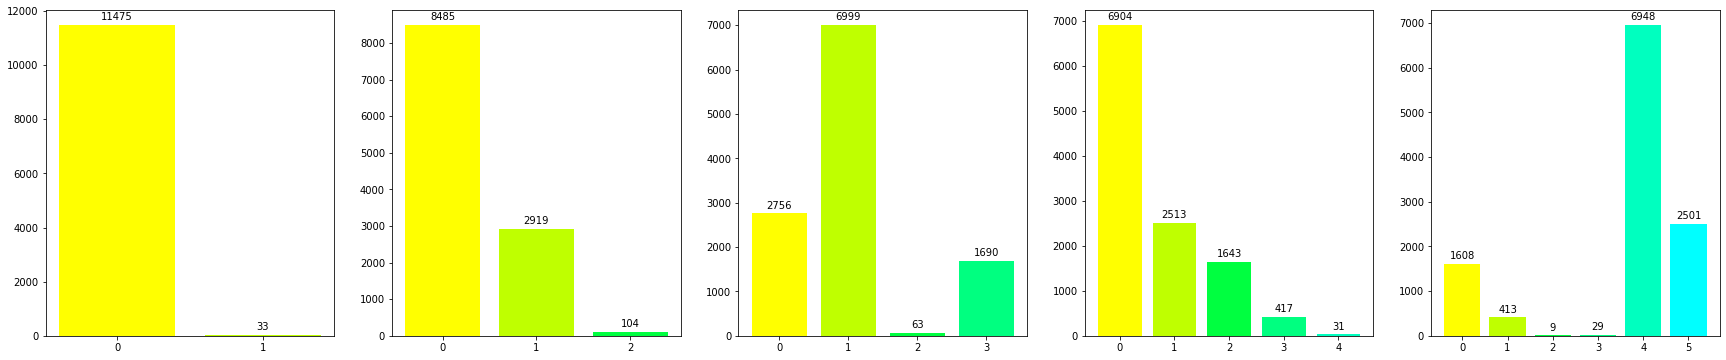

In [ ]:
fig, ax = plt.subplots(ncols=len(cluster_labels), figsize=(30,6))
for i in range(len(cluster_labels)):
  hist, bins = np.histogram(cluster_labels[i], bins=range(0, len(set(cluster_labels[i])) + 1))
  #plt.stairs(hist, bins)
  clusters = ax[i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[i].bar_label(clusters, padding=3)
plt.show()

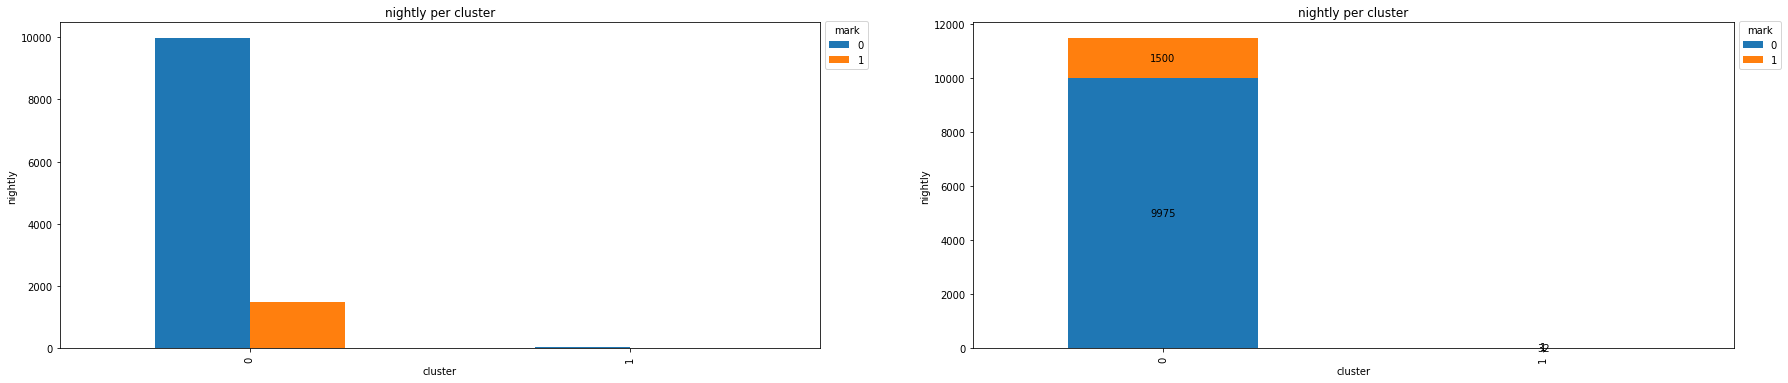

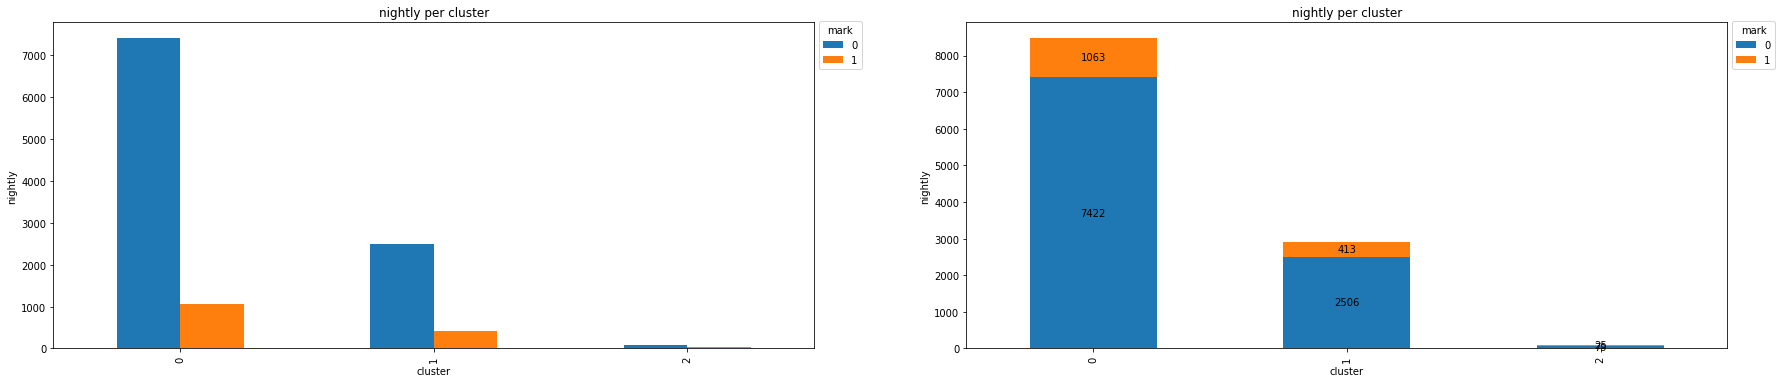

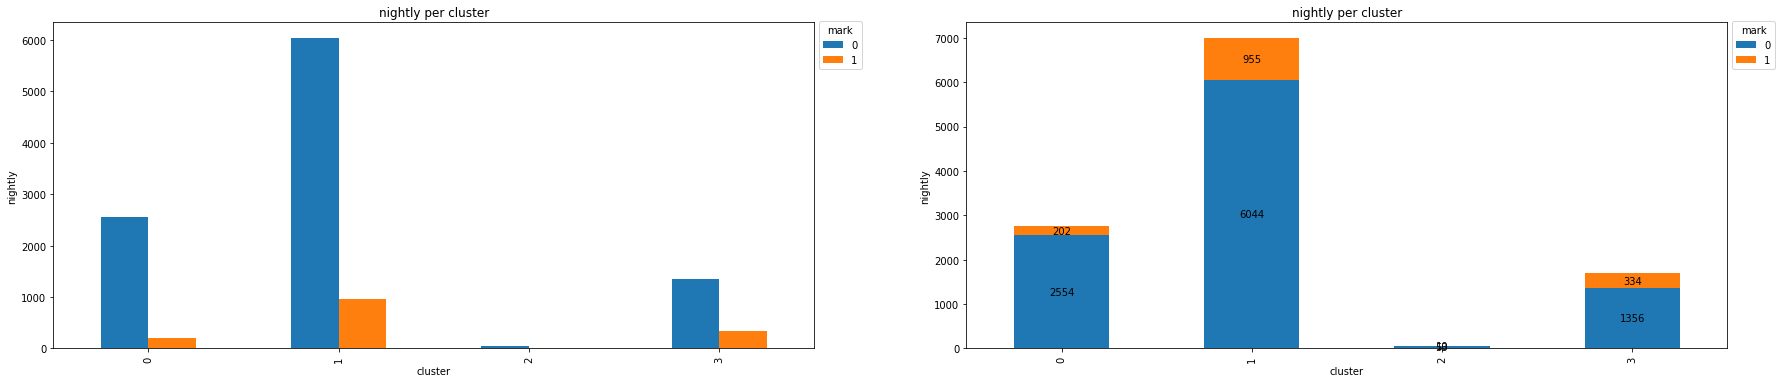

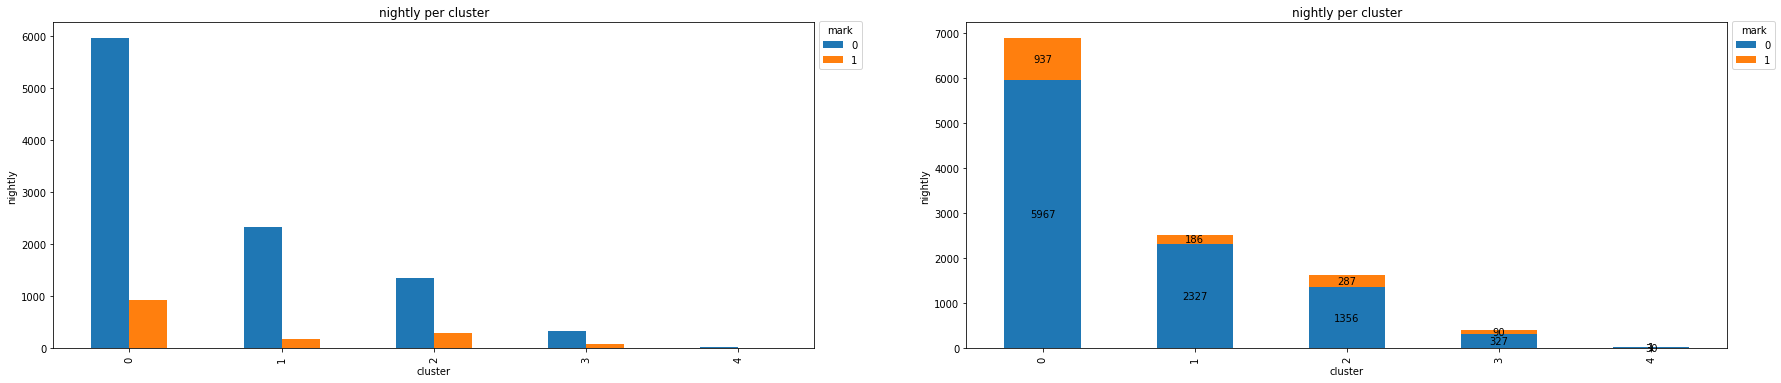

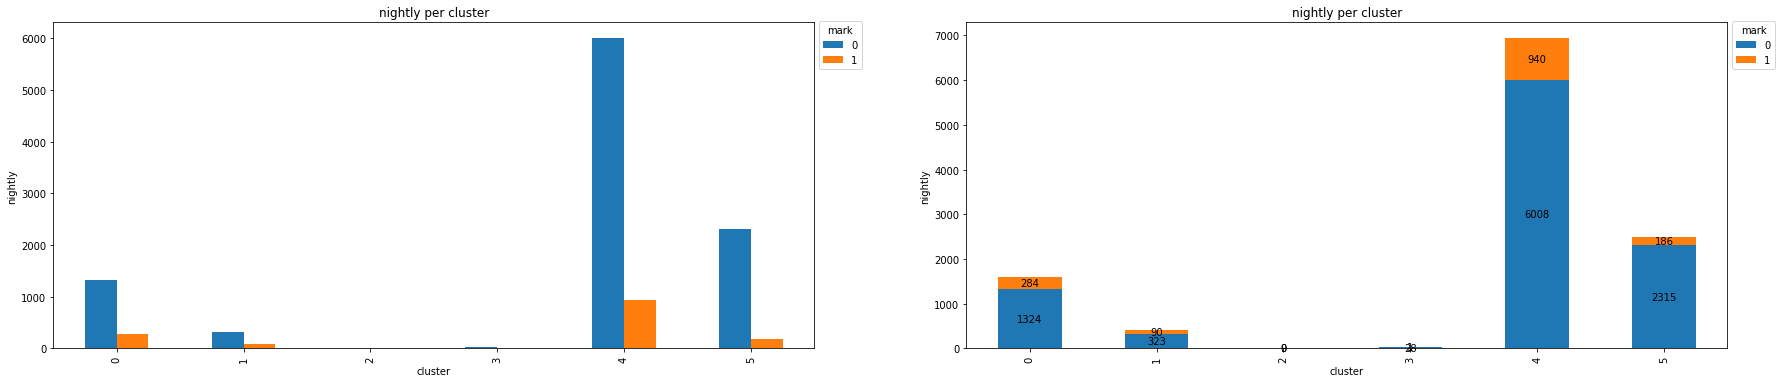

In [ ]:
for i in range(len(cluster_labels)):
  nightly_ct = pd.crosstab(cluster_labels[i],users_profile_all['nightly'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = nightly_ct.plot(kind='bar', stacked=False, title='nightly per cluster', ax=axs[0])
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('nightly')

  ax2 = nightly_ct.plot(kind='bar', stacked=True, title='nightly per cluster', ax=axs[1])
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  # add counts
  for c in ax2.containers:
      # set the bar label
      ax2.bar_label(c, label_type='center')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('nightly')

  plt.show()

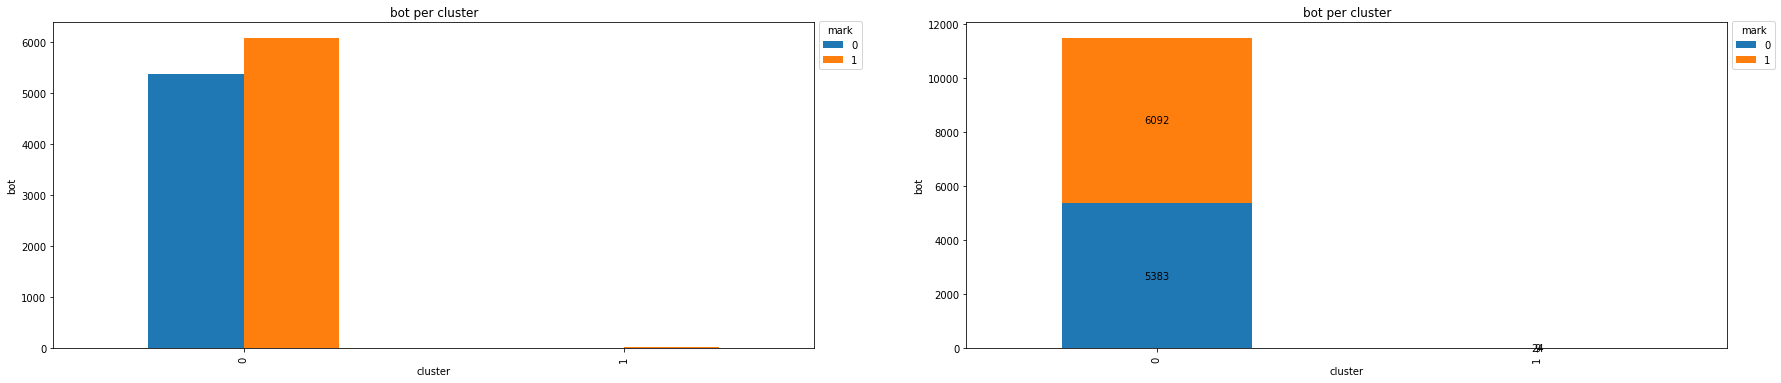

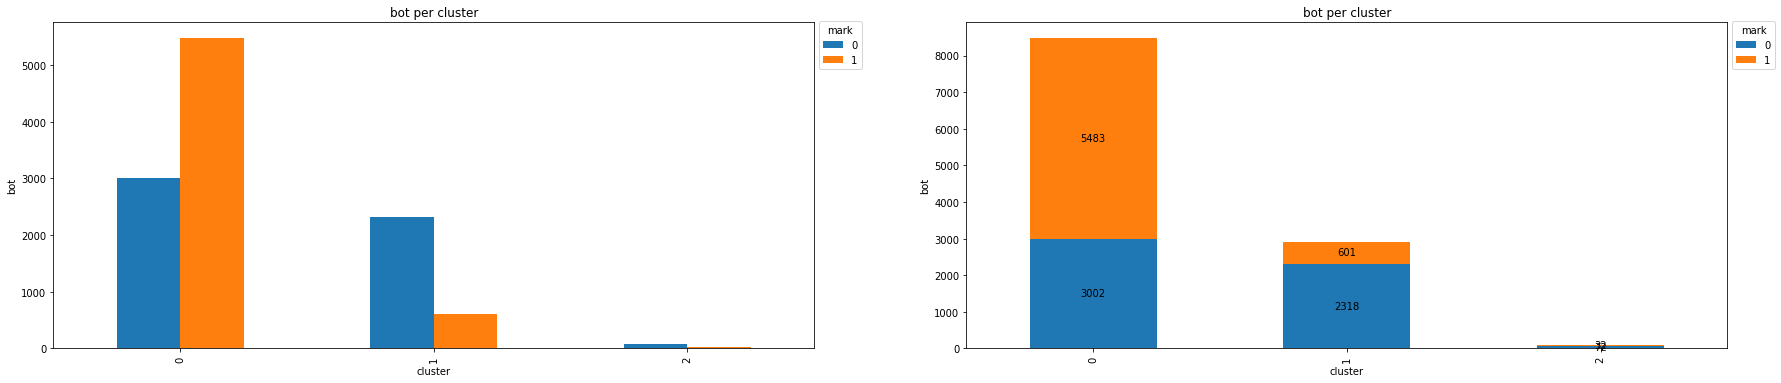

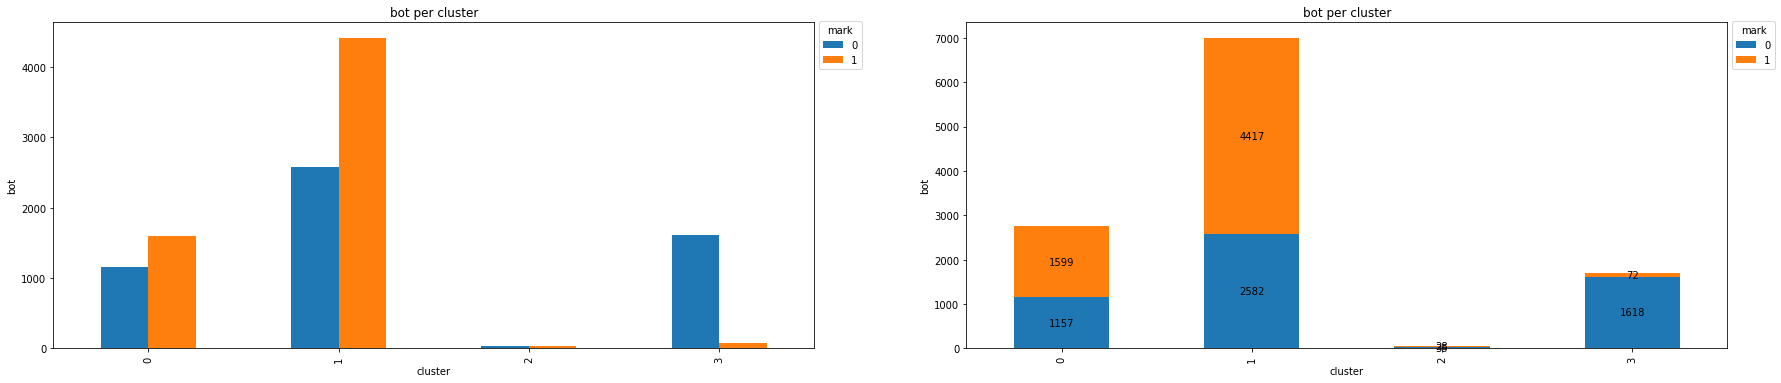

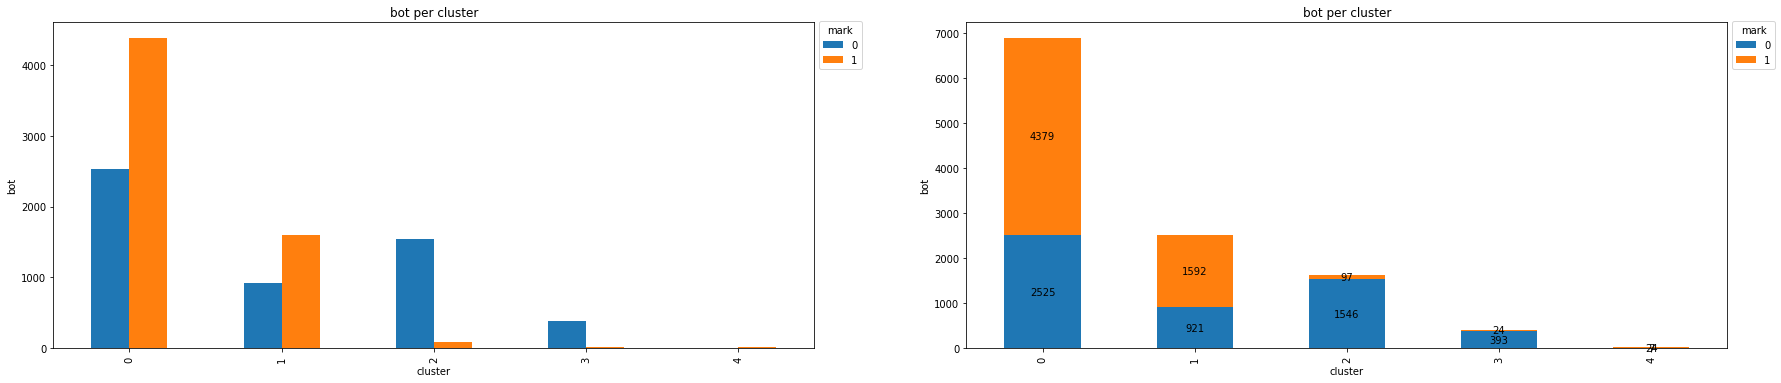

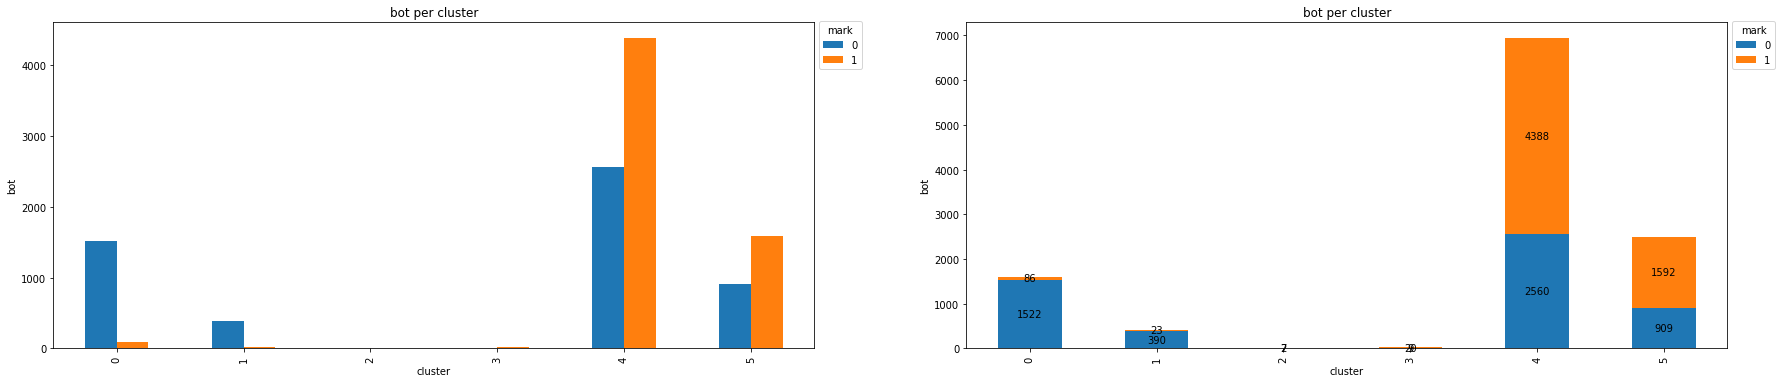

In [ ]:
for i in range(len(cluster_labels)):
  bot_ct = pd.crosstab(cluster_labels[i],users_profile_all['bot'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = bot_ct.plot(kind='bar', stacked=False, title='bot per cluster', ax=axs[0])
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('bot')

  ax2 = bot_ct.plot(kind='bar', stacked=True, title='bot per cluster', ax=axs[1])
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  # add counts
  for c in ax2.containers:
      # set the bar label
      ax2.bar_label(c, label_type='center')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('bot')

  plt.show()

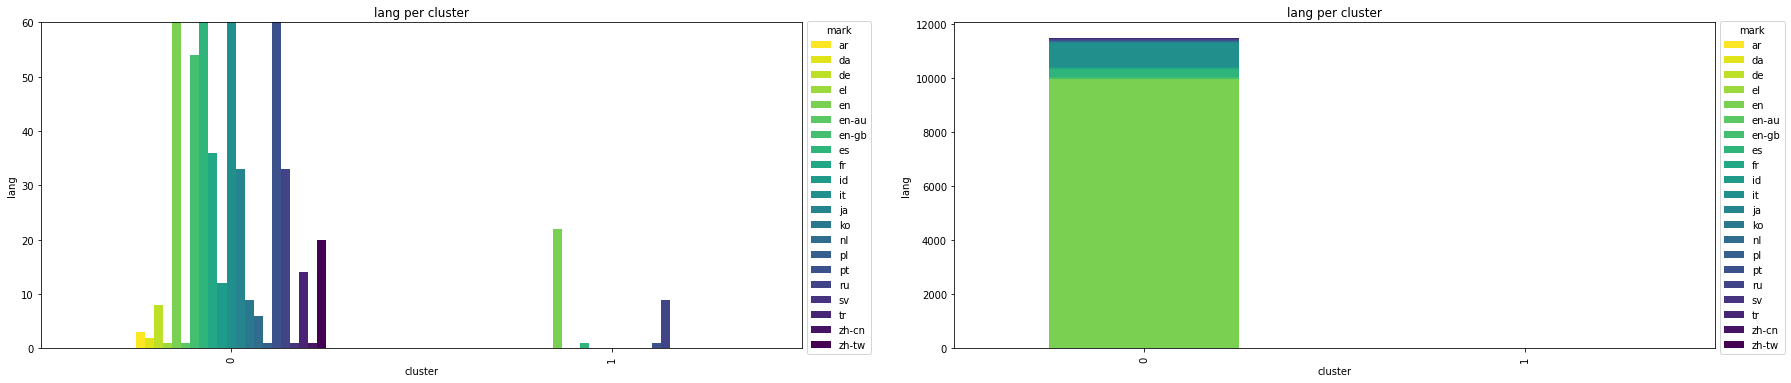

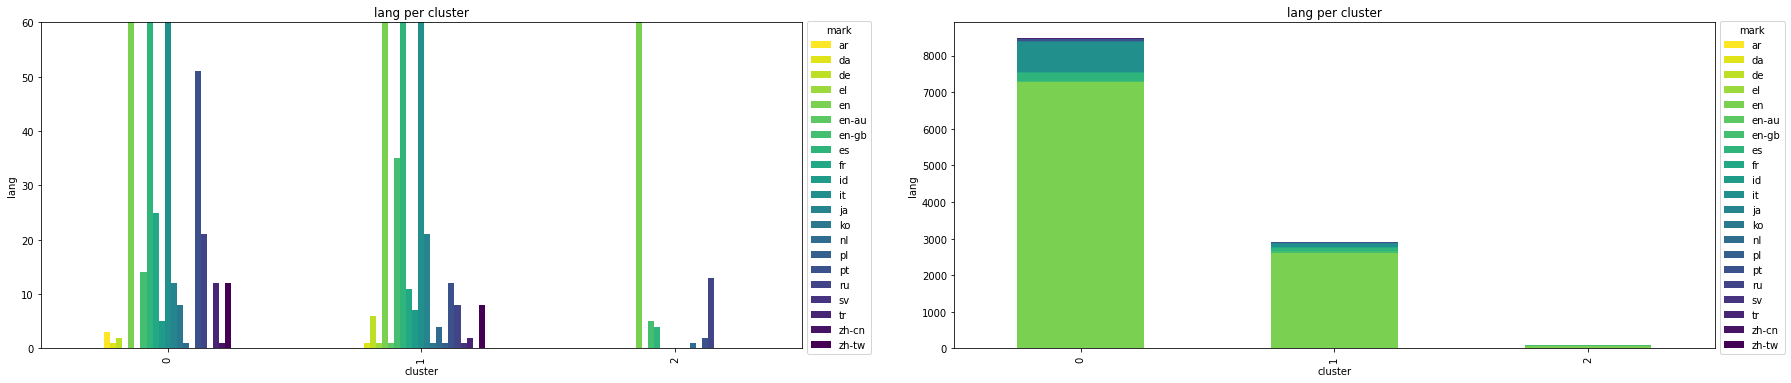

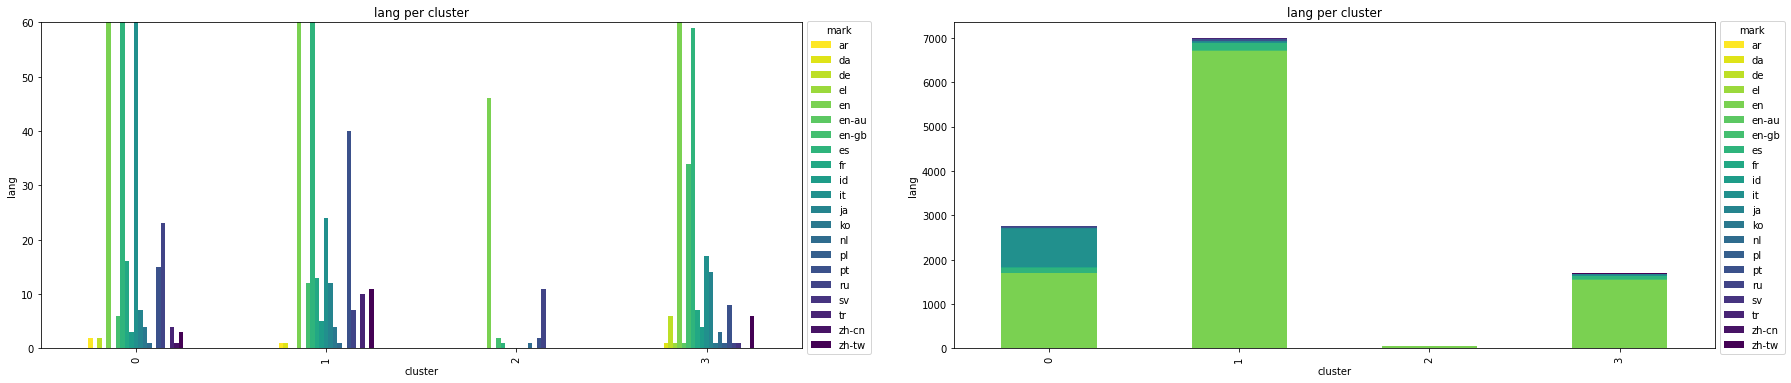

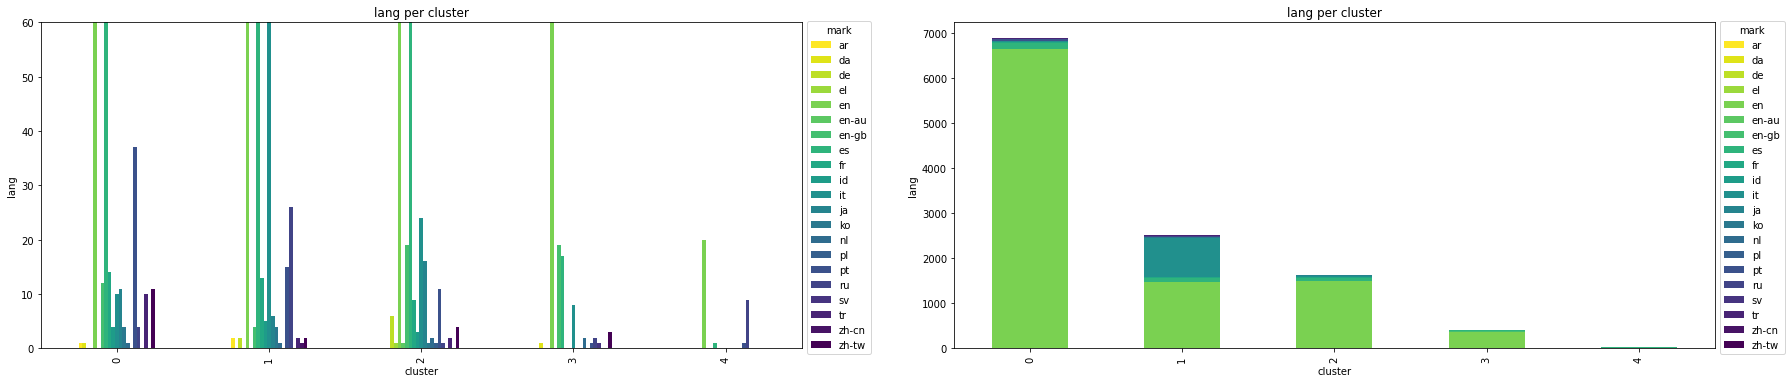

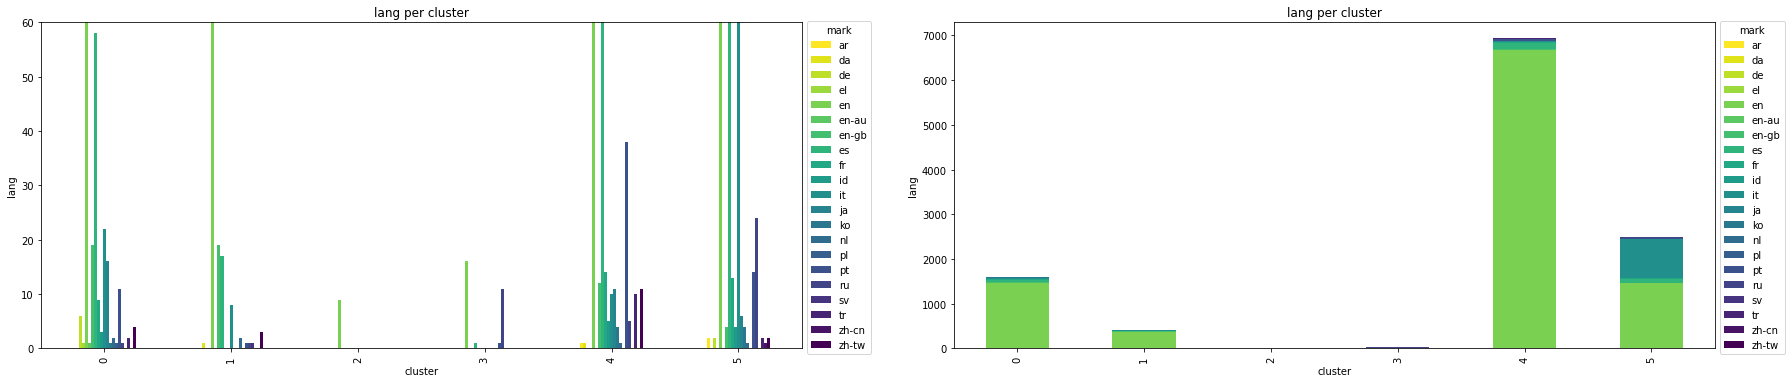

In [ ]:
for i in range(len(cluster_labels)):
  lang_ct = pd.crosstab(cluster_labels[i],users_profile_all['lang'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = lang_ct.plot(kind='bar', stacked=False, title='lang per cluster', ax=axs[0], colormap="viridis_r")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('lang')
  axs[0].set_ylim(0, 60) 

  ax2 = lang_ct.plot(kind='bar', stacked=True, title='lang per cluster', ax=axs[1], colormap="viridis_r")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('lang')

  plt.show()

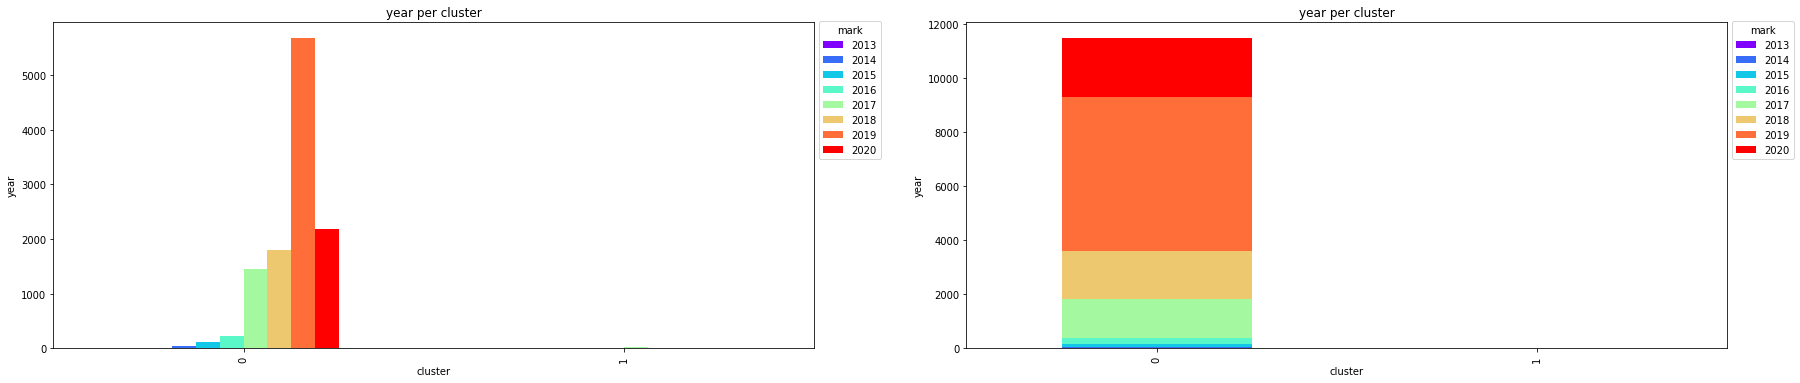

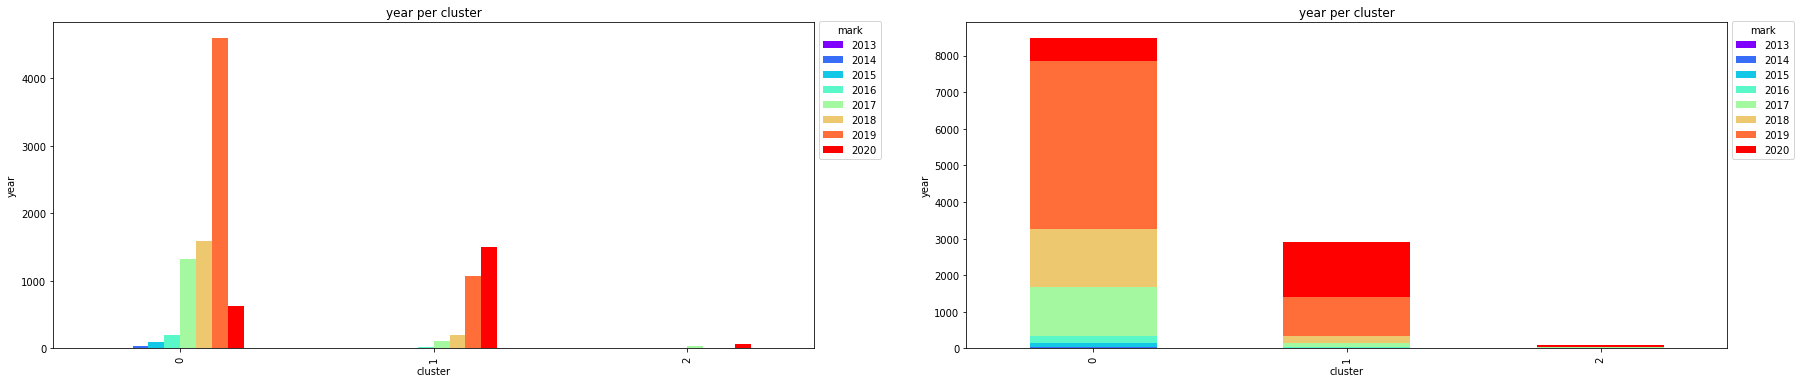

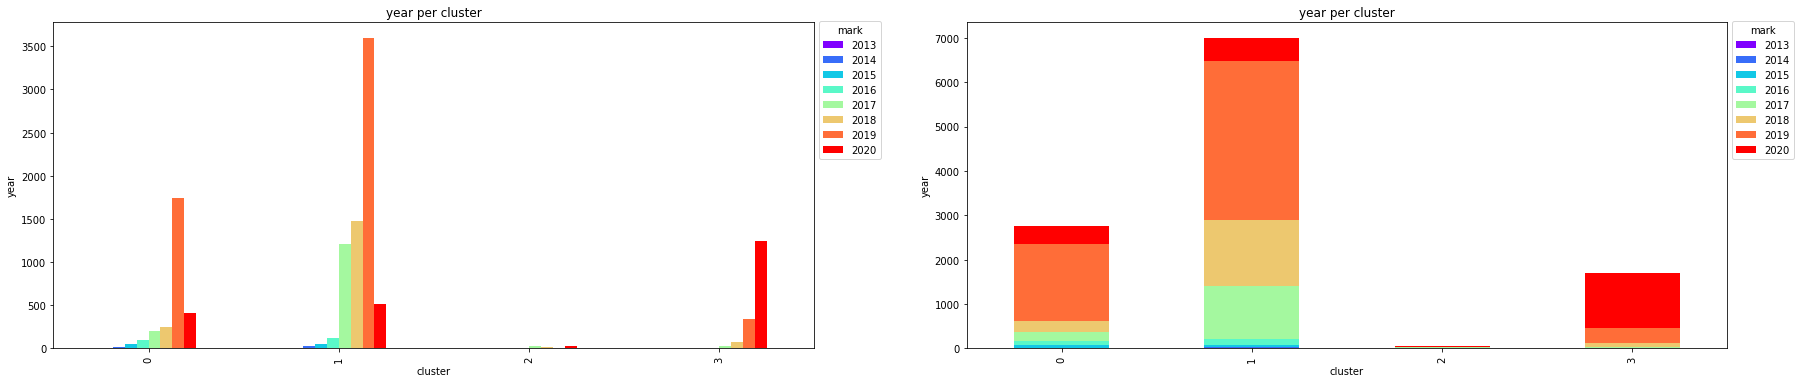

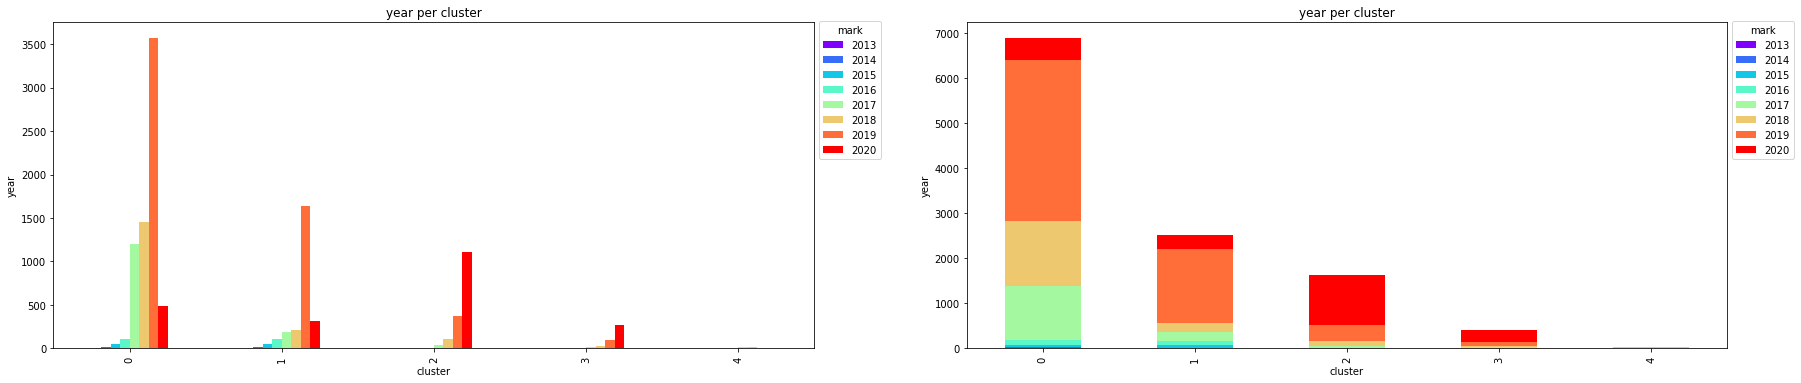

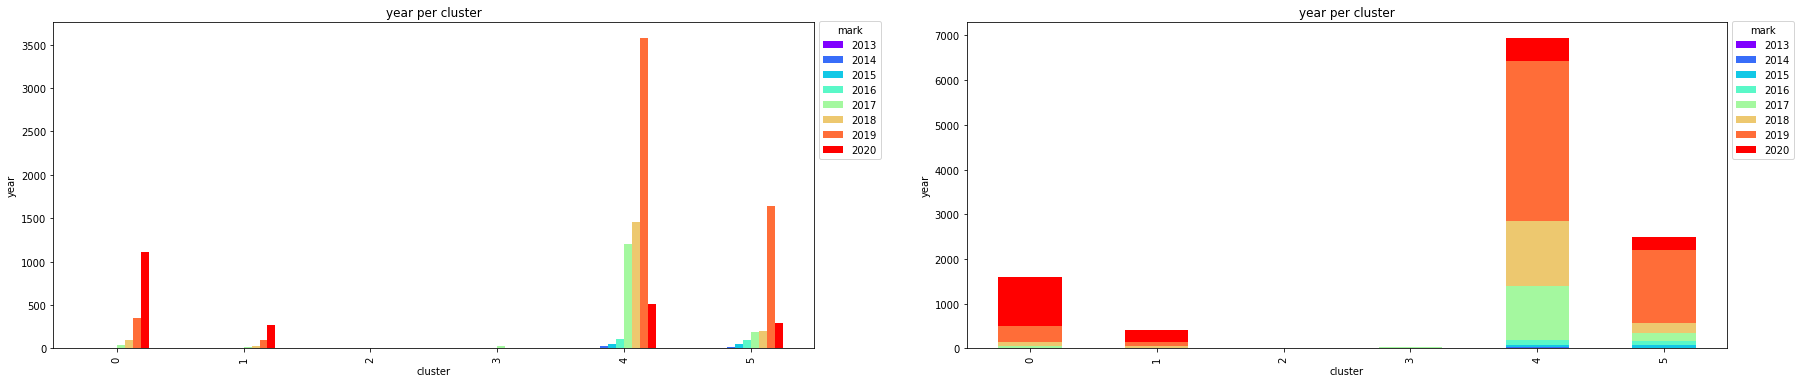

In [ ]:
for i in range(len(cluster_labels)):
  year_ct = pd.crosstab(cluster_labels[i],users_profile_all['most_freq_year'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = year_ct.plot(kind='bar', stacked=False, title='year per cluster', ax=axs[0], colormap="rainbow")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('year')

  ax2 = year_ct.plot(kind='bar', stacked=True, title='year per cluster', ax=axs[1], colormap="rainbow")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('year')

  plt.show()

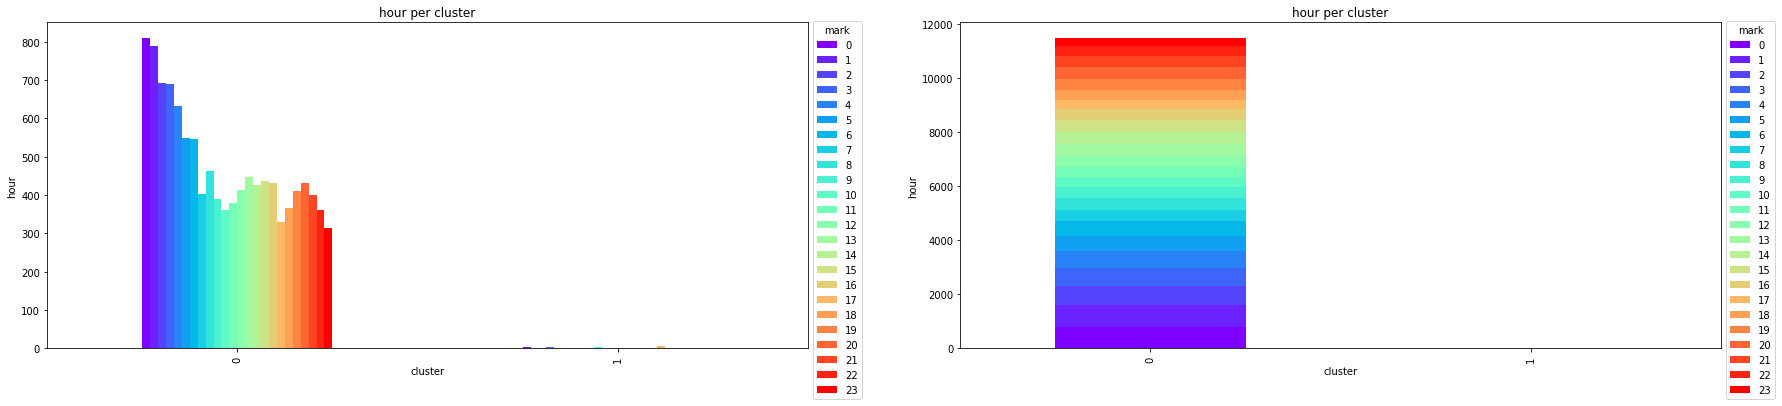

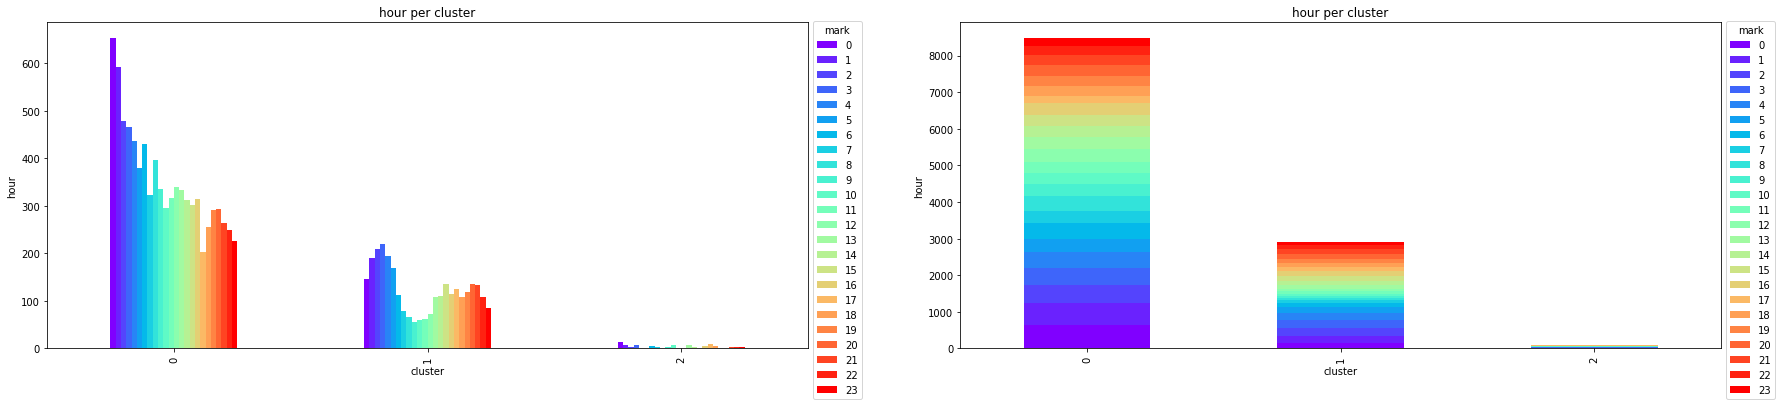

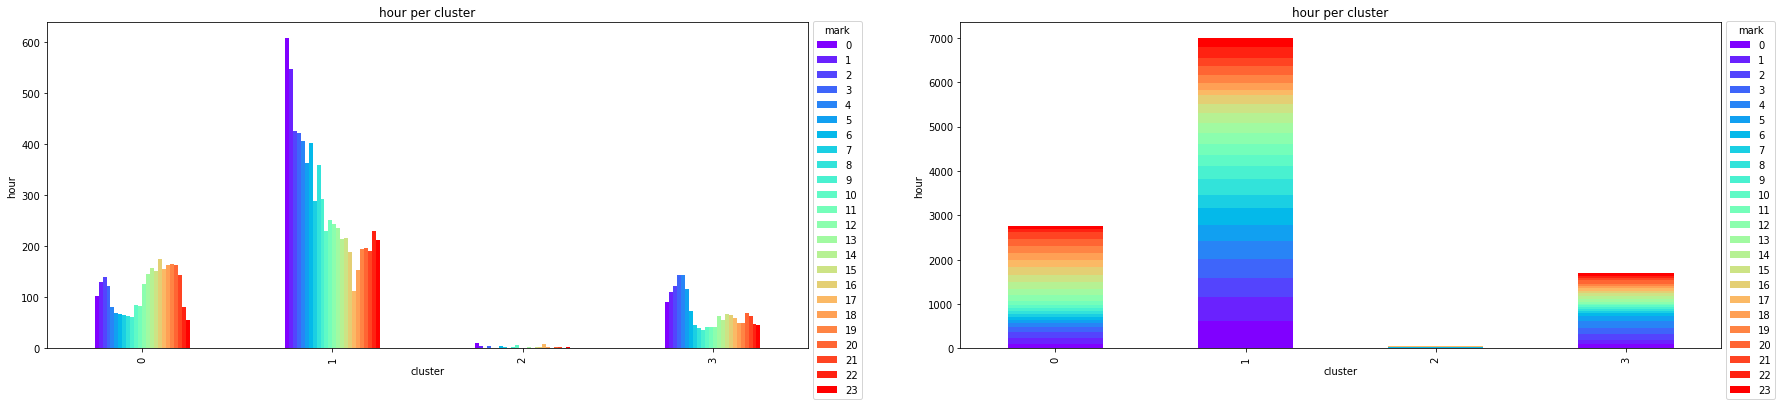

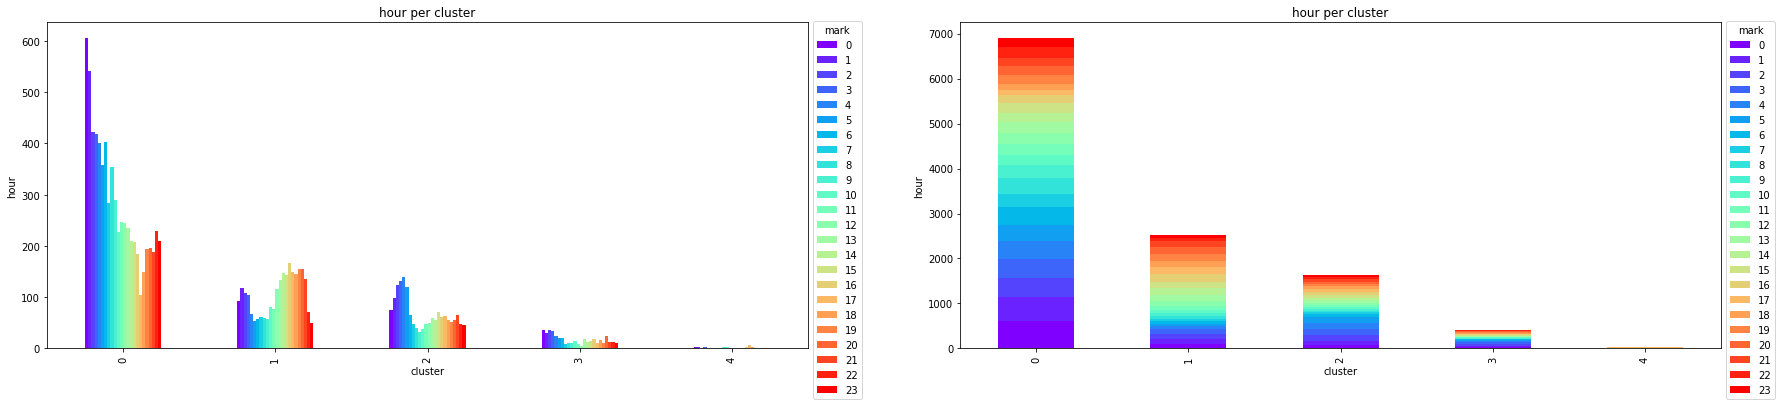

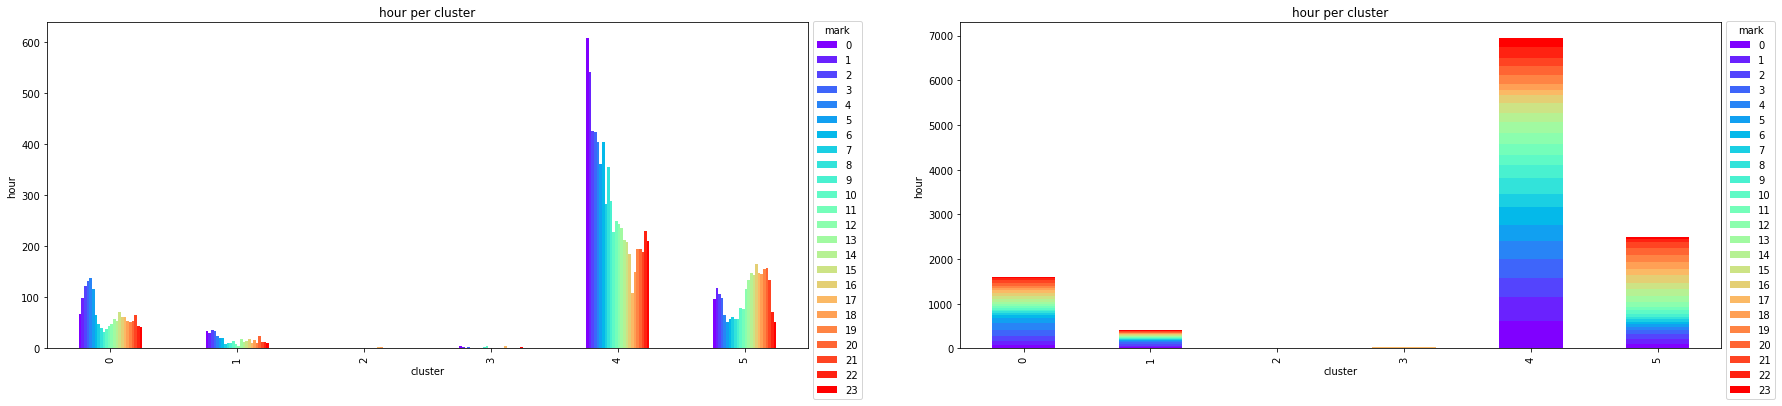

In [ ]:
for i in range(len(cluster_labels)):
  hour_ct = pd.crosstab(cluster_labels[i],users_profile_all['most_freq_hour'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = hour_ct.plot(kind='bar', stacked=False, title='hour per cluster', ax=axs[0], colormap="rainbow")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('hour')

  ax2 = hour_ct.plot(kind='bar', stacked=True, title='hour per cluster', ax=axs[1], colormap="rainbow")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('hour')

  plt.show()

## Clusters characterization with respect to numerical features

In [ ]:
cols = []
for i in range(len(cluster_labels)):
  s = 'label_K='+str(i+2)
  cols.append(s)

In [ ]:
for i in range(len(cluster_labels)):
  users_profile_all[cols[i]]=cluster_labels[i]

In [ ]:
users_profile_all.head()

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,url_entropy,men_entropy,avg_textlen,days_on_tw,activity_richness,label_K=2,label_K=3,label_K=4,label_K=5,label_K=6
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.0,0.0,1201.0,868.0,...,9.578214,10.607494,109.637321,3900,0.608718,0,1,3,2,0
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.0,0.0,969.0,766.0,...,0.000000,0.000000,85.026719,3893,0.519137,0,1,3,1,5
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.0,0.0,391.0,77.0,...,5.114369,6.387527,80.780317,3885,0.551866,0,1,0,2,0
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.0,0.0,209.0,488.0,...,0.000000,0.000000,84.281111,3884,0.519310,0,1,0,1,5
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.0,0.0,1714.0,185.0,...,8.222893,9.556485,95.166473,3870,0.887855,0,1,0,2,0


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).mean()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,,
0,5581.725490,4.962267e+05,713.796601,178.417081,182.626754,506.285664,36580.845229,191.478693,1591.158165,10.754361,256.507775,0.656742,2.826308,70.122848,1818.842614,0.510821
1,296.757576,2.802853e+06,197013.939394,266.272727,191.151515,397.636364,145039.090909,9394.757576,43182.124467,1891.935146,26962.614353,1.679794,0.738170,131.801613,2436.363636,0.127724


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,,
0,433.834885,4.090293e+04,342.523748,42.868002,25.857631,87.543430,6032.828049,86.695463,439.389480,9.657785,99.988525,0.468640,1.421218,69.031661,1683.346258,0.195968
1,20194.707434,1.148466e+06,1705.861254,561.087359,636.411100,1679.425488,115687.471394,444.360740,4033.868768,9.953165,474.776588,1.190392,6.807601,72.974748,2210.284344,1.399578
2,13756.278846,2.006983e+07,65447.625000,524.750000,239.076923,1708.663462,342992.442308,4562.932692,40196.801754,719.620819,15374.206681,1.349797,5.055939,98.674993,2082.750000,1.132022


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,,
0,4922.435051,1.253729e+05,1518.571843,274.636430,477.317852,472.177068,19899.336720,376.974238,930.395676,14.446073,138.798402,0.810078,3.619626,86.277721,2286.646226,0.863197
1,366.537505,4.304043e+04,128.759537,18.113873,8.048578,72.212745,5728.021717,50.608373,431.884280,8.899561,99.063953,0.430358,1.245063,64.390343,1570.417774,0.112991
2,7781.555556,1.967086e+07,104884.222222,456.714286,199.730159,1217.222222,277578.777778,6049.317460,44255.172582,1094.471399,20919.092421,1.454099,3.511581,111.739782,2171.714286,0.753910
3,28069.957396,2.308085e+06,1774.081657,676.729586,424.584024,2330.963314,184692.917160,433.721302,6691.447113,8.749735,851.723765,1.334488,8.014868,67.171662,2083.698225,1.567221


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,,
0,360.178158,4.273467e+04,122.166136,17.186848,7.914977,70.214803,5751.207271,49.345017,413.923583,8.749527,93.221751,0.425915,1.244357,64.173784,1564.584009,0.108975
1,3867.025468,1.256175e+05,1472.065261,216.787505,433.544369,342.165937,19990.230402,360.210903,995.561468,16.581316,156.817257,0.744117,2.712395,87.496834,2245.940310,0.820472
2,26964.735240,9.371705e+05,1899.902009,689.930006,499.643944,2237.460743,83470.003652,487.530128,2658.902700,10.096362,350.682533,1.382661,8.753735,68.984764,2190.195374,1.484823
3,18089.501199,8.519420e+06,1262.793765,600.438849,313.275779,1892.215827,464229.023981,360.539568,20938.897873,11.377320,3345.807541,1.094087,6.355122,68.430882,1992.448441,1.458085
4,296.967742,2.697070e+06,209723.129032,281.935484,201.838710,416.838710,125322.129032,10000.000000,39479.939144,2013.932692,26585.003538,1.713326,0.531508,135.359269,2462.612903,0.132070


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,,
0,27367.289801,9.591919e+05,1923.469527,691.425373,487.950249,2266.919776,84683.528607,496.440299,2699.765604,10.273210,358.379991,1.390129,8.741572,68.803293,2183.624378,1.494062
1,18262.646489,8.575629e+06,1199.031477,606.075061,315.970944,1909.995157,465809.108959,315.539952,20504.062254,6.309024,3179.545551,1.096051,6.380926,68.159585,1990.694915,1.471653
2,898.444444,7.401423e+06,691678.555556,927.666667,666.444444,1408.333333,61312.111111,10000.000000,7630.527796,1899.558309,8213.838731,2.933720,1.141612,111.864264,2553.888889,0.418700
3,86.413793,1.026288e+06,11994.034483,22.000000,15.931034,22.206897,172139.758621,9311.275862,51666.570685,1752.015773,29373.949291,1.185033,0.722953,139.709521,2399.655172,0.023016
4,374.597726,4.514442e+04,124.230282,18.071675,8.305556,72.684514,6088.562896,49.702360,428.695908,8.791713,95.432176,0.430369,1.247948,64.221436,1567.634283,0.111015
5,3957.505398,1.169696e+05,1466.633747,223.691723,448.885646,348.014394,19253.904838,349.177129,931.053492,15.084329,141.916759,0.740732,2.823866,87.546833,2252.577369,0.831619


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).std()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,,
0,17142.989578,2.974757e+06,3608.091156,496.586780,455.329344,1013.533320,97864.590554,1127.066896,4757.160701,62.087698,1077.586127,1.147351,3.914139,16.215745,551.903412,0.700153
1,464.456203,3.349488e+06,317335.622535,456.879584,329.995182,689.702101,89446.539935,2419.789312,27295.382744,724.414625,20784.514099,0.807183,2.425073,29.365697,371.834457,0.209696


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,,
0,2287.448795,2.195989e+05,1370.727123,112.458803,103.593673,224.038358,22233.845610,656.757023,1495.775887,56.677166,495.424289,0.614923,2.269780,14.782648,451.498946,0.317042
1,28924.677778,2.228479e+06,6512.363797,847.708562,710.216544,1369.641038,151478.958125,1768.289576,6003.141643,42.828988,842.383658,1.917765,4.754439,19.047672,625.218867,0.711070
2,17654.555687,2.074436e+07,198633.679764,594.326293,303.360073,1548.757495,182672.275161,4933.440957,17838.043374,949.852328,14751.970910,0.611645,5.318189,36.726526,553.469318,1.060478


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,,
0,7734.106434,3.255006e+05,6296.357765,389.343717,692.574804,660.362833,42421.743438,1649.107458,2443.066467,76.454411,574.771197,0.940501,4.250782,16.243556,498.098758,0.573069
1,2166.048046,2.373685e+05,635.838014,62.147875,45.047067,208.837314,22512.504548,393.095207,1480.887055,52.731830,461.078342,0.535554,1.955967,10.120701,362.869885,0.218665
2,13679.736527,2.539144e+07,247951.804846,555.200064,258.892443,1385.443942,181437.469217,4910.012857,20896.079615,1034.570298,16703.986378,0.677818,4.917933,36.692984,523.111548,0.933760
3,35404.885779,4.276103e+06,4208.047816,1015.783191,539.118133,1375.611082,175173.876103,1719.621436,8160.645929,32.859567,1393.213040,2.365073,4.440622,18.369775,656.772412,0.768640


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,,
0,2180.839165,2.379042e+05,614.863170,58.438797,47.969009,203.841876,23349.120715,389.944217,1316.166256,52.370201,409.452806,0.533512,1.932938,9.818498,355.761605,0.209341
1,6299.915791,3.938207e+05,6126.636994,308.709572,660.956811,536.742810,47539.792263,1610.668862,2738.237067,90.117105,642.466709,0.774166,3.750598,15.577413,485.858212,0.576657
2,34697.704990,1.169198e+06,5156.832058,1008.202538,632.804473,1359.996019,82499.087977,1844.968709,2476.092666,37.025127,446.276481,2.493983,3.809078,19.717431,658.932496,0.731822
3,24542.970870,1.293787e+07,2456.173720,710.795777,400.985371,1234.452386,77449.662917,1590.748028,12974.148092,78.040876,4583.980981,0.462547,5.057468,15.320167,644.473681,0.875984
4,475.093639,3.336688e+06,323514.113192,467.409595,337.898614,707.636682,41753.804390,0.000000,23643.663490,553.172335,21392.147365,0.820592,2.123486,26.483931,308.074631,0.215683


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,,
0,34953.337868,1.182752e+06,5198.136481,1016.593647,621.049105,1357.064279,82689.390915,1863.728580,2485.743661,37.402171,452.555476,2.519561,3.828265,19.691165,659.734927,0.734501
1,24598.216136,1.298490e+07,2230.024400,711.909944,401.973190,1227.024309,74610.791551,1449.609499,11761.359066,25.629406,4098.433628,0.462769,5.061942,14.996847,644.486726,0.869226
2,521.143241,2.564940e+06,155603.564075,396.870256,291.824909,565.071456,6523.089901,0.000000,752.251154,425.573488,910.294529,0.110188,3.424835,2.638412,372.306475,0.209455
3,111.783438,1.275744e+06,5279.307107,21.011901,21.196245,35.103296,78262.450696,2575.327925,20301.235199,804.751024,21093.103090,0.330152,2.177744,29.980150,365.967336,0.020833
4,2206.556455,2.454223e+05,616.373175,62.010531,48.425776,209.283339,24435.083611,390.604083,1345.087061,52.478184,411.305612,0.544154,1.947125,9.881172,359.044653,0.213023
5,6351.015406,3.602176e+05,6131.642641,316.598710,672.414728,541.941904,46368.668158,1578.458642,2555.158951,81.128372,592.967743,0.758143,3.821019,15.351727,486.288310,0.574911


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).max()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,,
0,200000,99360670.0,221102.0,16228.0,4335.0,13664.0,500000.0,10000.0,63204.336440,1428.252323,26717.125571,41.833333,11.821278,245.0,3900,4.148438
1,1576,10474874.0,822127.0,1515.0,1052.0,2143.0,500000.0,10000.0,106034.982635,3722.299247,69042.400000,3.043548,10.274506,189.0,3068,0.690593


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,,
0,54834,5511833.0,49243.0,1262.0,1342.0,2347.0,299743.0,10000.0,29994.240548,1174.763061,18511.666667,10.440860,10.906441,245.000000,3853,2.363158
1,200000,24599059.0,221102.0,16228.0,4335.0,13664.0,500000.0,10000.0,49997.448155,718.126418,9789.654962,41.833333,11.821278,166.371681,3900,4.148438
2,74003,99360670.0,822127.0,3139.0,1536.0,6193.0,500000.0,10000.0,106034.982635,3722.299247,69042.400000,3.043548,11.742016,189.000000,3202,3.503330


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,,
0,93793,3765962.0,221102.0,3717.0,3813.0,4382.0,296689.0,10000.0,27812.430155,1254.132950,18511.666667,19.722222,11.760029,245.000000,3885,4.101197
1,54834,5511833.0,16244.0,1185.0,1085.0,2508.0,299743.0,10000.0,29994.240548,1071.838780,14865.166667,9.276786,11.198420,110.000000,3226,2.363158
2,53800,99360670.0,822127.0,2418.0,1052.0,3869.0,500000.0,10000.0,106034.982635,3722.299247,69042.400000,3.043548,11.723130,189.000000,3068,3.184739
3,200000,35746423.0,124427.0,16228.0,4335.0,13664.0,500000.0,10000.0,53737.200674,364.686189,12297.750000,41.833333,11.821278,134.218102,3900,4.148438


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,,
0,54834,5511833.0,16244.0,1148.0,1134.0,2485.0,299754.0,10000.0,20616.043432,1071.838780,14865.166667,9.276786,10.843620,102.288690,3171,2.363158
1,64811,5050254.0,221102.0,2509.0,3639.0,3221.0,353875.0,10000.0,30601.383655,1428.252323,18511.666667,10.440860,11.760029,245.000000,3893,2.809091
2,200000,9952394.0,124427.0,16228.0,4335.0,13664.0,500000.0,10000.0,11703.457424,364.686189,4392.119153,41.833333,11.821278,135.225000,3900,4.148438
3,200000,99360670.0,21783.0,4544.0,2491.0,6193.0,500000.0,10000.0,106034.982635,1162.228602,36148.675676,2.566038,11.778388,125.271429,3463,4.105727
4,1576,10474874.0,822127.0,1515.0,1052.0,2143.0,151542.0,10000.0,69510.395858,3722.299247,69042.400000,3.043548,10.274506,189.000000,3068,0.690593


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,,
0,200000,9952394.0,124427.0,16228.0,4335.0,13664.0,500000.0,10000.0,11703.457424,364.686189,4392.119153,41.833333,11.821278,135.225000,3900,4.148438
1,200000,99360670.0,21783.0,4544.0,2491.0,6193.0,500000.0,10000.0,63204.336440,204.039838,26717.125571,2.566038,11.778388,118.519065,3463,4.105727
2,1576,10474874.0,822127.0,1515.0,1052.0,2143.0,69142.0,10000.0,9054.949051,2418.401650,9651.711290,3.043548,10.274506,116.341812,3068,0.690593
3,550,7547478.0,20759.0,77.0,78.0,174.0,500000.0,10000.0,106034.982635,3722.299247,69042.400000,1.858586,7.882873,189.000000,3015,0.091038
4,54834,5511833.0,16244.0,1148.0,1134.0,2485.0,299754.0,10000.0,20616.043432,1071.838780,14865.166667,9.276786,10.843620,104.000000,3171,2.363158
5,64811,5050254.0,221102.0,2509.0,3639.0,3221.0,353875.0,10000.0,25220.874295,1254.132950,18511.666667,10.440860,11.760029,245.000000,3893,2.809091


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).min()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,,
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000,0.000000,0.0,3.000000,890,0.000319
1,24,164192.0,4.0,1.0,2.0,5.0,46559.0,1.0,6900.52577,0.310517,4355.475,0.731707,0.0,67.371429,1247,0.004533


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,,
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
1,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,21.107632,896,0.010071
2,24,158698.0,4.0,1.0,2.0,5.0,24410.0,1.0,4622.883067,0.088165,2558.037736,0.273973,0.0,47.685967,996,0.004533


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,,
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000,0.000000,0.0,31.089763,919,0.000334
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000,0.000000,0.0,3.000000,890,0.000319
2,24,158698.0,4.0,1.0,2.0,5.0,46559.0,1.0,6900.52577,0.088165,3515.125,0.273973,0.0,51.610386,996,0.004533
3,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000,0.005892,0.0,21.107632,896,0.014070


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,,
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,43.381409,939,0.000334
2,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.005892,0.0,21.107632,896,0.010676
3,25,161584.0,1.0,0.0,0.0,0.0,145873.0,1.0,8143.278962,0.088165,132.863359,0.084900,0.0,38.092199,908,0.010071
4,24,164192.0,10003.0,1.0,2.0,5.0,46559.0,10000.0,6900.525770,997.037438,4355.475000,0.731707,0.0,67.371429,2069,0.004533


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,,
0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.005892,0.0,21.107632,896,0.010676
1,25,161584.0,1.0,0.0,0.0,0.0,145873.0,1.0,8143.278962,0.088165,132.863359,0.084900,0.0,38.092199,908,0.010071
2,24,4822308.0,371197.0,540.0,363.0,750.0,46559.0,10000.0,6900.525770,997.037438,6873.451838,2.712182,0.0,108.440111,2069,0.216816
3,28,158698.0,4.0,1.0,2.0,5.0,151492.0,1.0,21627.413578,0.310517,3515.125000,0.273973,0.0,67.371429,1247,0.004533
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,43.381409,939,0.000334
